# Installations

In [1]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 452.0 kB/s eta 0:00:00


In [2]:
!pip install empiricaldist

  Preparing metadata (setup.py) ... - done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=548488ff60a8e3f7bf2ce82363f3daa8ae01544c0eee27bfafbde052f92edbb8
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
Successfully built empiricaldist


In [3]:
!pip install streamlit -q

# Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
import scipy
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn import metrics

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
plt.style.use('seaborn-whitegrid')


from empiricaldist import Pmf
from empiricaldist import Cdf

# from google.colab import files
# import io

# for Modeling
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import scale ,minmax_scale ,MinMaxScaler
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
# import pydotplus
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Helping Functions Definations

In [5]:
# Function for plotting PMFs
def applay_pmf(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Outcome')
    plt.ylabel('PMF')
    plt.title(title)
    plt.show()

In [6]:
# Function for displaying CDFs
def applay_cdf(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Outcome')
    plt.ylabel('CDF')
    plt.title(title)
    plt.show()

In [7]:
# Function for comparing CDFs 
def compare_cdfs(num_feature):
    """Compare the cdfs of numerical features according to the target variable"""
    y = df["y"]
    yes_values = (y == "yes")
    no_values = (y == "no")
    
    num_var = df[num_feature]
    
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    
    # Plot the CDFs
    yes_cdf = Cdf.from_seq(num_var[yes_values])
    yes_cdf.plot(label="yes")

    no_cdf = Cdf.from_seq(num_var[no_values])
    no_cdf.plot(label="no")
    
    # Label the axes
    plt.xlabel(num_feature)
    plt.ylabel('CDF')
    plt.legend()
    plt.show()

In [8]:
# Function for comparing CDFs 
def compare_pmfs(num_feature):
    """Compare the pmfs of numerical features according to the target variable"""
    y = df["y"]
    yes_values = (y == "yes")
    no_values = (y == "no")
    
    num_var = df[num_feature]
    
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    
    # Plot the CDFs
    yes_cdf = Pmf.from_seq(num_var[yes_values], normalize=True)
    yes_cdf.plot(label="yes")

    no_cdf = Pmf.from_seq(num_var[no_values], normalize=True)
    no_cdf.plot(label="no")
    
    # Label the axes
    plt.xlabel(num_feature)
    plt.ylabel('PMF')
    plt.legend()
    plt.show()

**The difference between PMF and CDF**

If you draw a random element from a distribution:
- PMF (Probability Mass Function) is the probability that you get exactly x
- CDF (Cumulative Distribution Function) is the probability that you get a value <= x

for a given value of x.

In [9]:
def show_percentiles_and_quartiles(feature):
    Q1=df[feature].quantile(0.25)
    Q2=df[feature].quantile(0.50)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    print("The Lower Quartile outlier is: {}".format(LR))
    print("The 25th Percentile is: {}".format(Q1))
    print("The 50th Percentile is: {}".format(Q2))
    print("The 75th Percentile is: {}".format(Q3))
    print("The Upper Quartile outlier is: {}".format(UR))

# EDA and Visualization

#### Load The Data

In [10]:
# uploaded = files.upload()

In [11]:
df = pd.read_csv('../input/bank-marketing-dataset-analysis-classification/bank-full.csv')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [12]:
df.shape   

(45211, 17)

- The dataframe consists of 45211 record and 17 atrribute

In [13]:
# shows the statistical summary of numerical columns
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

- Maximum age is 95 and minimum age is 18.

- Minimum account balance of customer is in negative and maximum balance is 102127.

- Maximum number of contacts performed during this campaign for perticular customer is 63 and minimum contact is 1.

- Maximum number of days passed by after the client was last contacted from a previous campaign is 871.

- Number of contacts performed before this campaign for customer maximum is 275 and minimum is 0.

In [14]:
# shows the statistical summary of numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


 - The data consists of 7 numerical attributes & 10 categorical attributes

#### Information About The Data

Header | Data Type | Definition
---|---------|---------
`Age`| int64 | Age of customer
`Job` | object | Job of customer 
`Martial` | object | Martial status of customer  
`Education` | Object |Customer education level 
`Default` | Object |  Has credit in default? 
`Housing` | object | If costumer has housing loan 
`Loan` | object | Has Personal Loan
`Balance` | int64 |Customer's individual balance
`Contact` | object | Communication type
`Month` | object |  Last contact month of year 
`Day` | int64 | Last contact day of the week
`Duration` | int64 |Last contact duration, in seconds
`Campaign` | int64 | Number of contacts performed during this campaign and for this client
`Pdays` | int64 | Number of days that passed by after the client was last contacted from a previous campaign 
`Previous` | int64 | Number of contacts performed before this campaign and for this client
`Poutcome` | object |Outcome of the previous marketing campaign 
`Y` | object | Has the client subscribed a term deposit 

> __Here _y_ is the target variable.__

### CATEGORICAL VALUES

In [15]:
cat = df.select_dtypes(include= object)
cat_columns = cat.columns
cat_features = list(cat_columns) 
print(cat_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [16]:
for feature in cat_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


> __Feature _job_ and _month_ has the highest number of categorical values.__

#### The Counts of Each Catagorical Feature

In [17]:
for feature in cat_features: 
    print("The counts of the catagorical values in the '{}' feature:\n".format(feature.title()))
    print(df[feature].value_counts().sort_index())
    print("_______________________________________________________________________________________________________________________________")

The counts of the catagorical values in the 'Job' feature:

admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the catagorical values in the 'Marital' feature:

divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the catagorical values in the 'Education' feature:

primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64
______________________________________________________________________________

#### The Count Plot Of Each Catagorical Feature

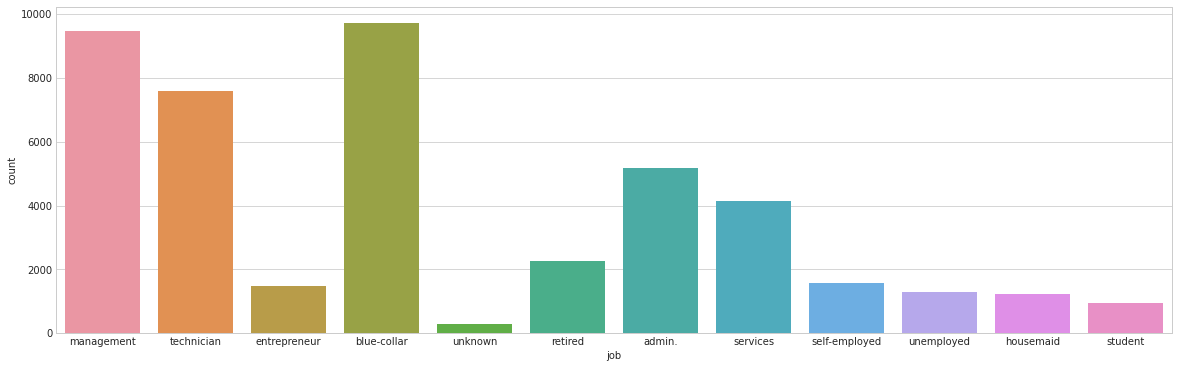

_______________________________________________________________________________________________________________________________


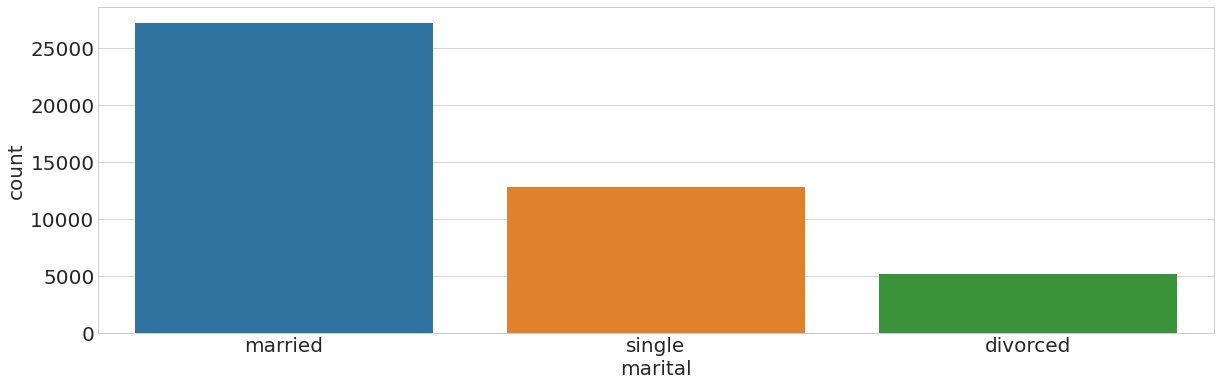

_______________________________________________________________________________________________________________________________


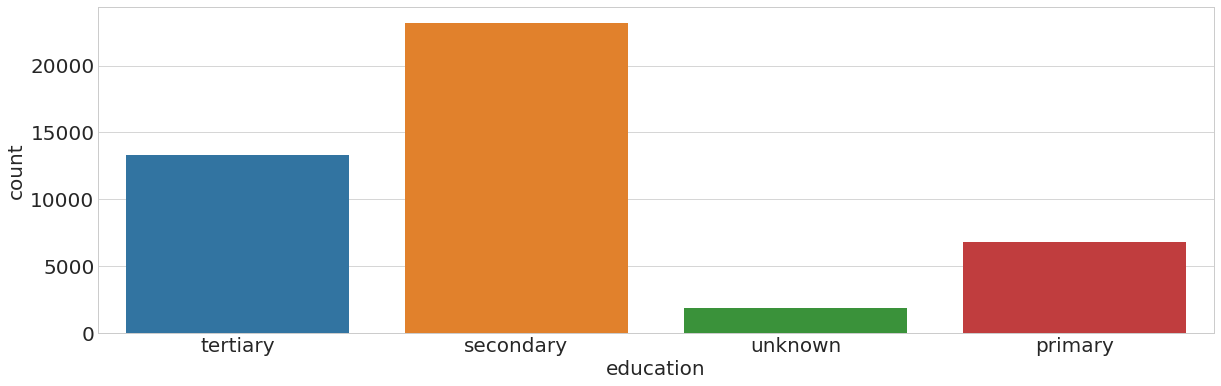

_______________________________________________________________________________________________________________________________


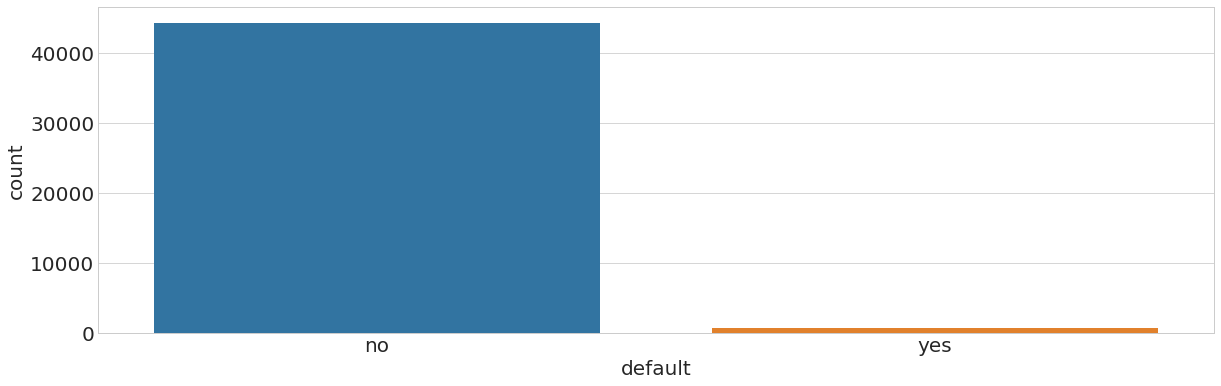

_______________________________________________________________________________________________________________________________


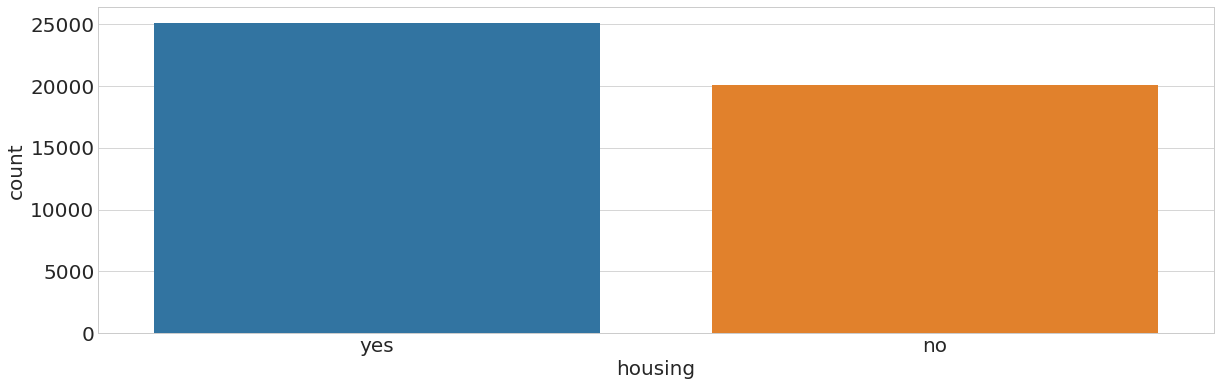

_______________________________________________________________________________________________________________________________


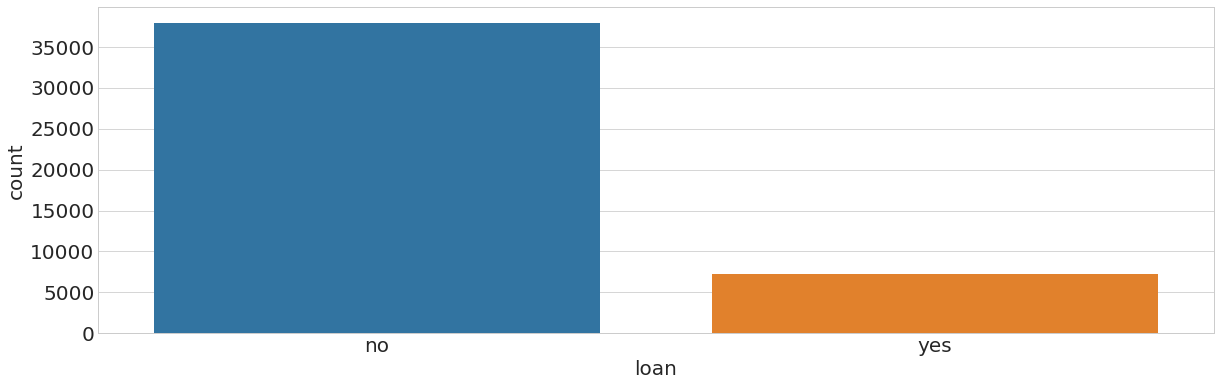

_______________________________________________________________________________________________________________________________


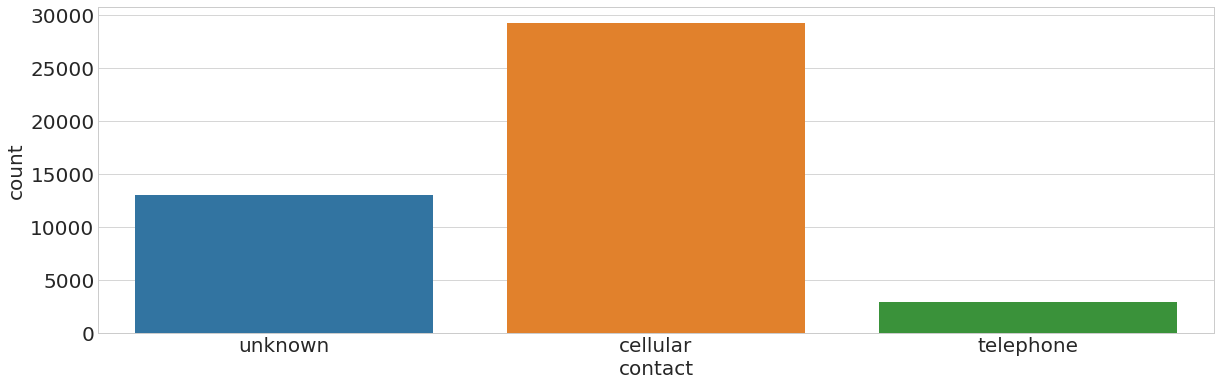

_______________________________________________________________________________________________________________________________


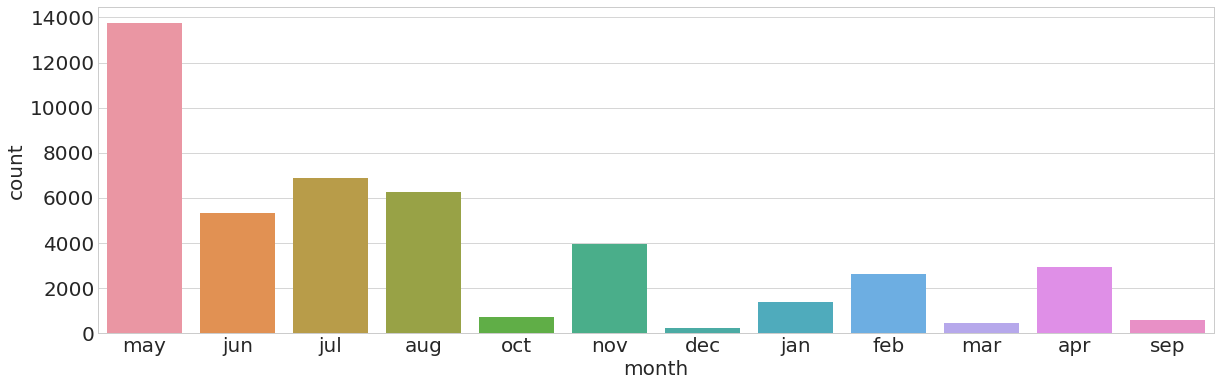

_______________________________________________________________________________________________________________________________


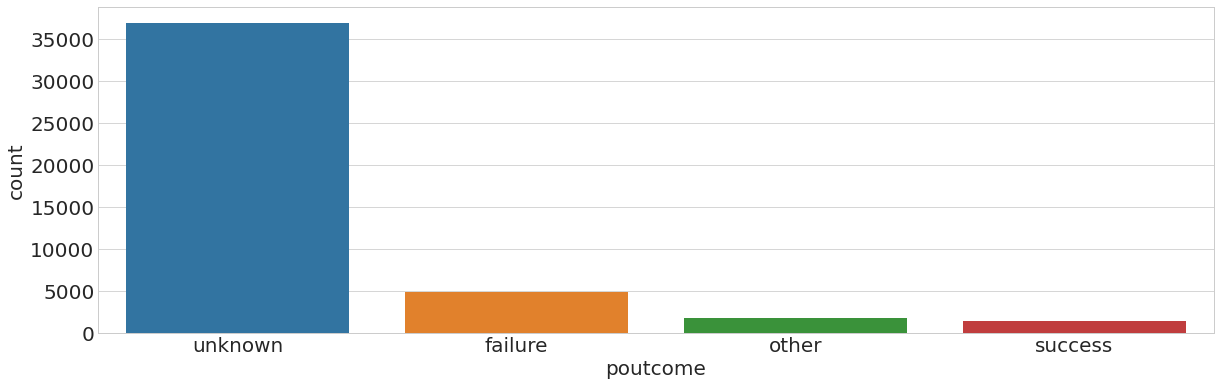

_______________________________________________________________________________________________________________________________


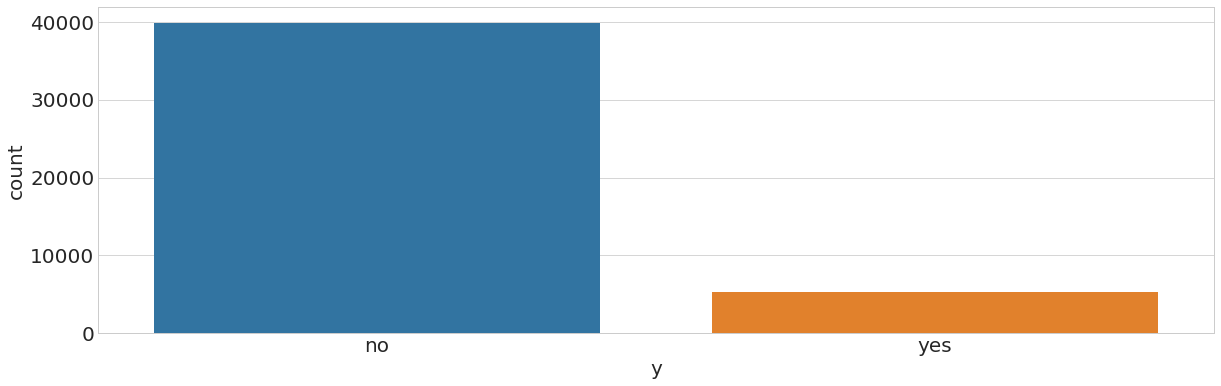

_______________________________________________________________________________________________________________________________


In [18]:
for feature in cat_features: 
    fig = plt.subplots(figsize=(20, 6))
    plt.rcParams.update({'font.size': 20})
    data = df[feature].value_counts()
    countplot = sns.countplot(x=feature, data=df)
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

#### The Pie Chart Of Each Catagorical Feature

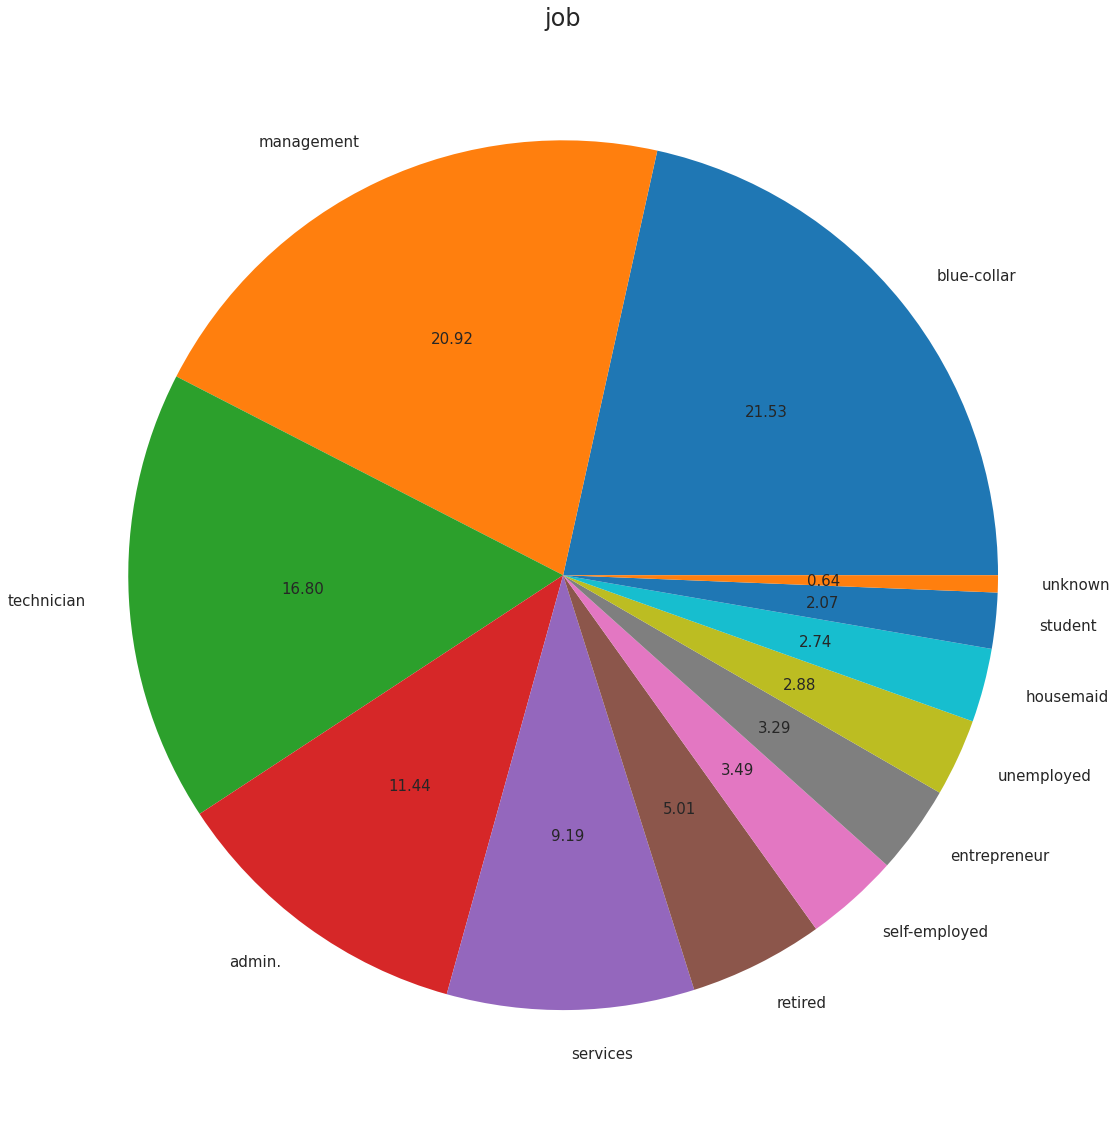

_______________________________________________________________________________________________________________________________


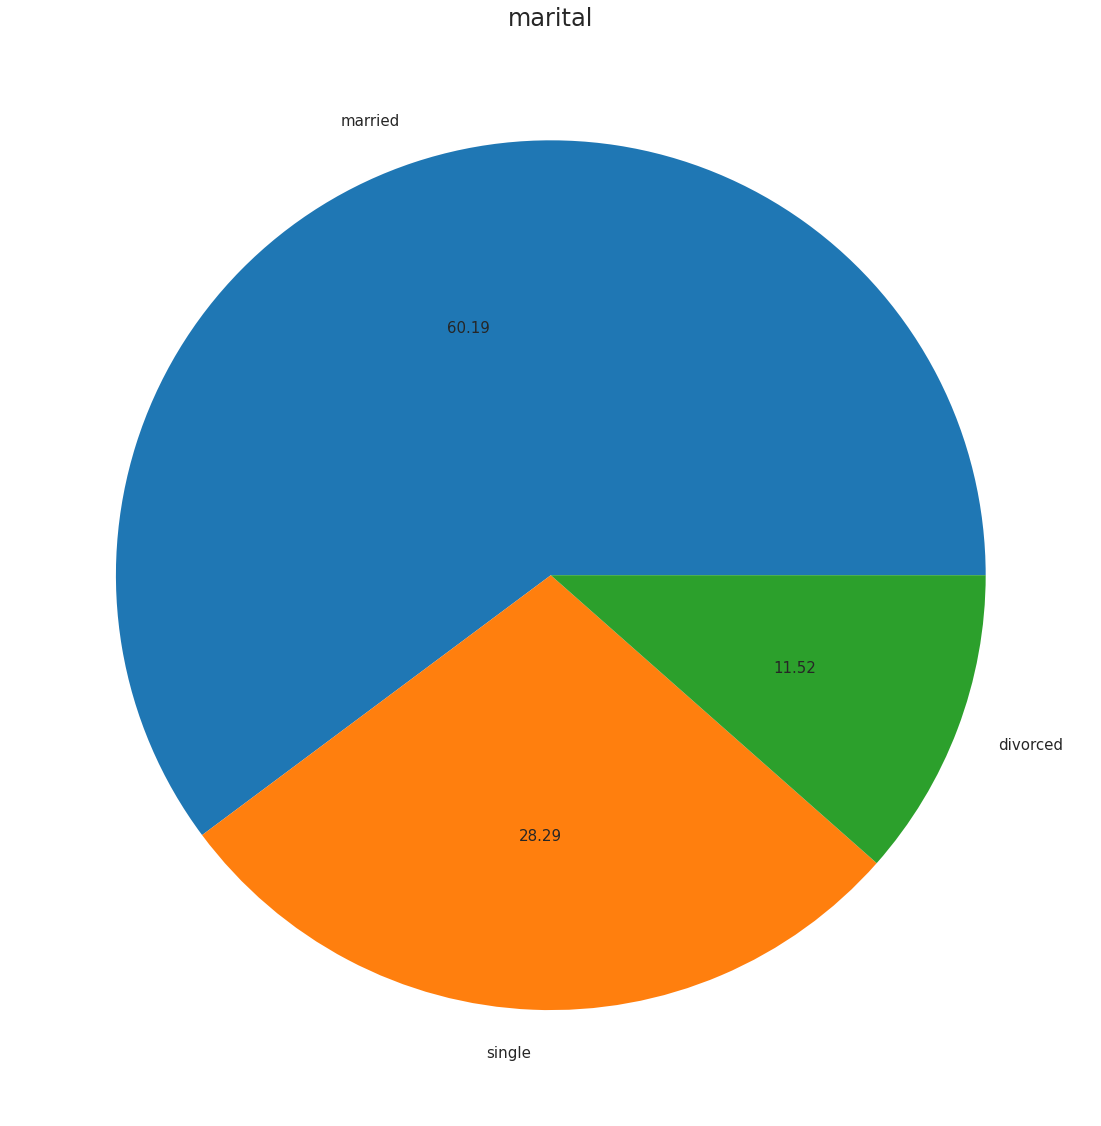

_______________________________________________________________________________________________________________________________


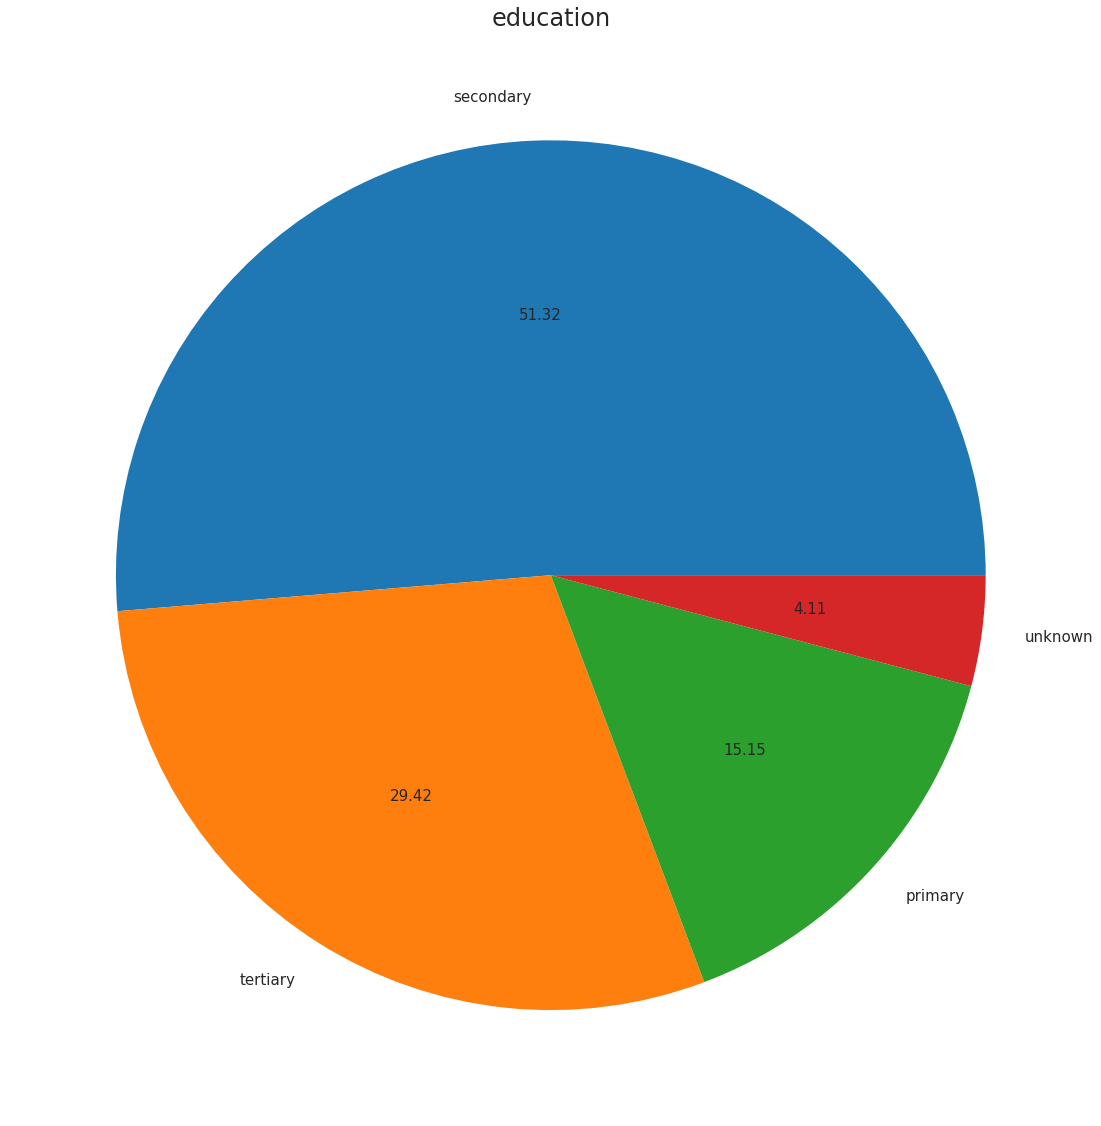

_______________________________________________________________________________________________________________________________


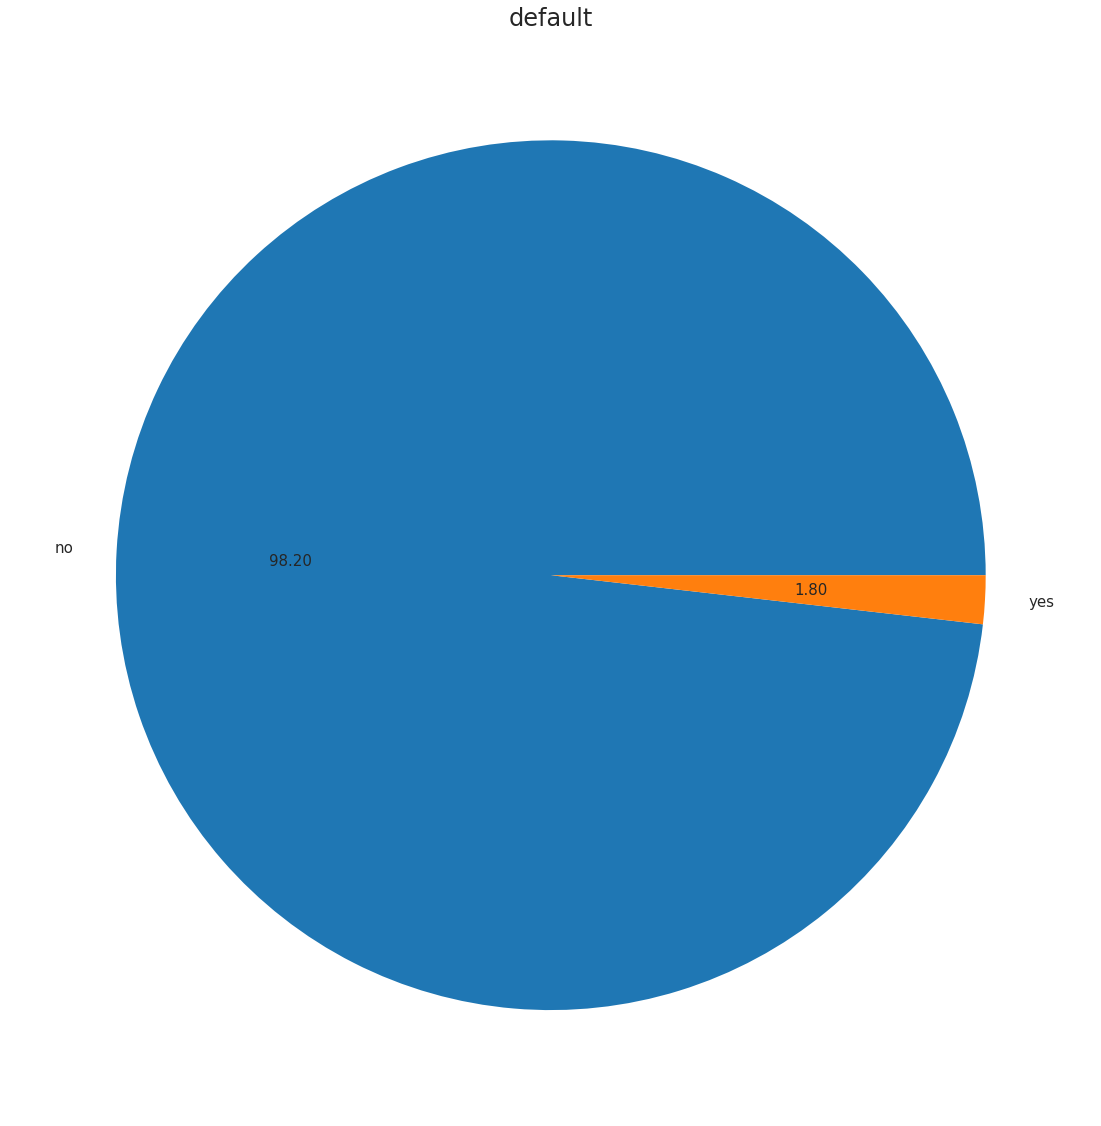

_______________________________________________________________________________________________________________________________


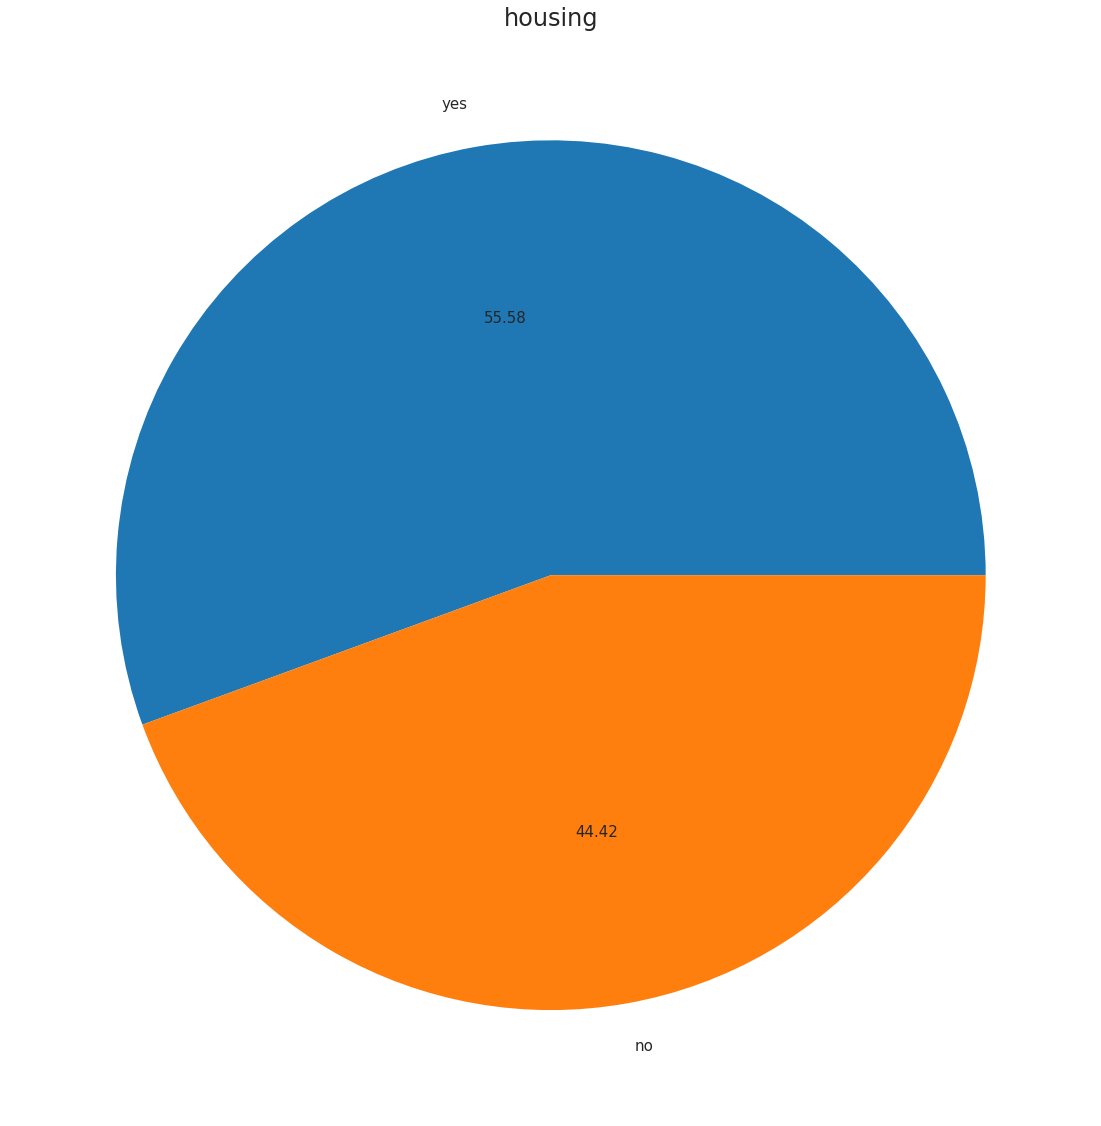

_______________________________________________________________________________________________________________________________


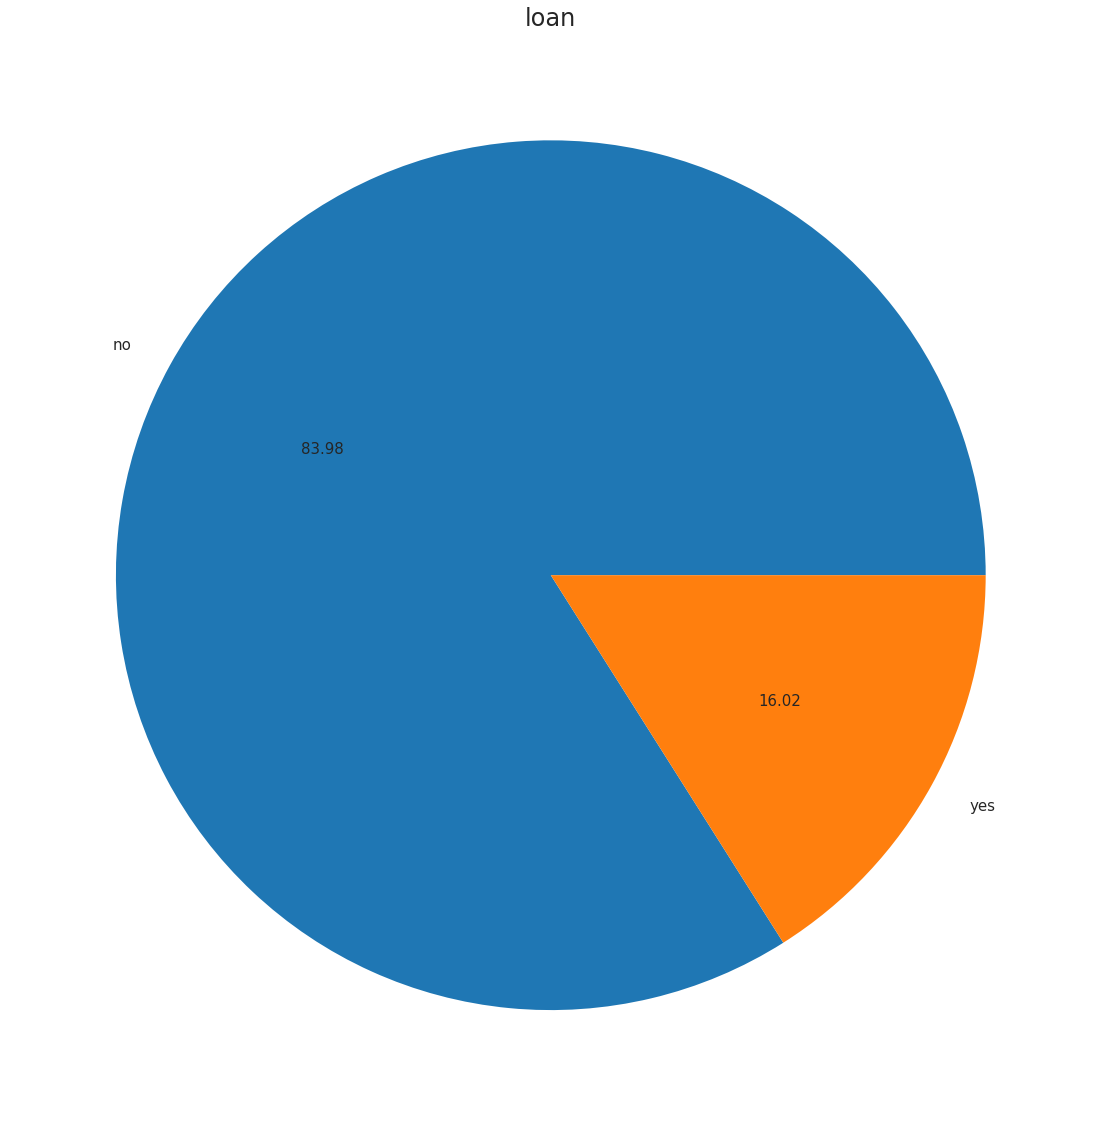

_______________________________________________________________________________________________________________________________


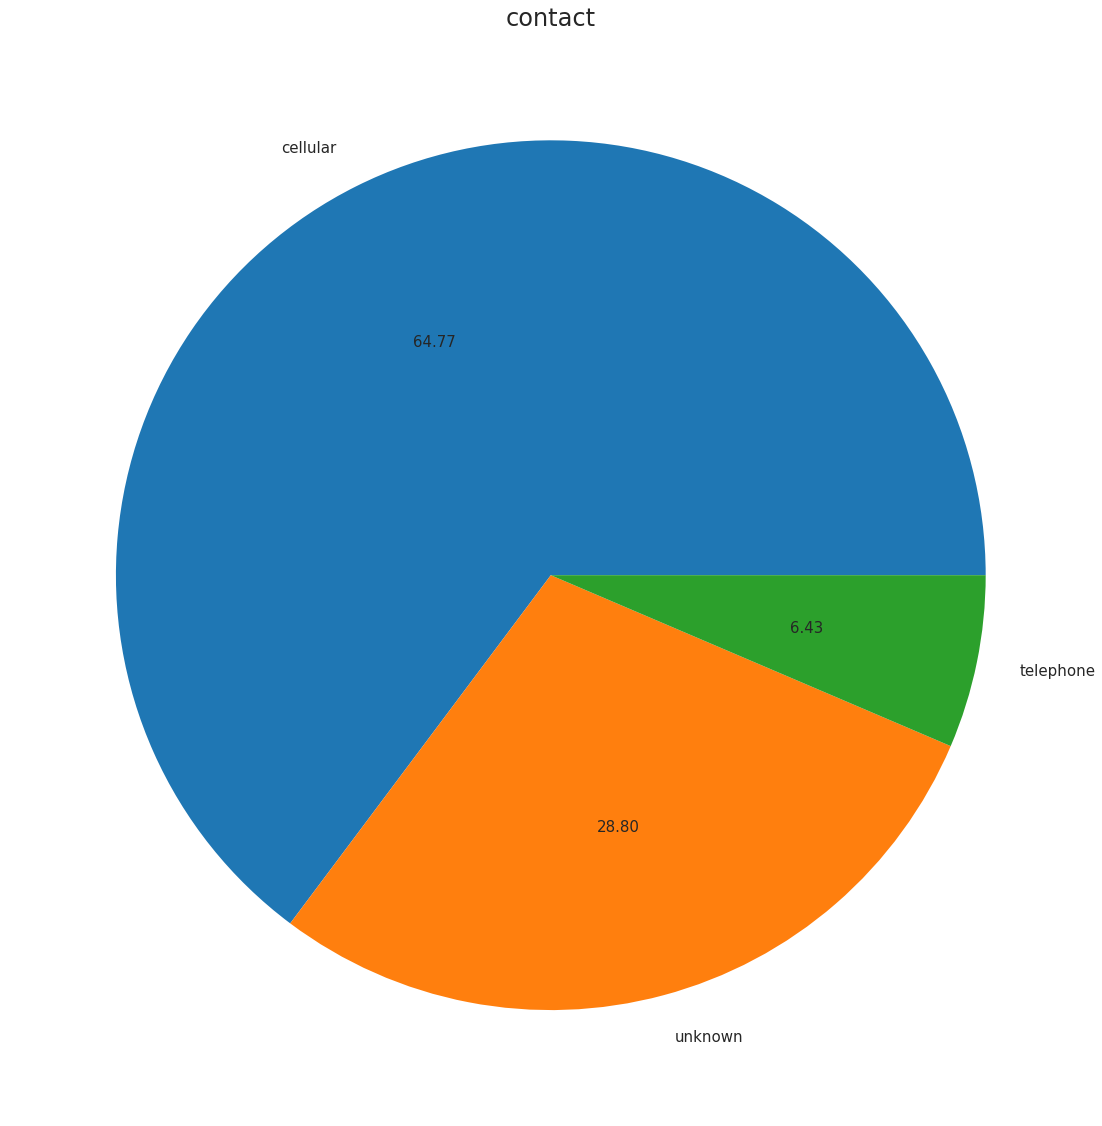

_______________________________________________________________________________________________________________________________


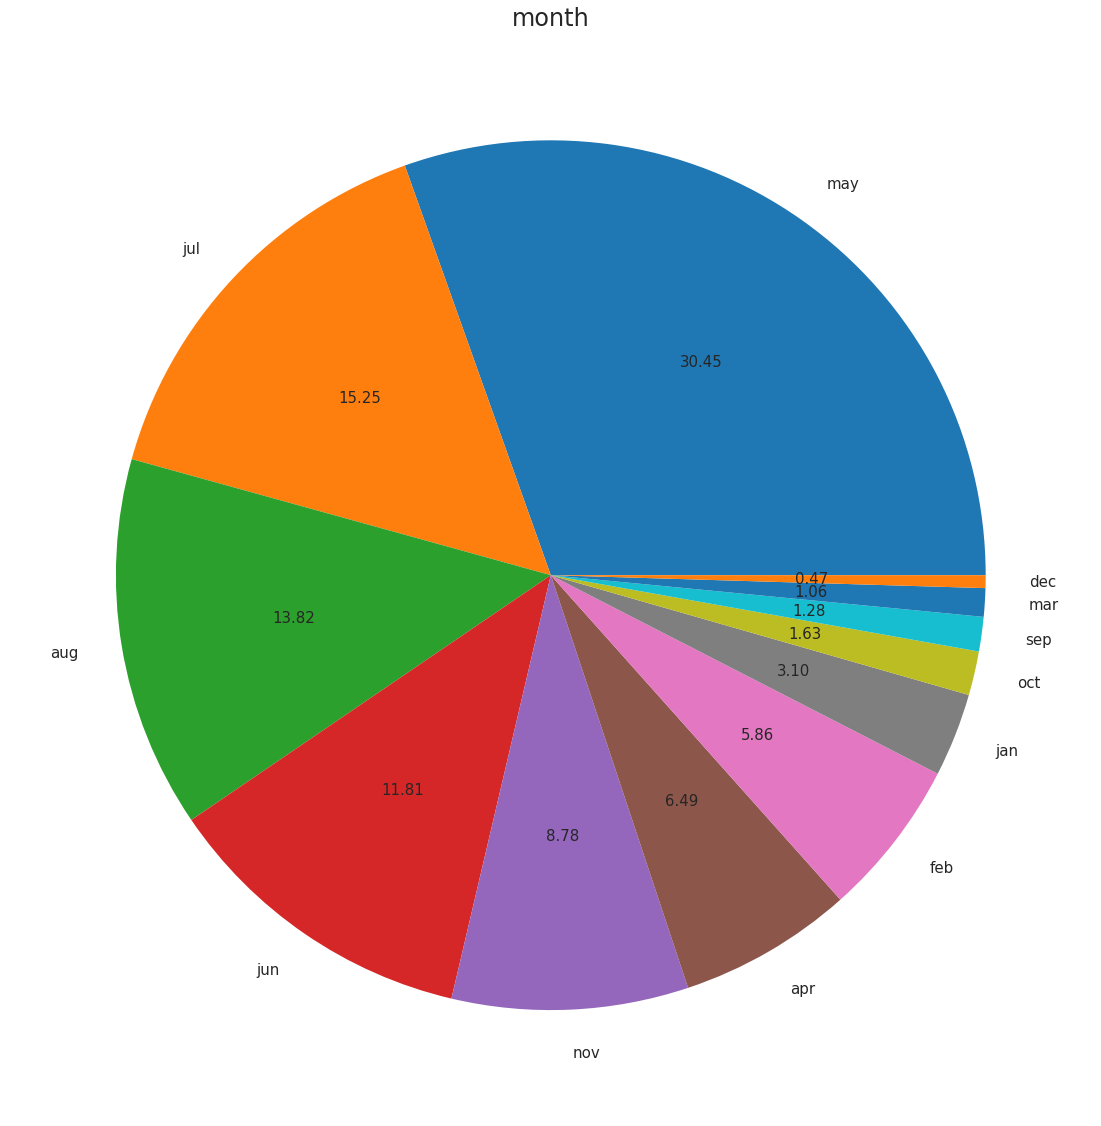

_______________________________________________________________________________________________________________________________


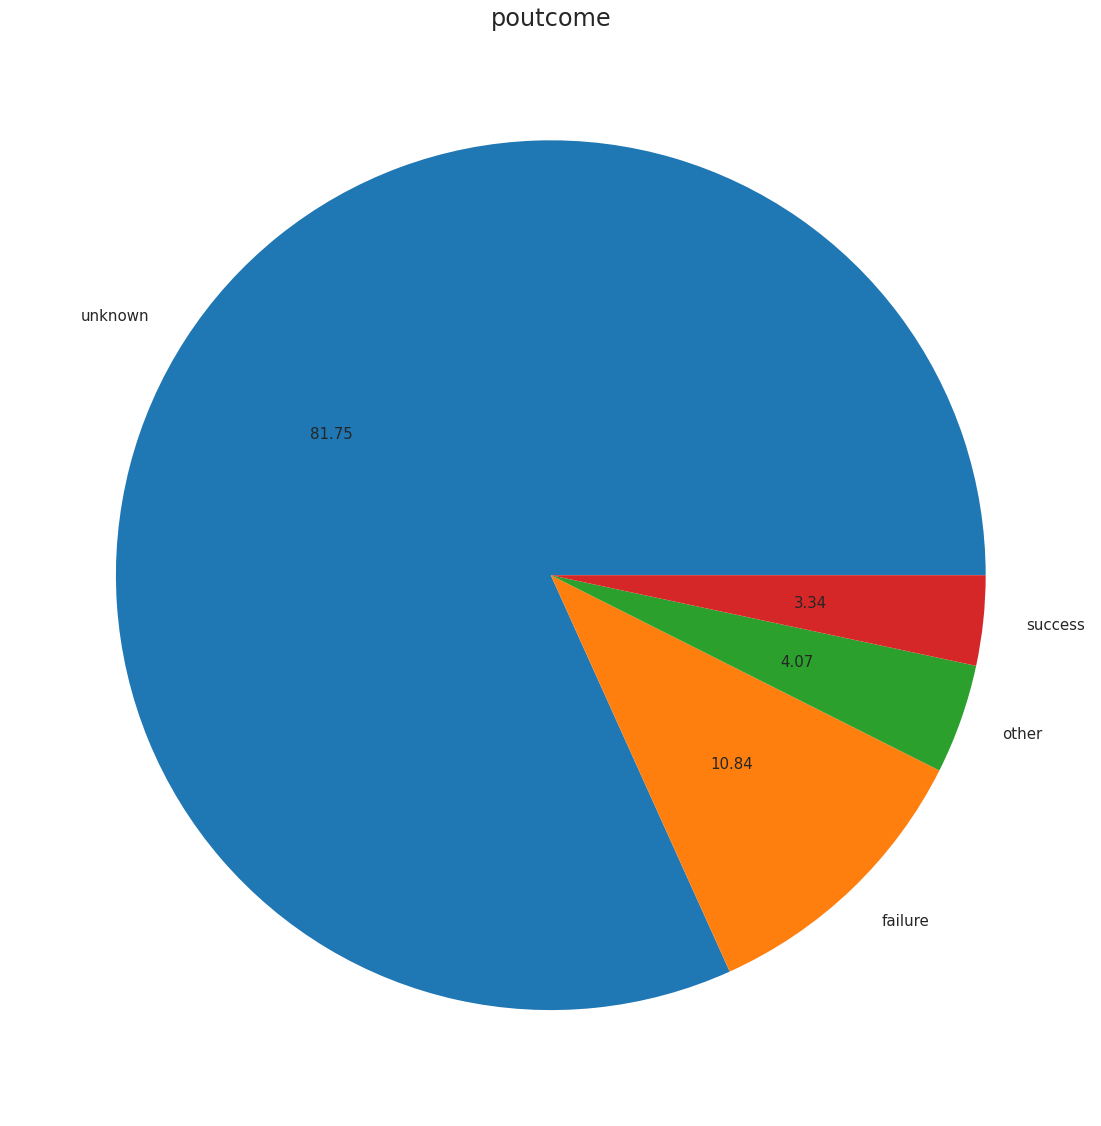

_______________________________________________________________________________________________________________________________


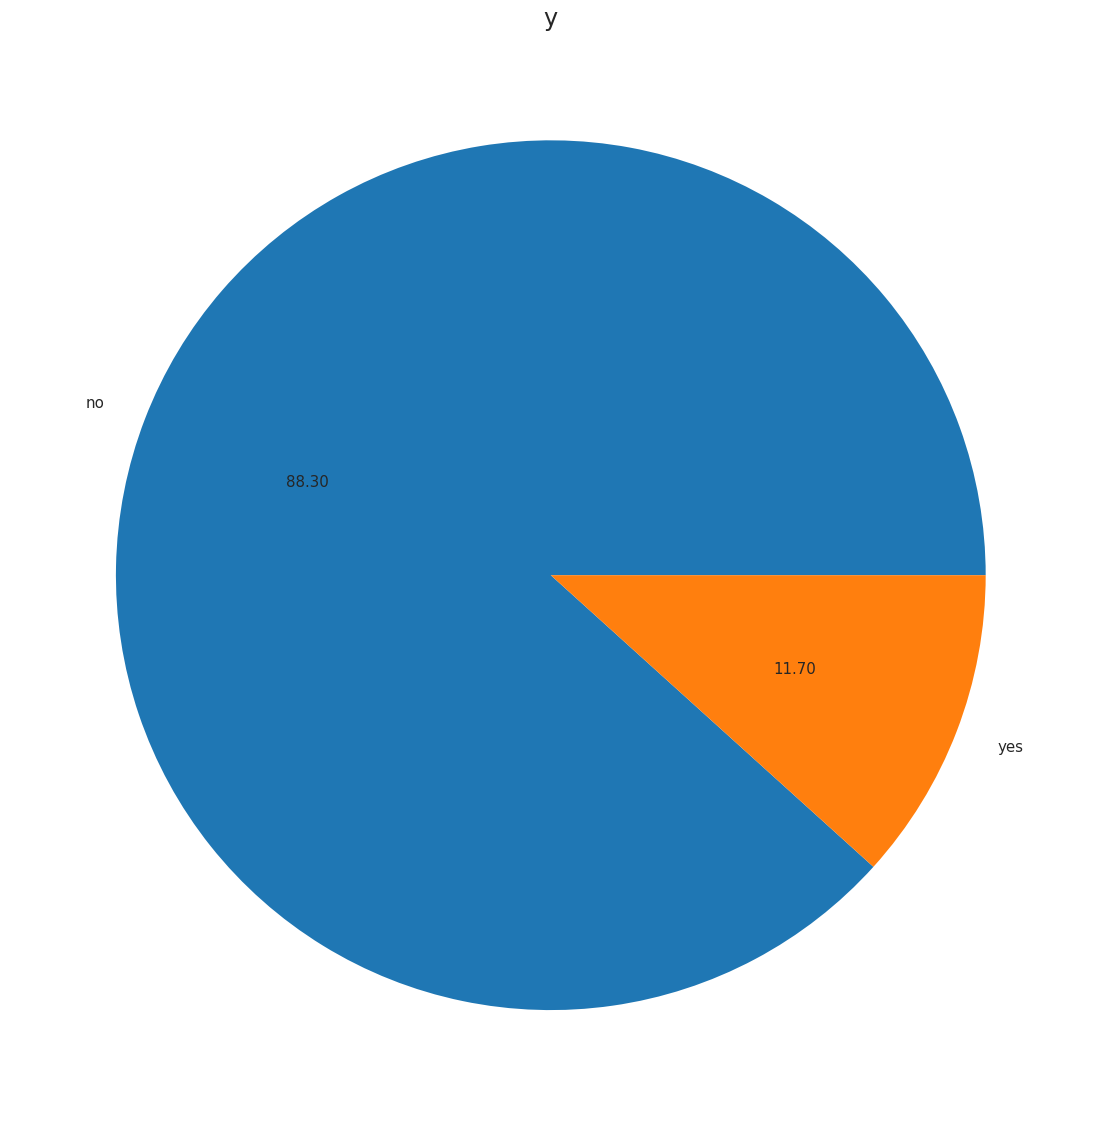

_______________________________________________________________________________________________________________________________


In [19]:
for feature in cat_features: 
    fig = plt.subplots(figsize=(30, 20))
    plt.rcParams.update({'font.size': 20})
    data = df[feature].value_counts()
    barplot = data.plot(kind='pie',  title=feature, autopct="%.2f", fontsize=15, ylabel='')
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

#### The Count Plots To Show Target Counts With Respect To The Numerical Features

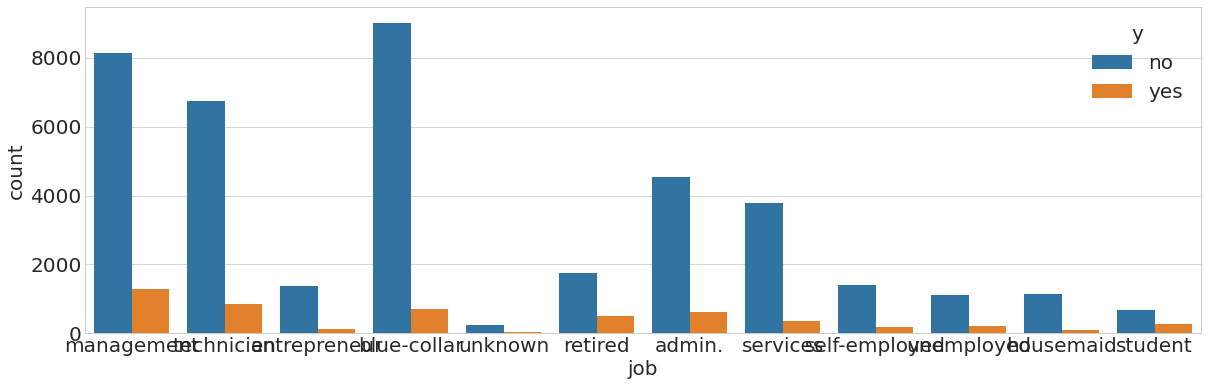

_______________________________________________________________________________________________________________________________


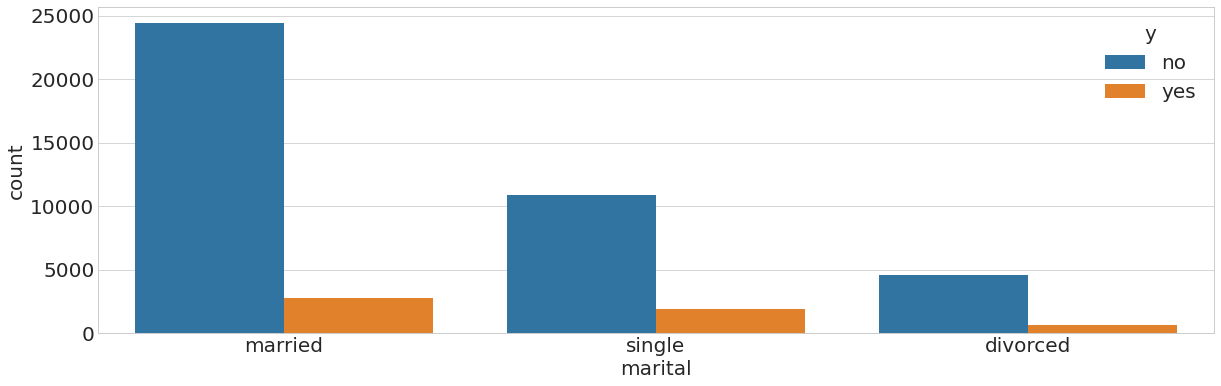

_______________________________________________________________________________________________________________________________


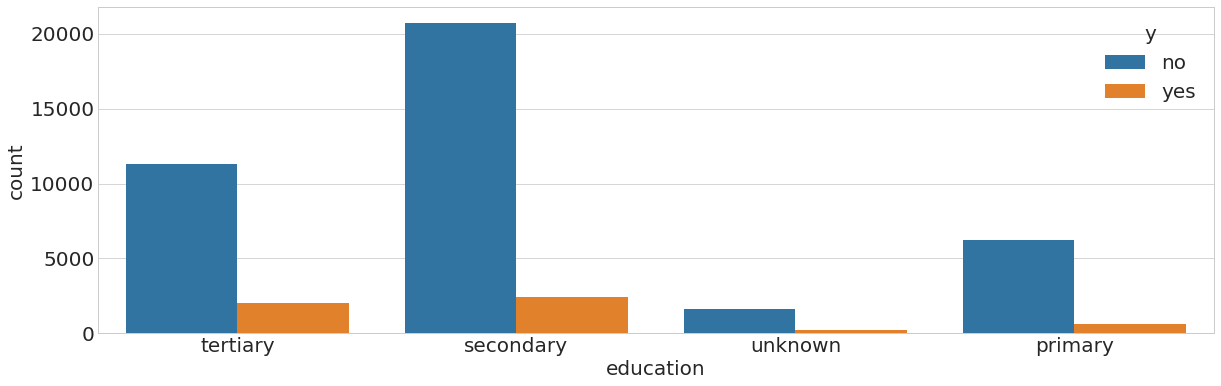

_______________________________________________________________________________________________________________________________


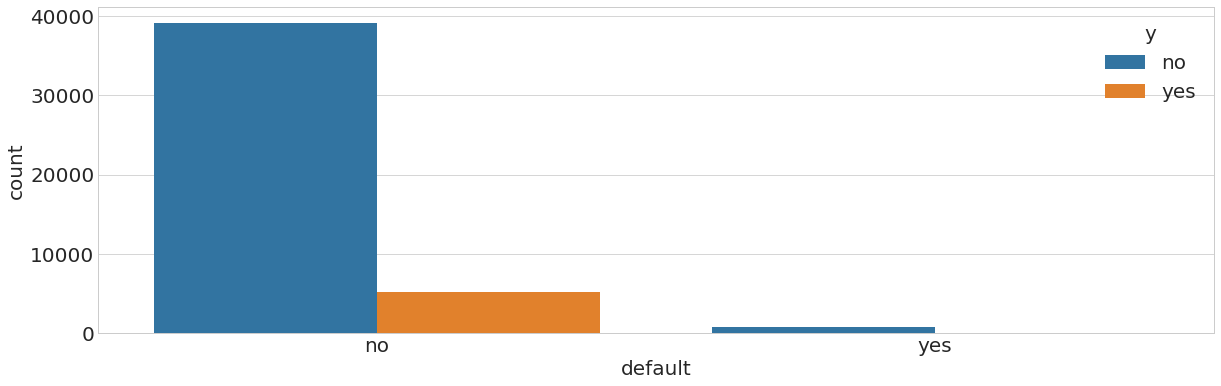

_______________________________________________________________________________________________________________________________


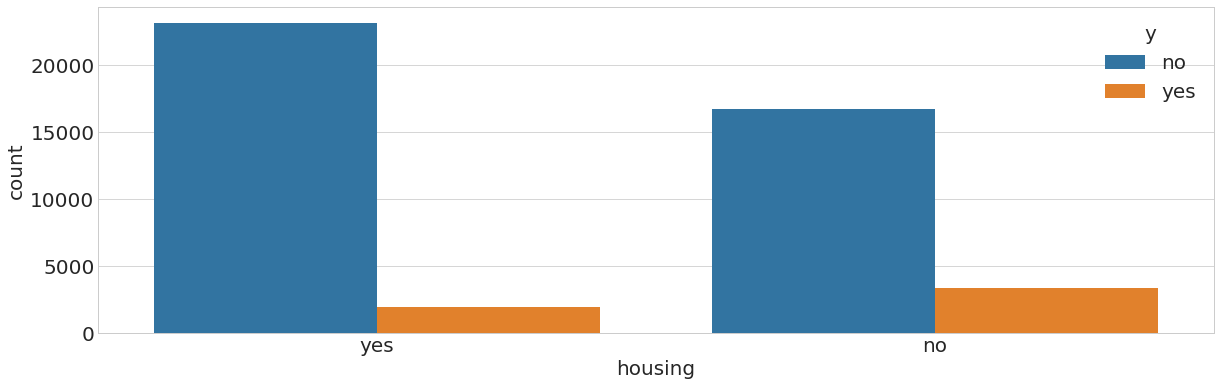

_______________________________________________________________________________________________________________________________


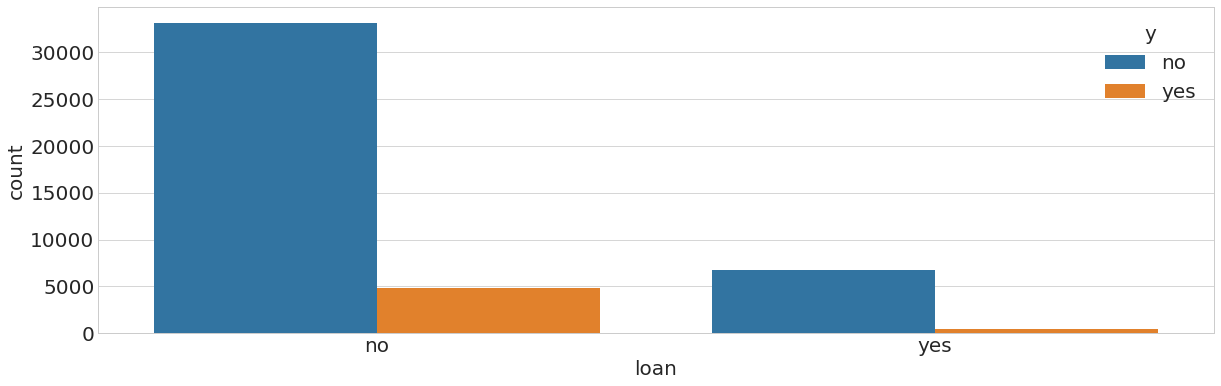

_______________________________________________________________________________________________________________________________


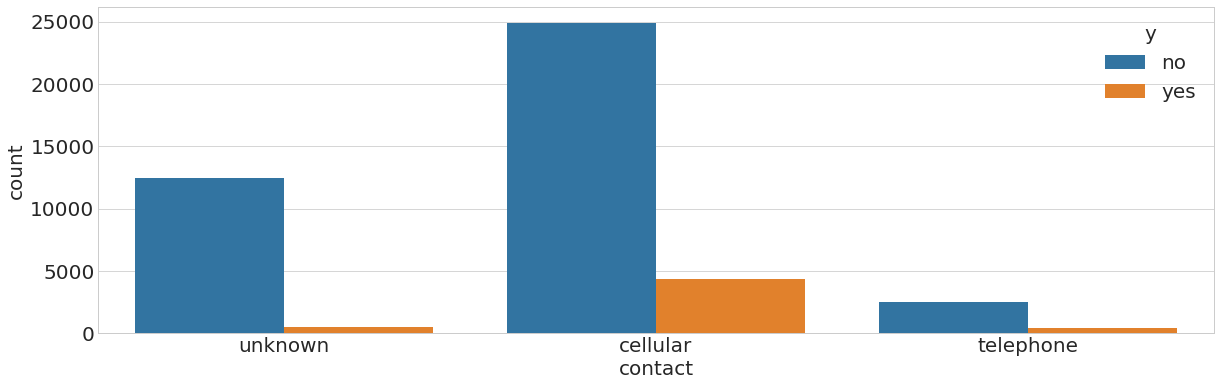

_______________________________________________________________________________________________________________________________


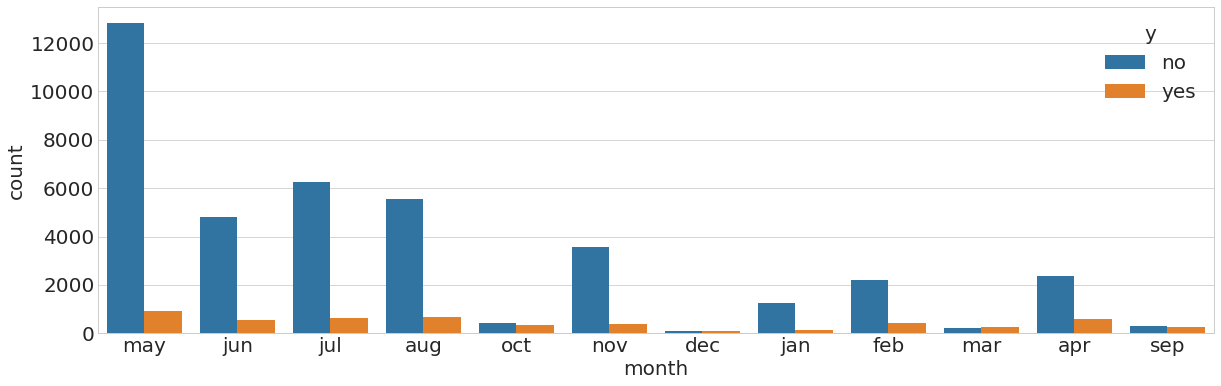

_______________________________________________________________________________________________________________________________


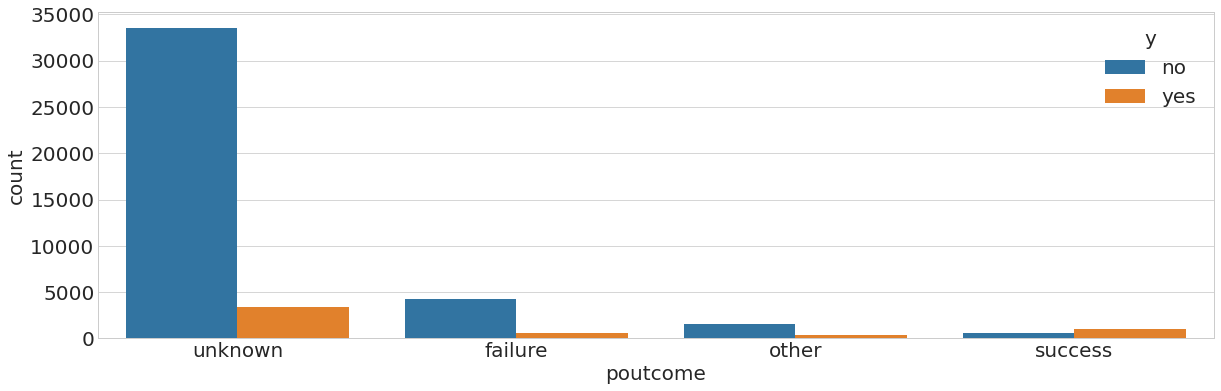

_______________________________________________________________________________________________________________________________


In [20]:
modified_cat_features = cat_features[:9]

for feature in modified_cat_features: 
    fig = plt.subplots(figsize=(20, 6))
    plt.rcParams.update({'font.size': 20})
    data = df[feature].value_counts()
    countplot = sns.countplot(x=feature, data=df, hue="y")
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

### NUMERICAL VALUES

In [21]:
numeric = df.select_dtypes(include=np.number)
numeric_columns= numeric.columns
numeric_features = list(numeric_columns) 
print(numeric_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [22]:
for feature in numeric_features:
    print('The feature is {} and number of unique values are {}'.format(feature,len(df[feature].unique())))

The feature is age and number of unique values are 77
The feature is balance and number of unique values are 7168
The feature is day and number of unique values are 31
The feature is duration and number of unique values are 1573
The feature is campaign and number of unique values are 48
The feature is pdays and number of unique values are 559
The feature is previous and number of unique values are 41


> __Feature _balance_ and _duration_ has the highest number of unique values.__

#### The Counts of Each Numerical Feature

In [23]:
for feature in numeric_features: 
    print("The counts of the values in the '{}' feature:\n".format(feature.title()))
    print(df[feature].value_counts().sort_index())
    print("_______________________________________________________________________________________________________________________________")

The counts of the values in the 'Age' feature:

18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the values in the 'Balance' feature:

-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     1
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7168, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the values in the 'Day' feature:

1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
2

#### The Histograms And KDE Curves Of All The Numerical Features To Show Their PDFs

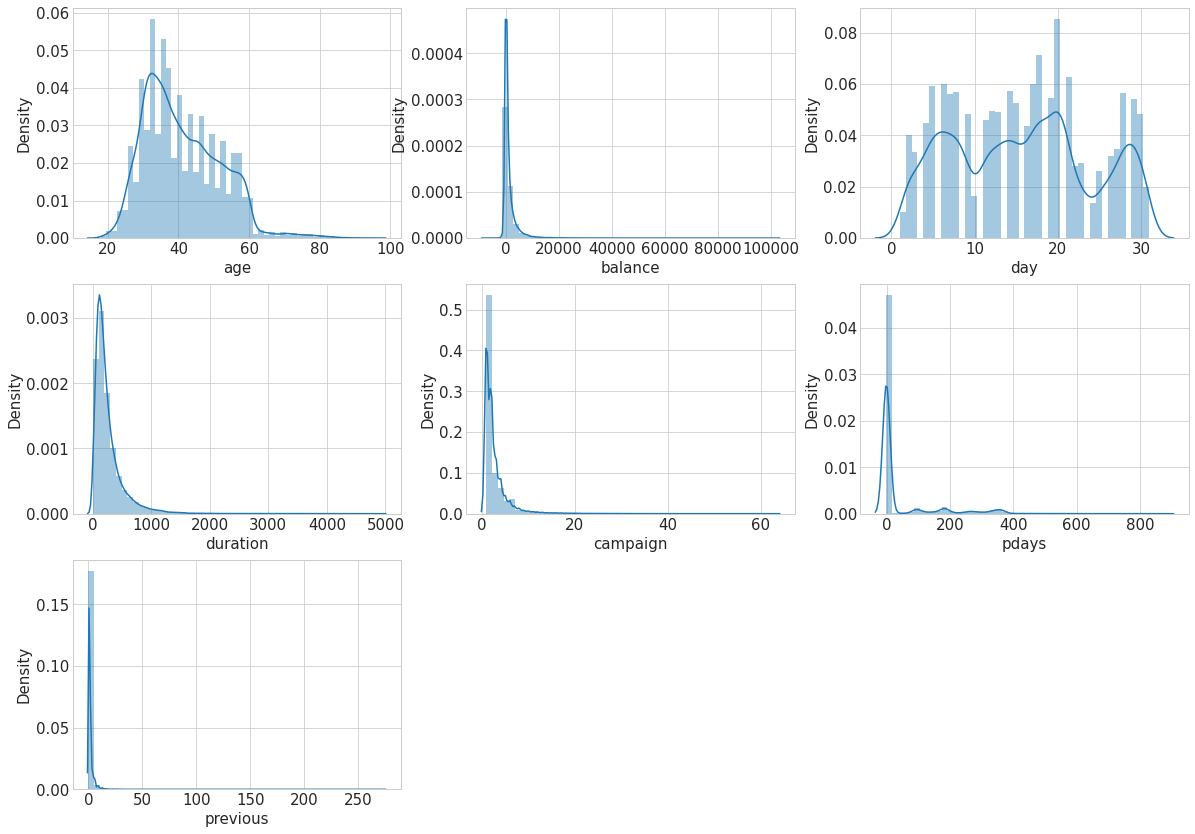

In [24]:
# plot of the histograms and KDE curves of the numerical features
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in numeric_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

#### The PMFs Of All The Numerical Features As A Histogram

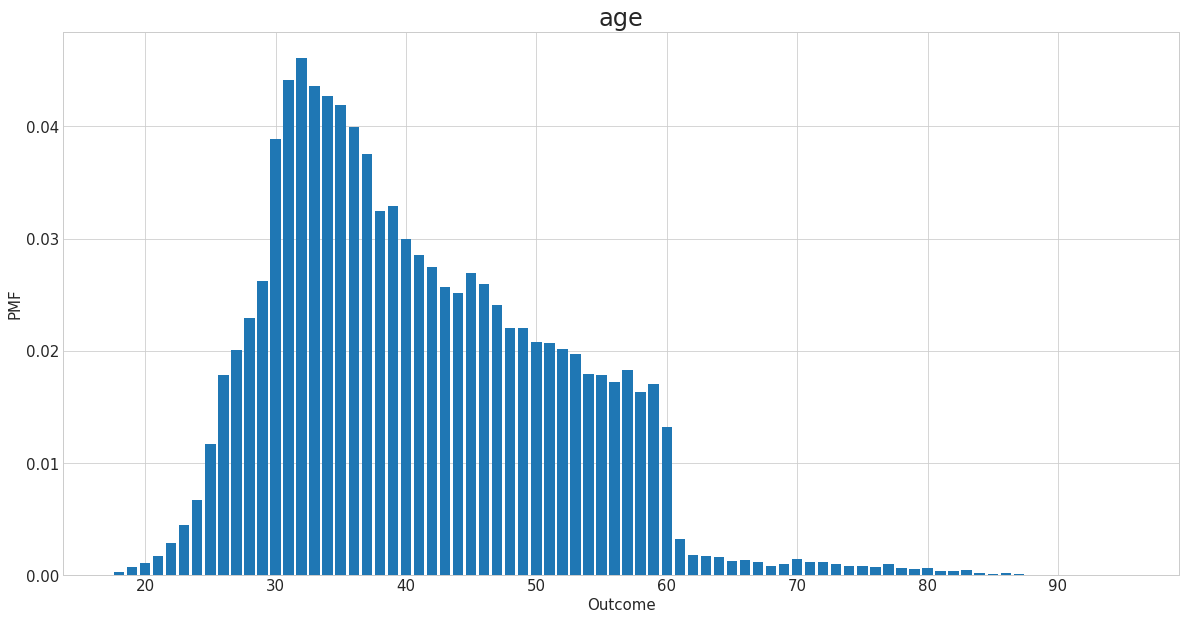

_______________________________________________________________________________________________________________________________


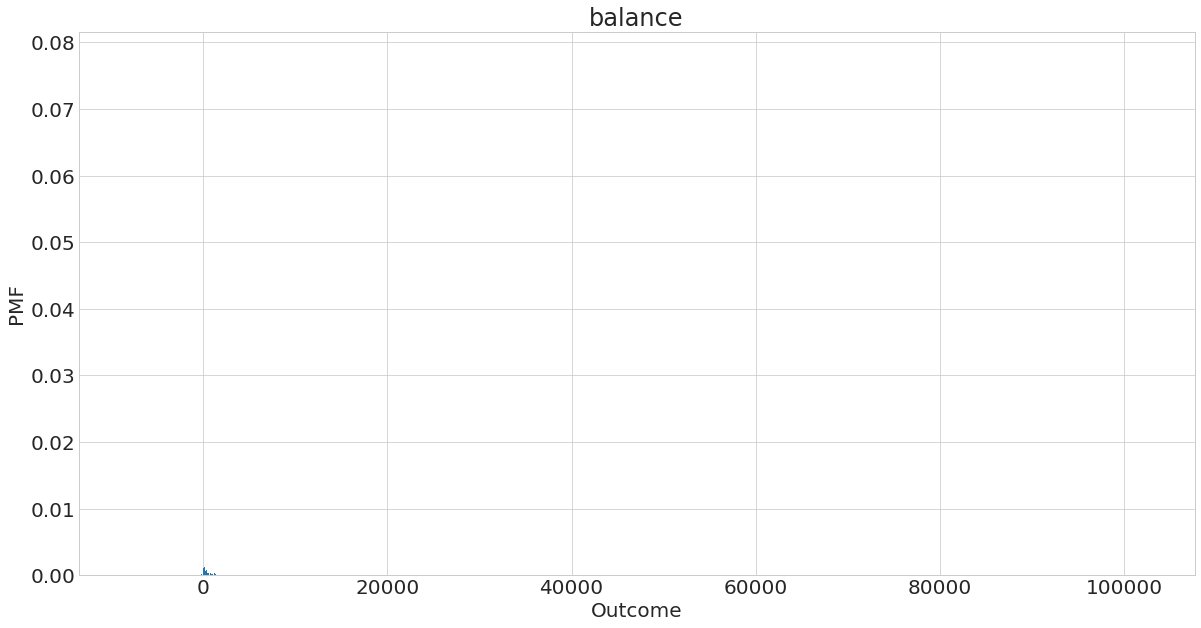

_______________________________________________________________________________________________________________________________


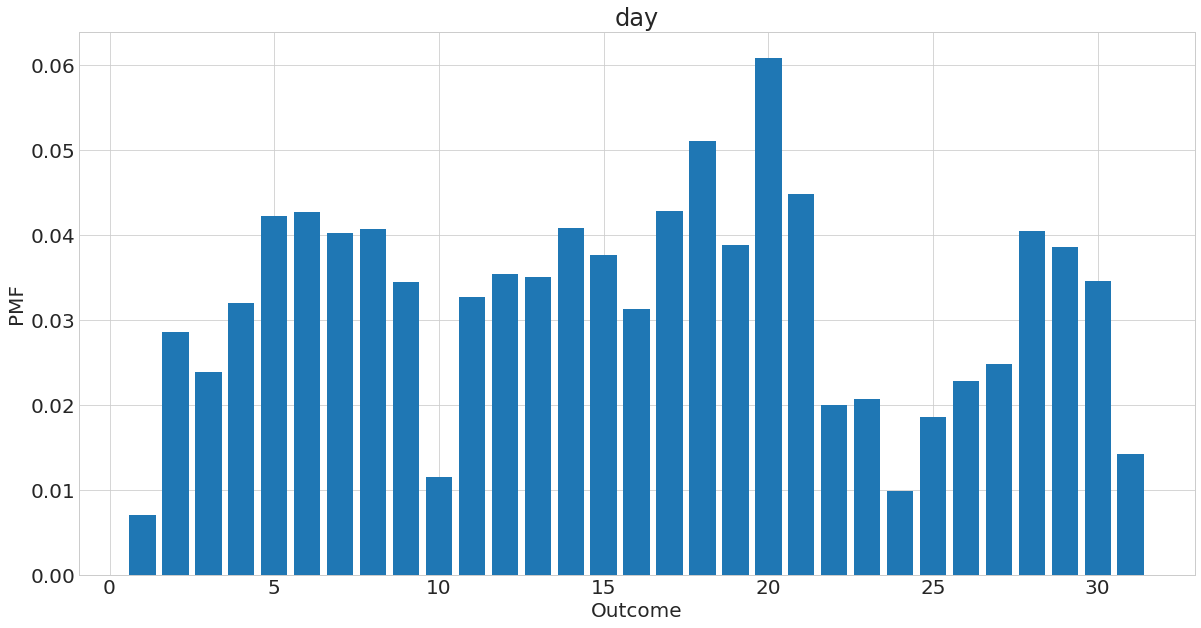

_______________________________________________________________________________________________________________________________


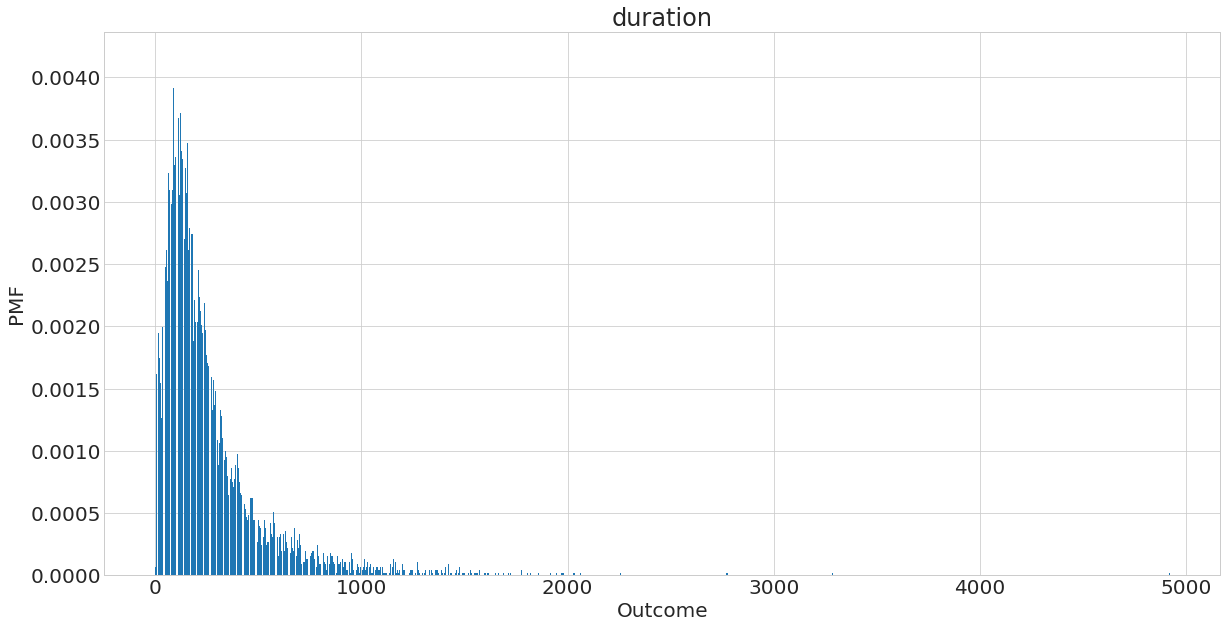

_______________________________________________________________________________________________________________________________


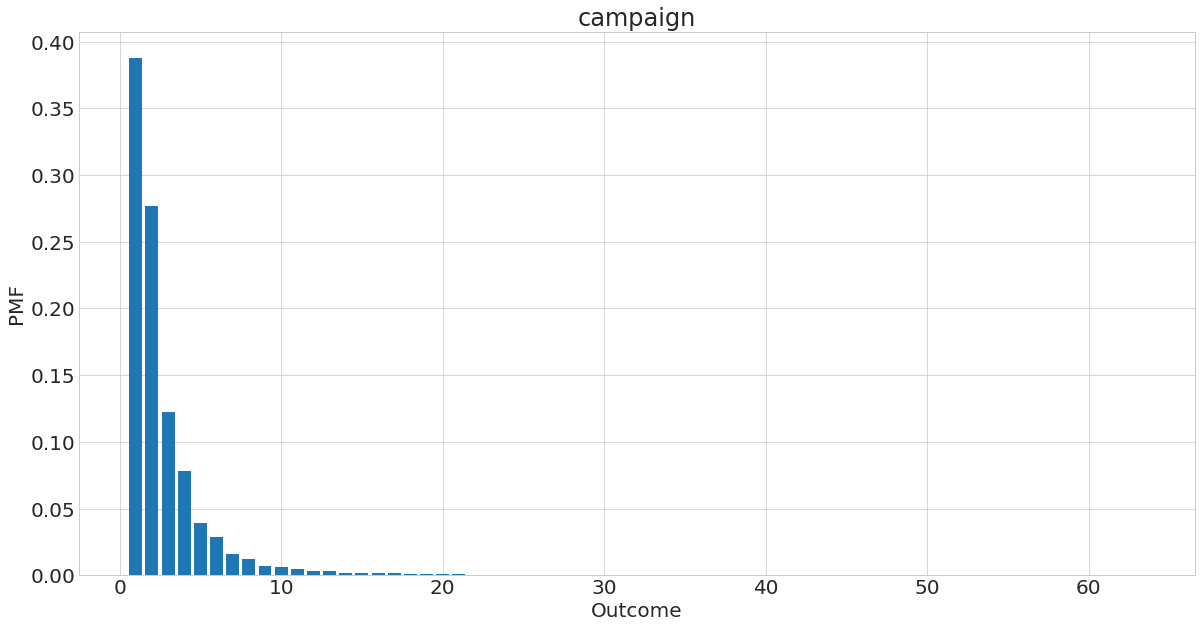

_______________________________________________________________________________________________________________________________


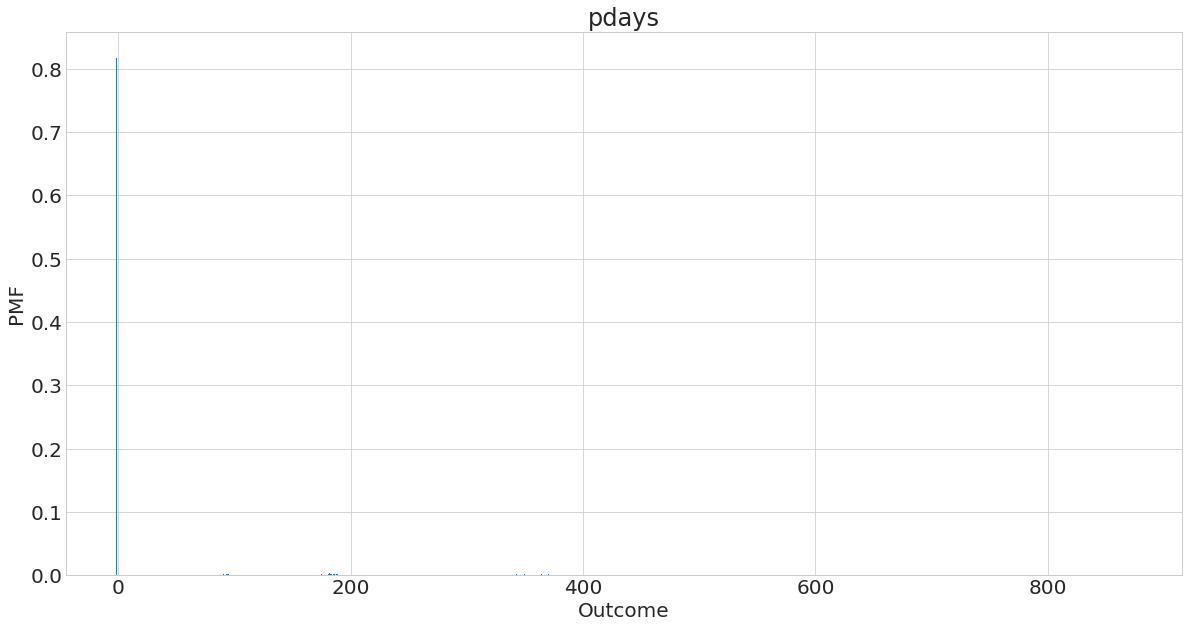

_______________________________________________________________________________________________________________________________


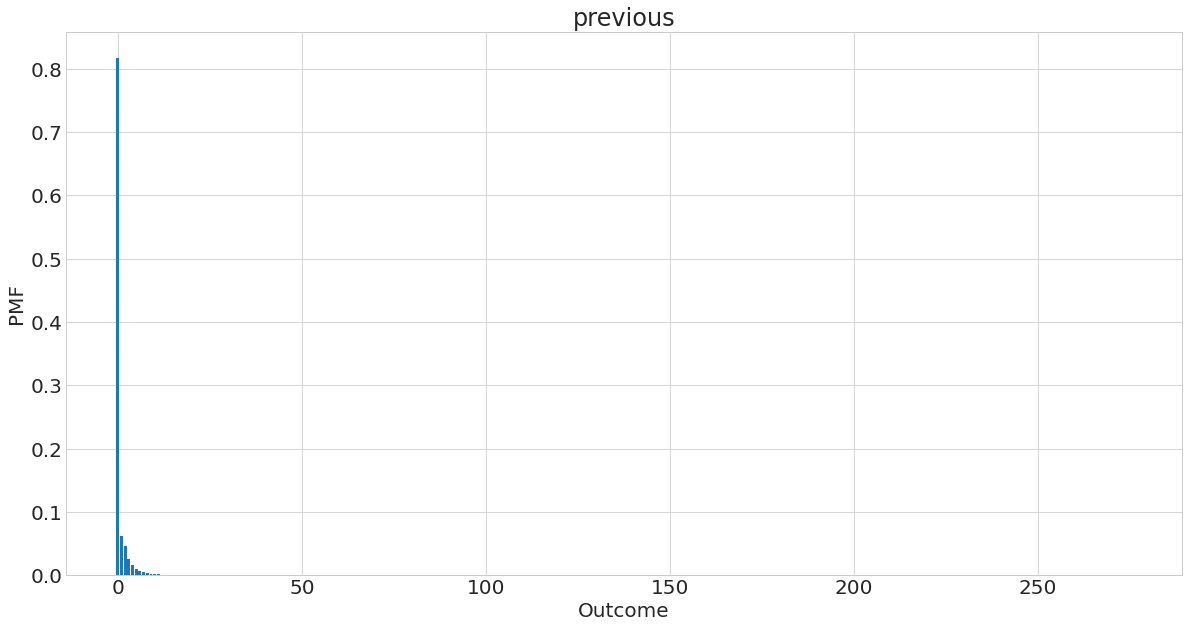

_______________________________________________________________________________________________________________________________


In [25]:
# plot displays the Pmf as a histogram.
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    feature_pmf = Pmf.from_seq(df[feature], normalize=True)
    feature_pmf.bar()
    applay_pmf(feature)
    print("_______________________________________________________________________________________________________________________________")

#### The PMFs Of All The Numerical Features As A Line

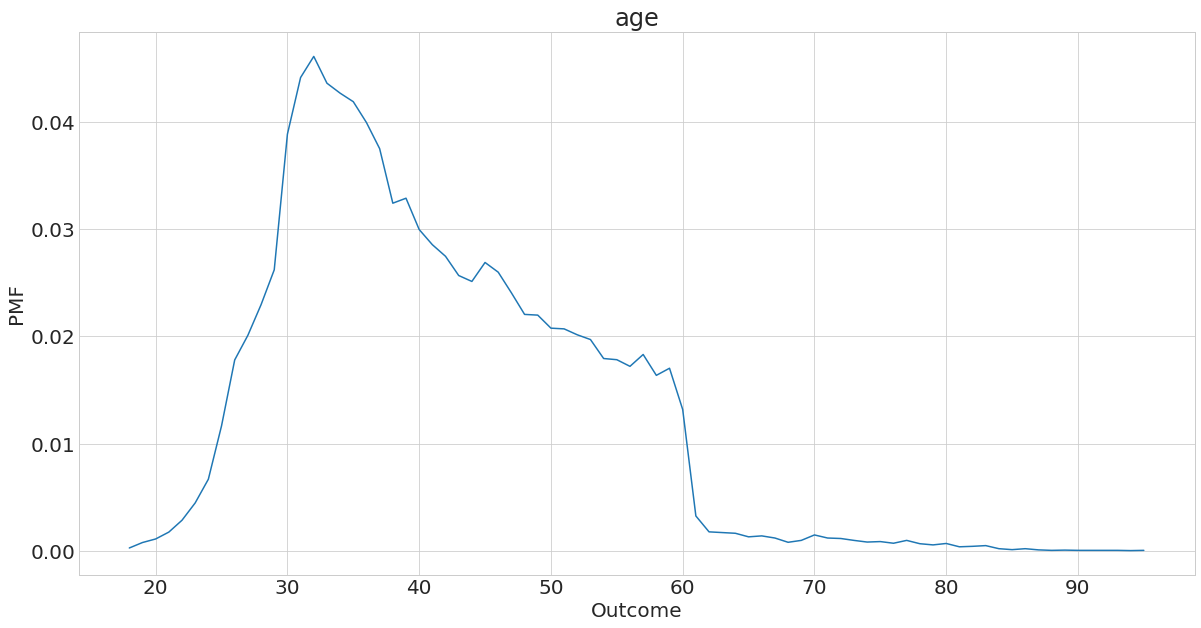

_______________________________________________________________________________________________________________________________


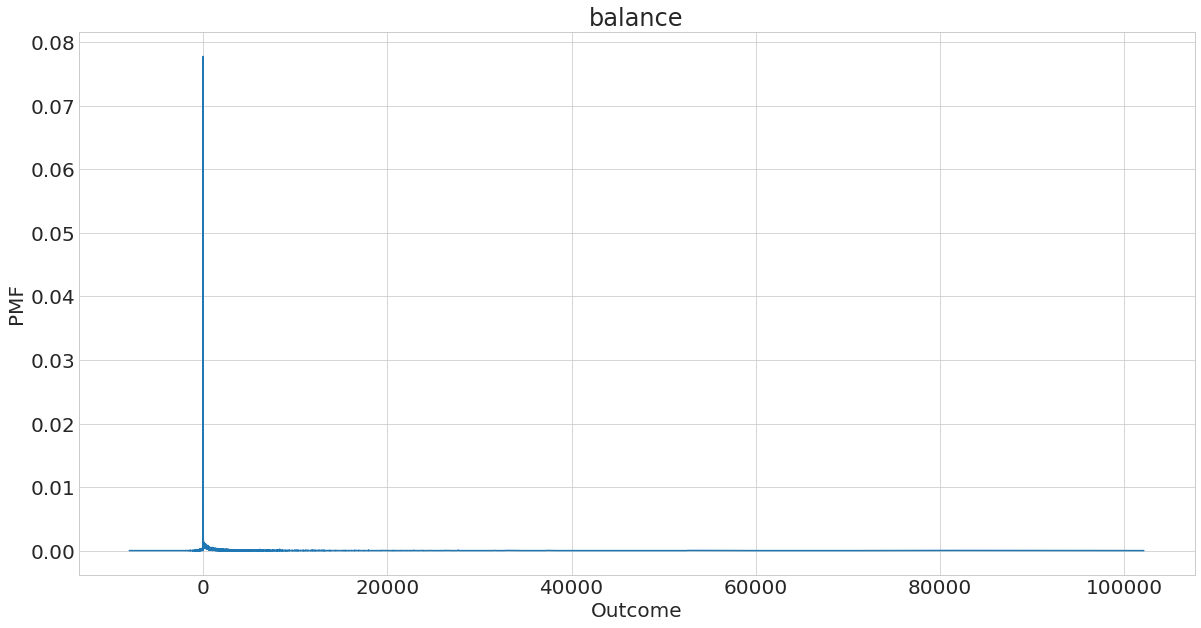

_______________________________________________________________________________________________________________________________


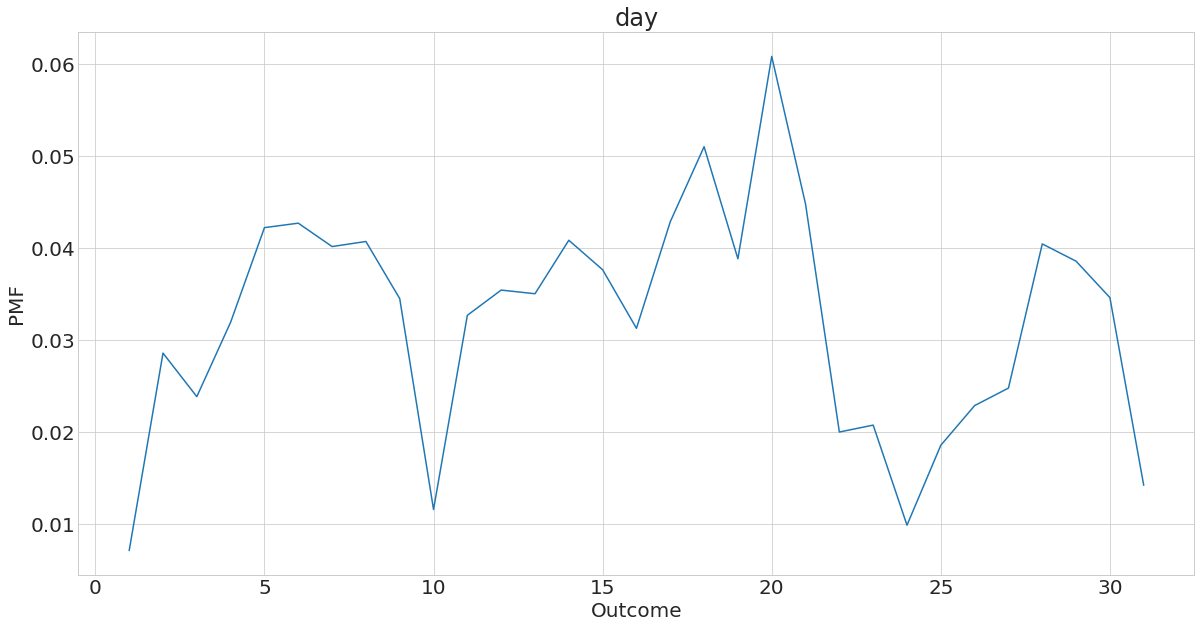

_______________________________________________________________________________________________________________________________


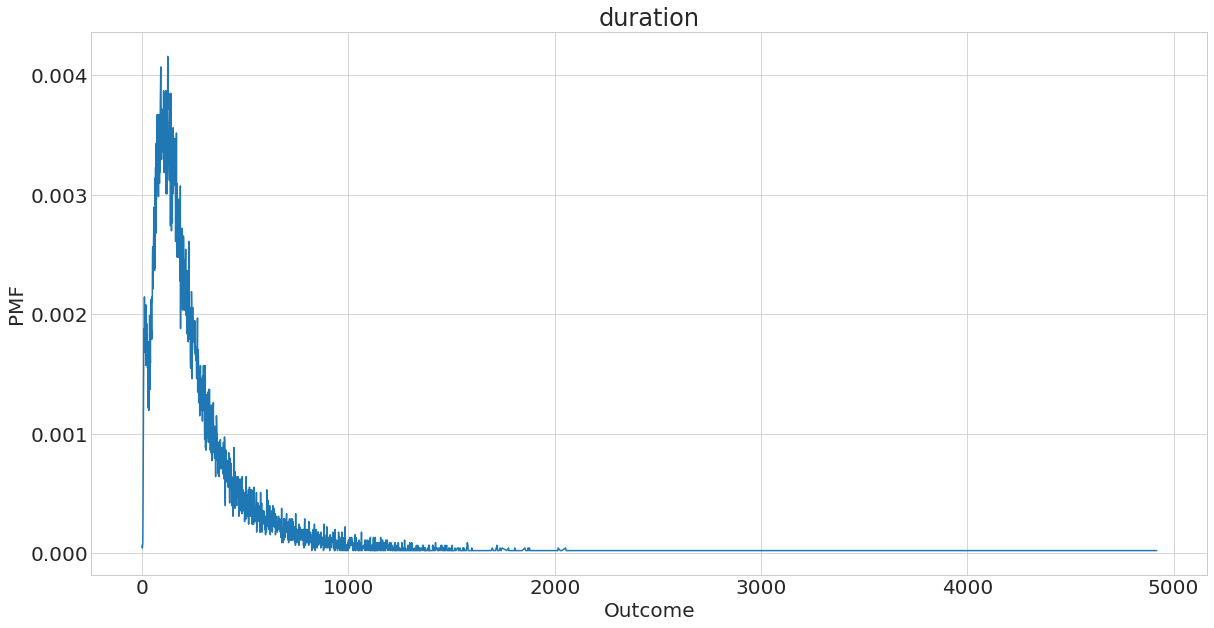

_______________________________________________________________________________________________________________________________


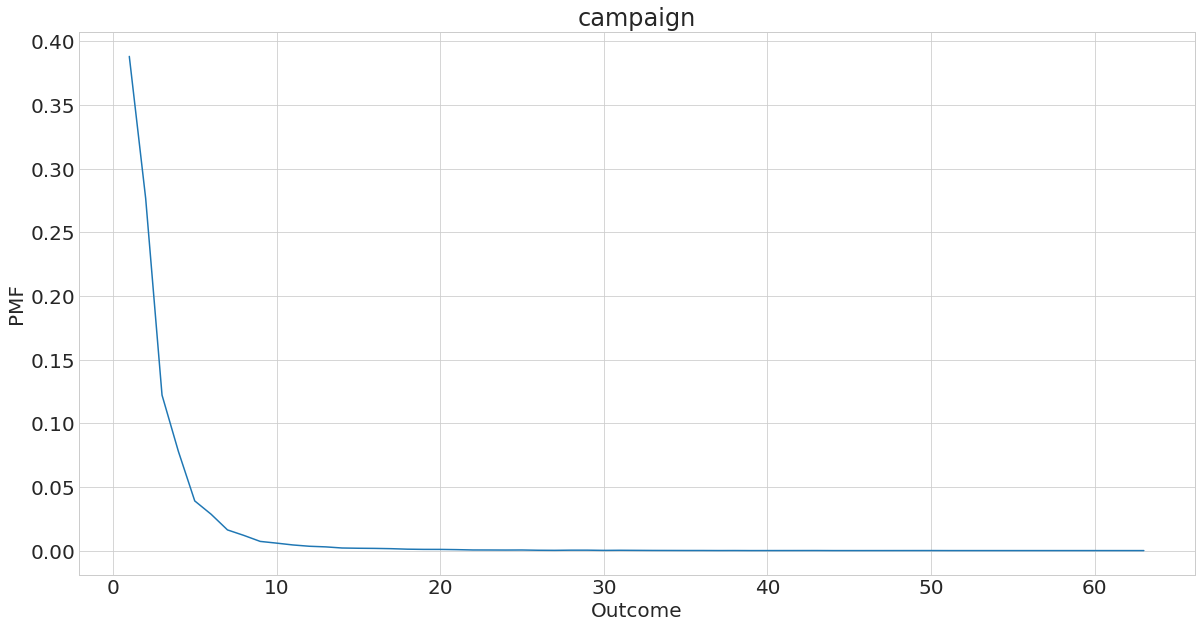

_______________________________________________________________________________________________________________________________


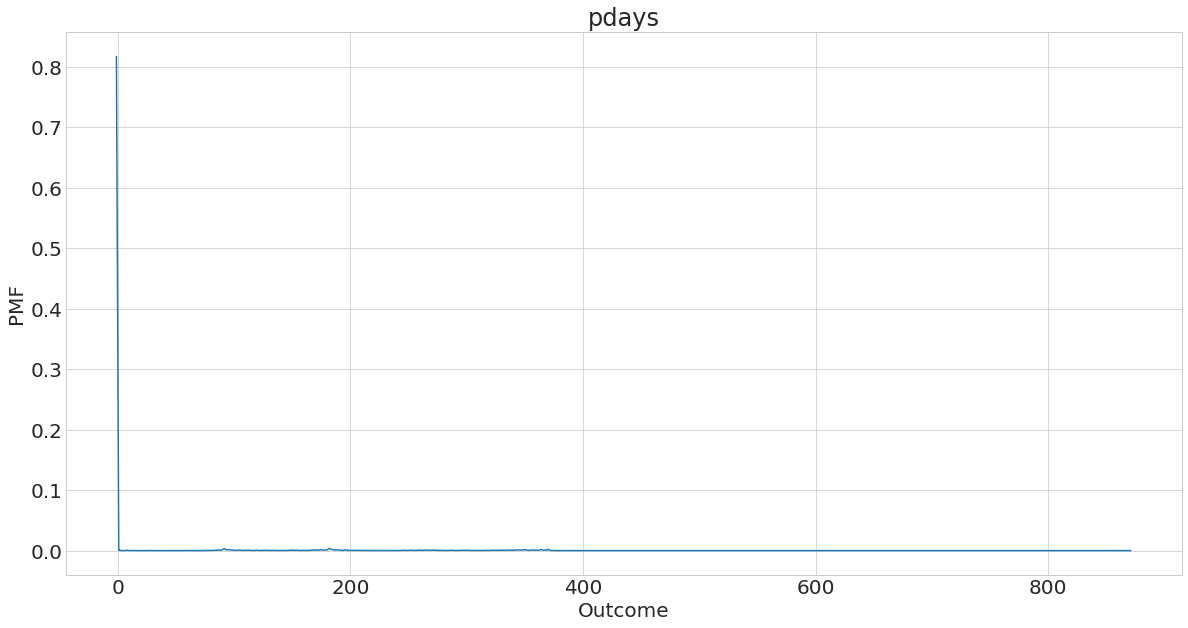

_______________________________________________________________________________________________________________________________


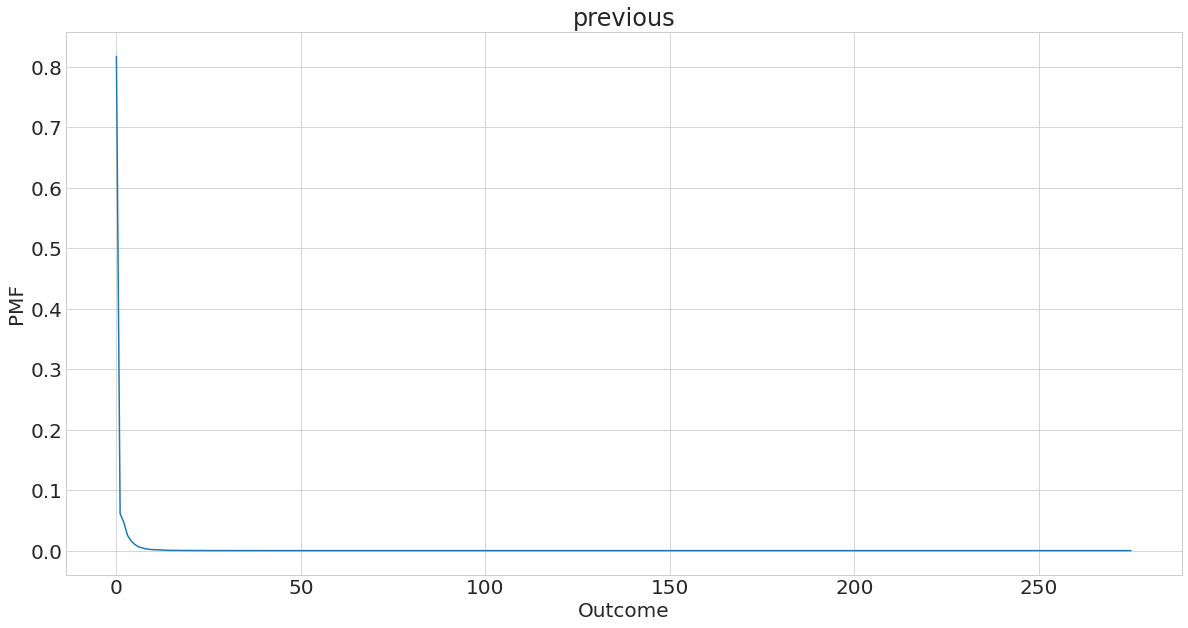

_______________________________________________________________________________________________________________________________


In [26]:
# plot displays the Pmf as a line.
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    feature_pmf = Pmf.from_seq(df[feature], normalize=True)
    feature_pmf.plot()
    applay_pmf(feature)
    print("_______________________________________________________________________________________________________________________________")

#### The CDFs Of All The Numerical Features As A Line

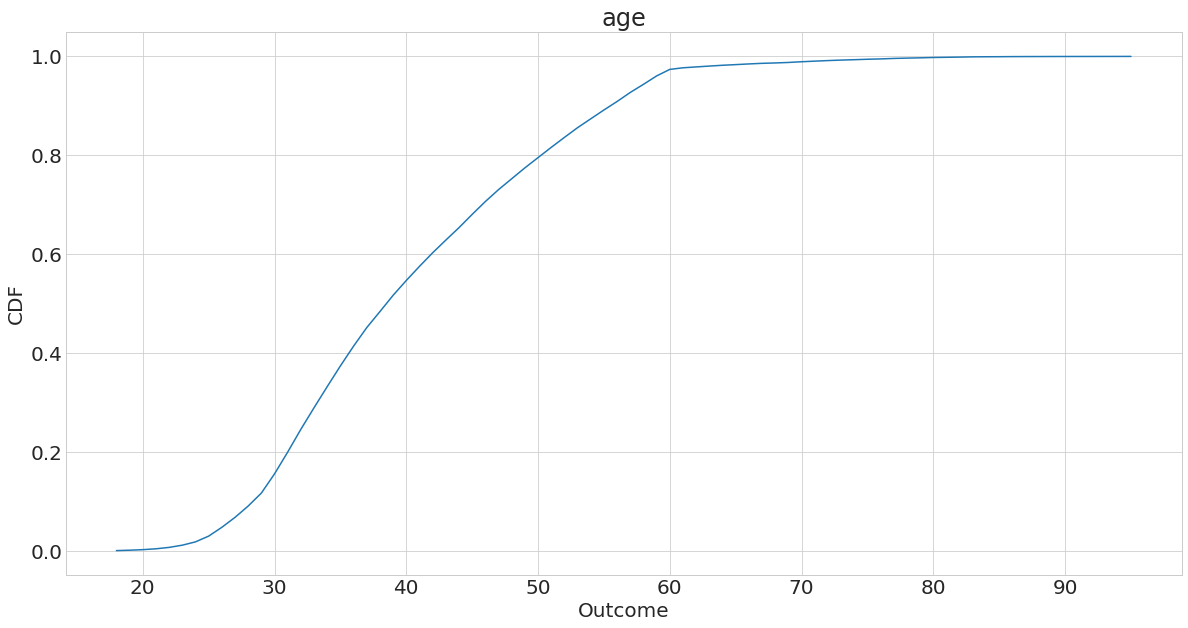

_______________________________________________________________________________________________________________________________


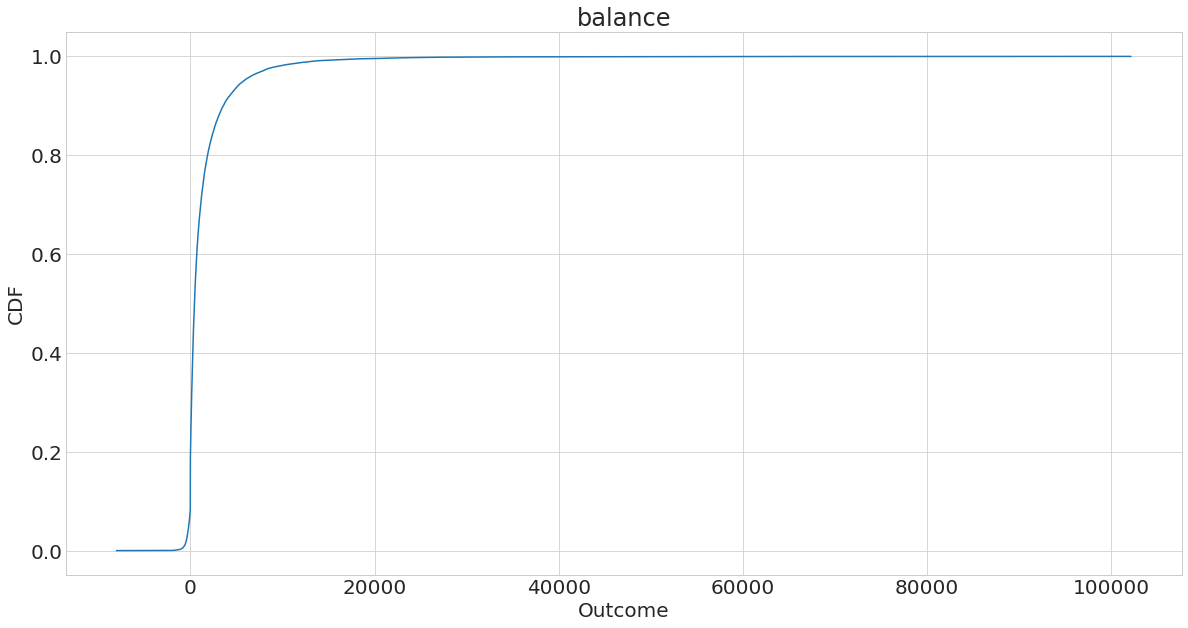

_______________________________________________________________________________________________________________________________


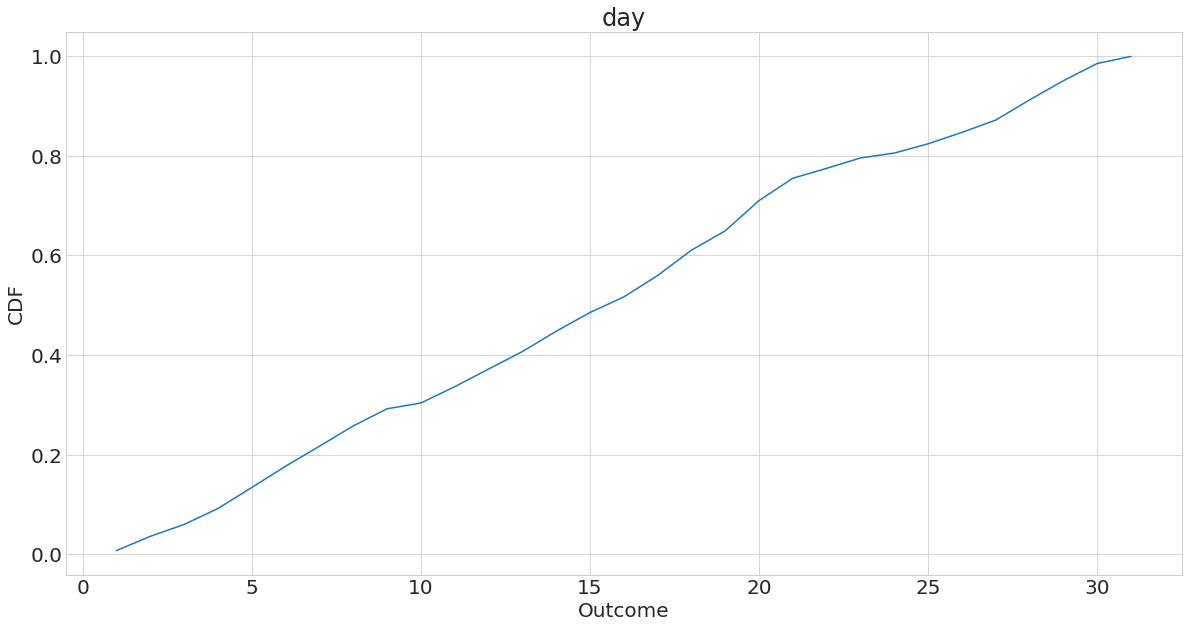

_______________________________________________________________________________________________________________________________


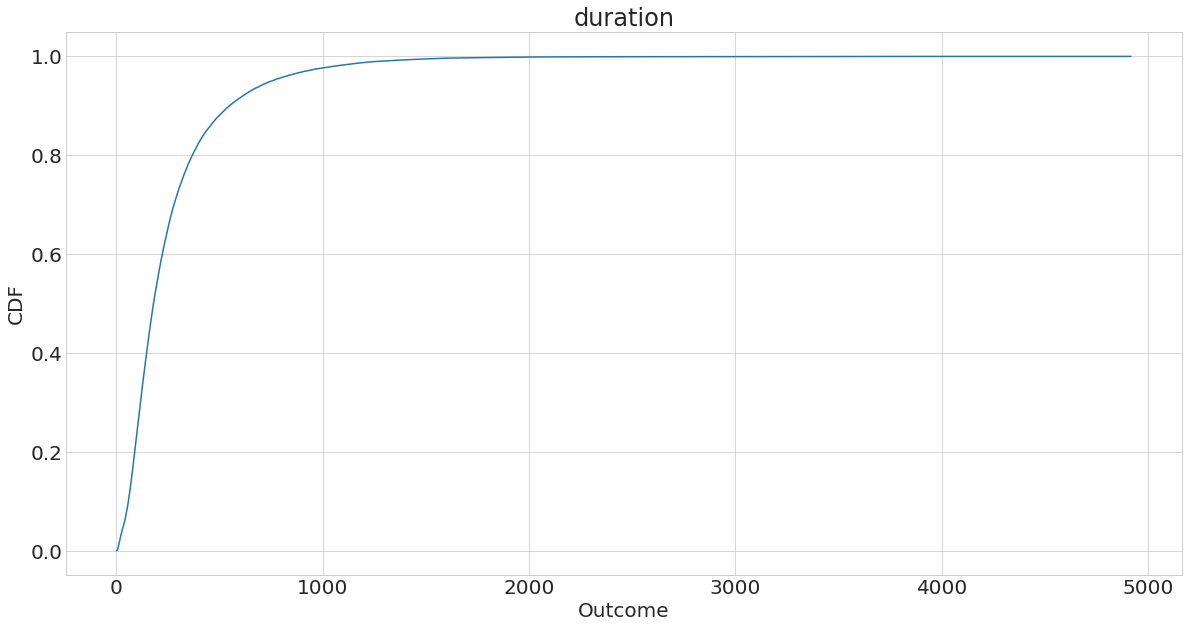

_______________________________________________________________________________________________________________________________


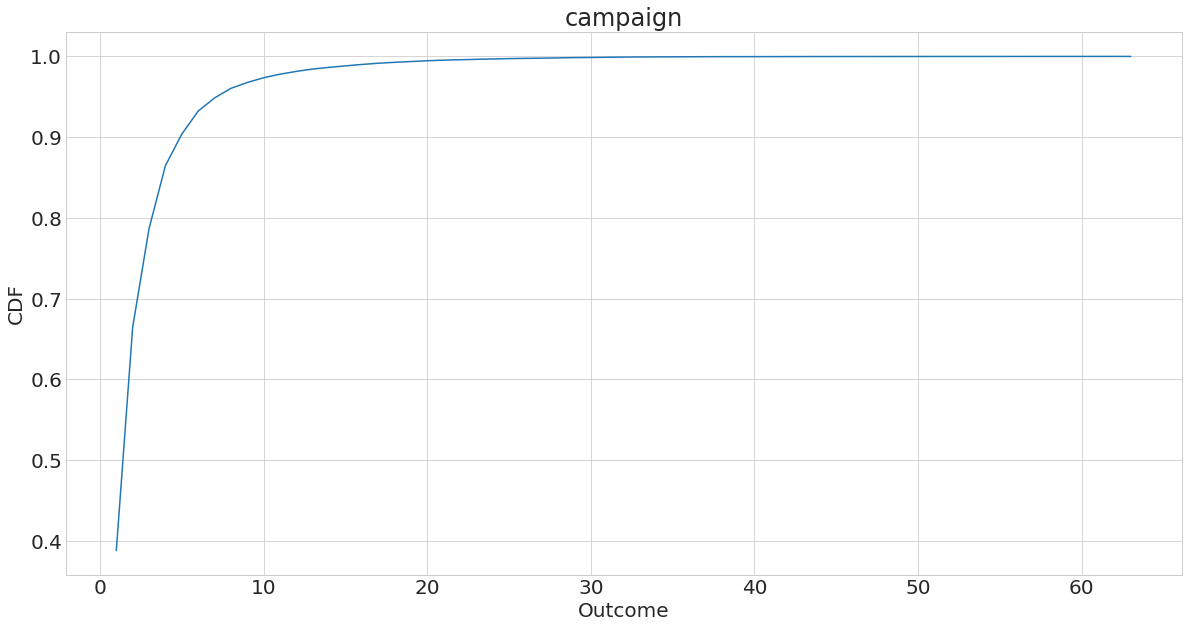

_______________________________________________________________________________________________________________________________


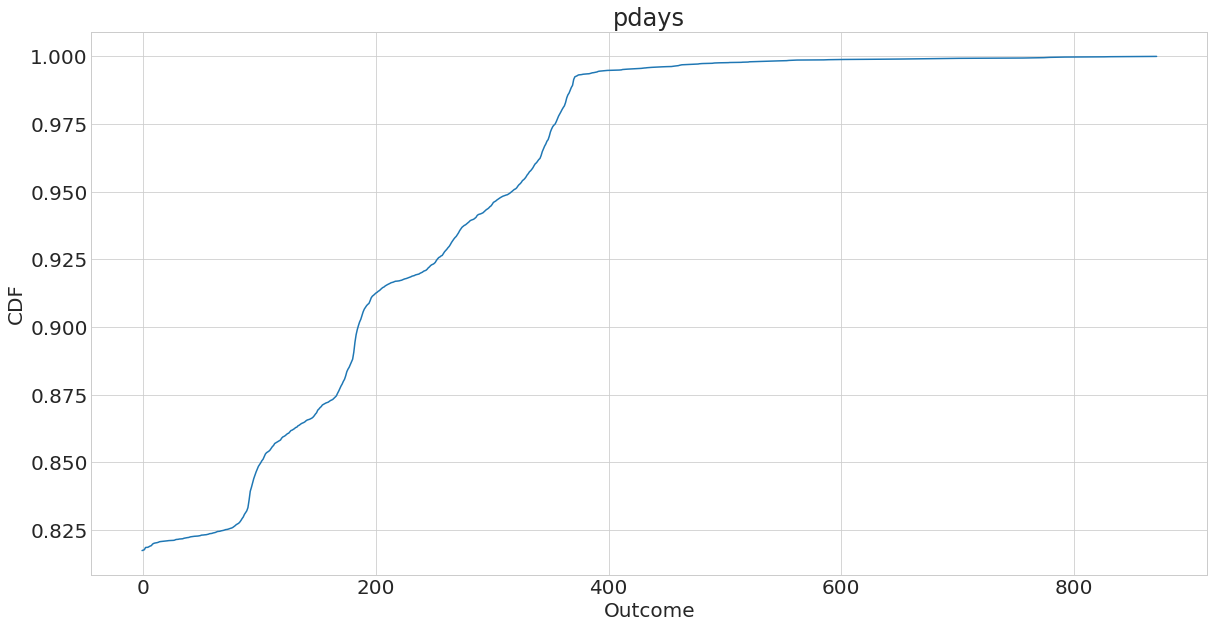

_______________________________________________________________________________________________________________________________


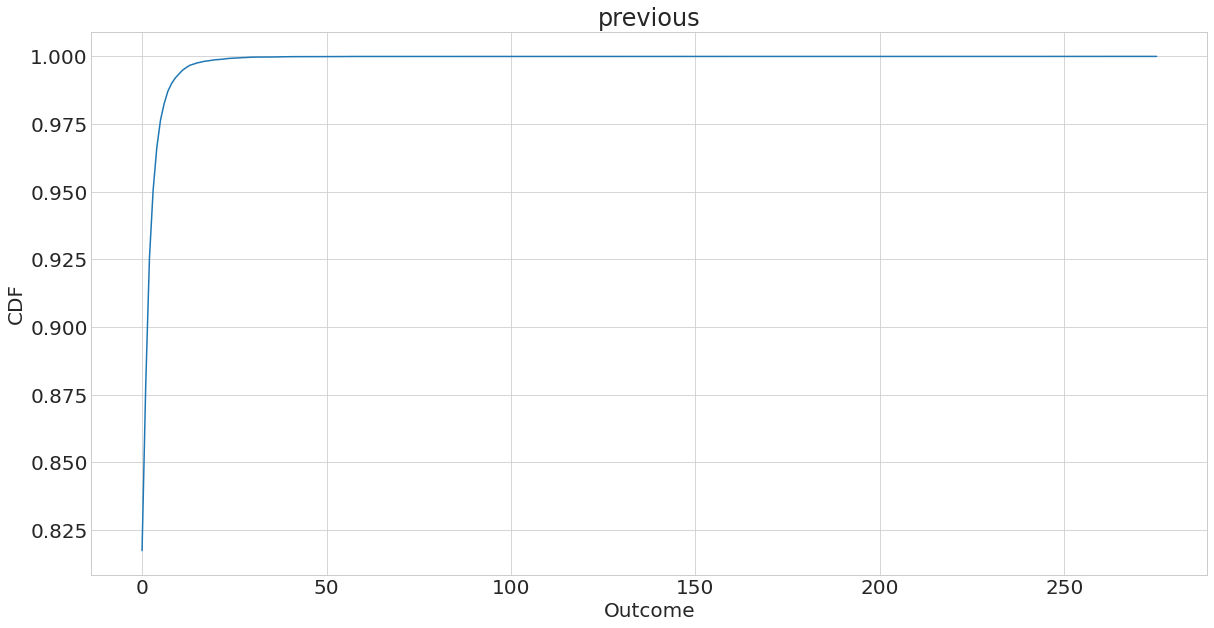

_______________________________________________________________________________________________________________________________


In [27]:
# plot displays the CDF as a line.
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    feature_cdf = Cdf.from_seq(df[feature])
    feature_cdf.plot()
    applay_cdf(feature)
    print("_______________________________________________________________________________________________________________________________")

#### The CDFs Of All The Numerical Features As A Step Function

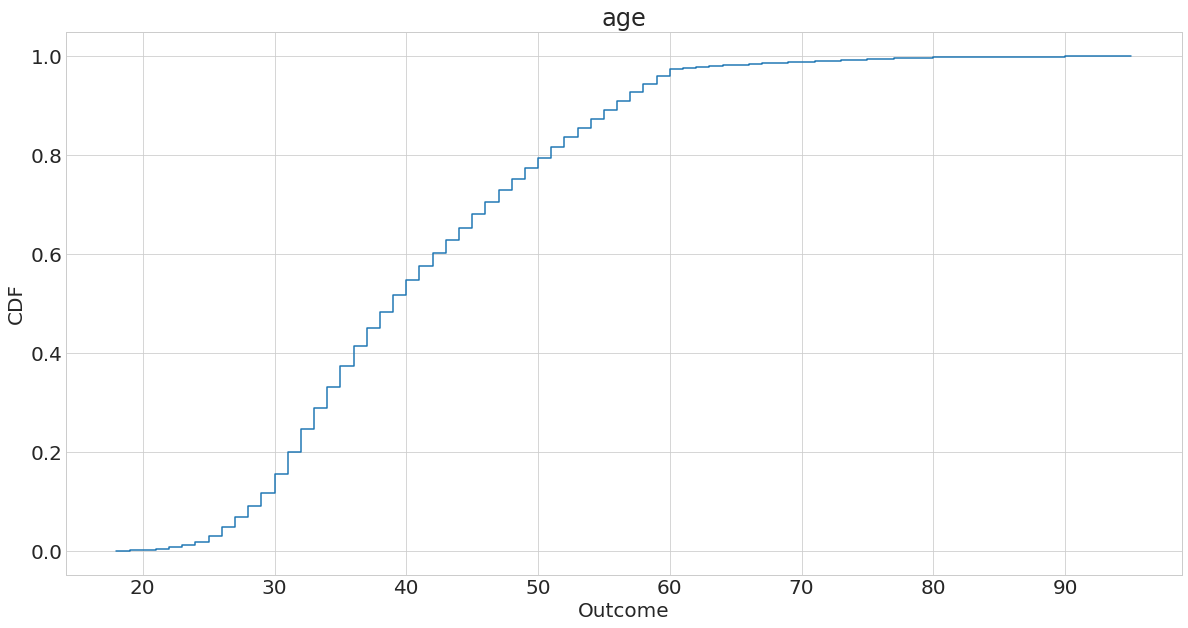

_______________________________________________________________________________________________________________________________


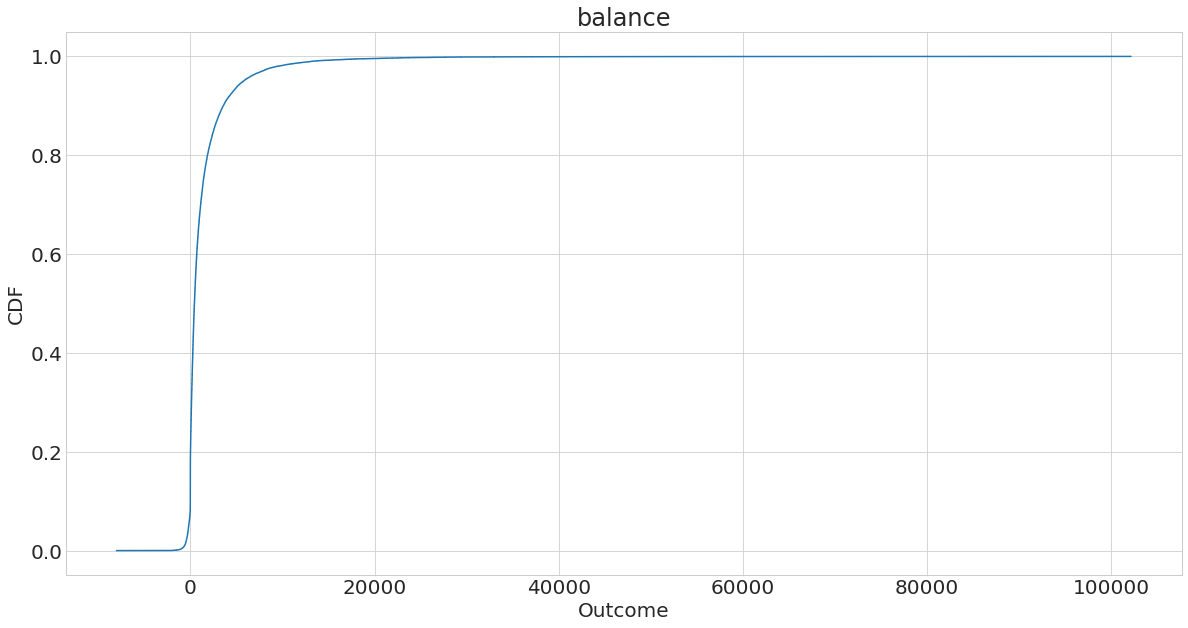

_______________________________________________________________________________________________________________________________


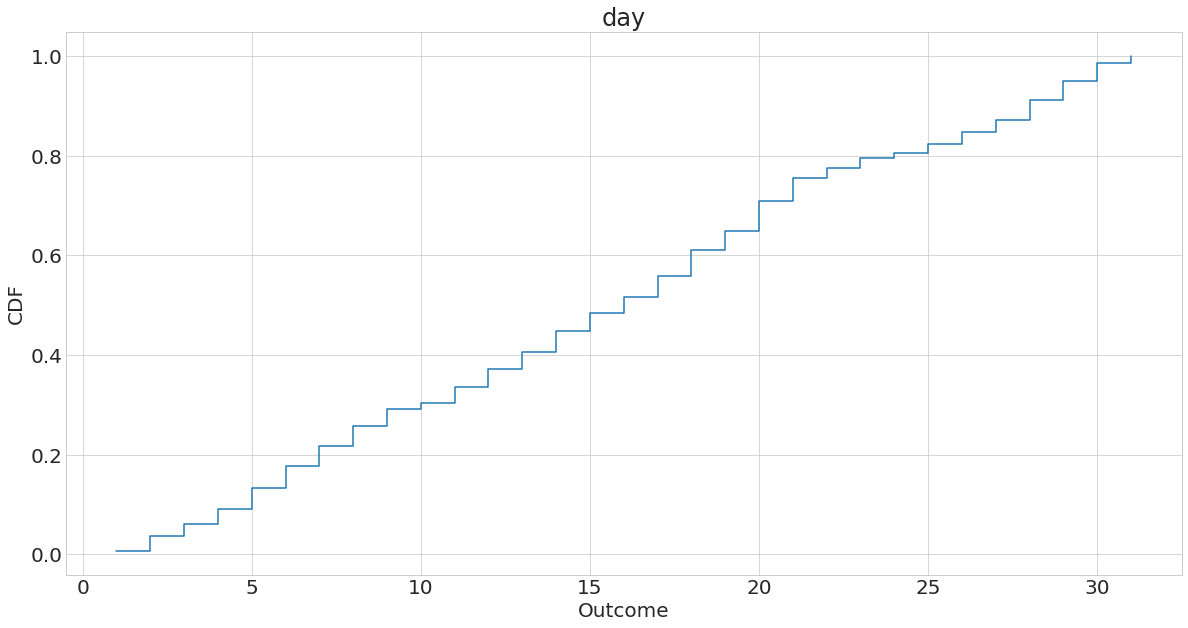

_______________________________________________________________________________________________________________________________


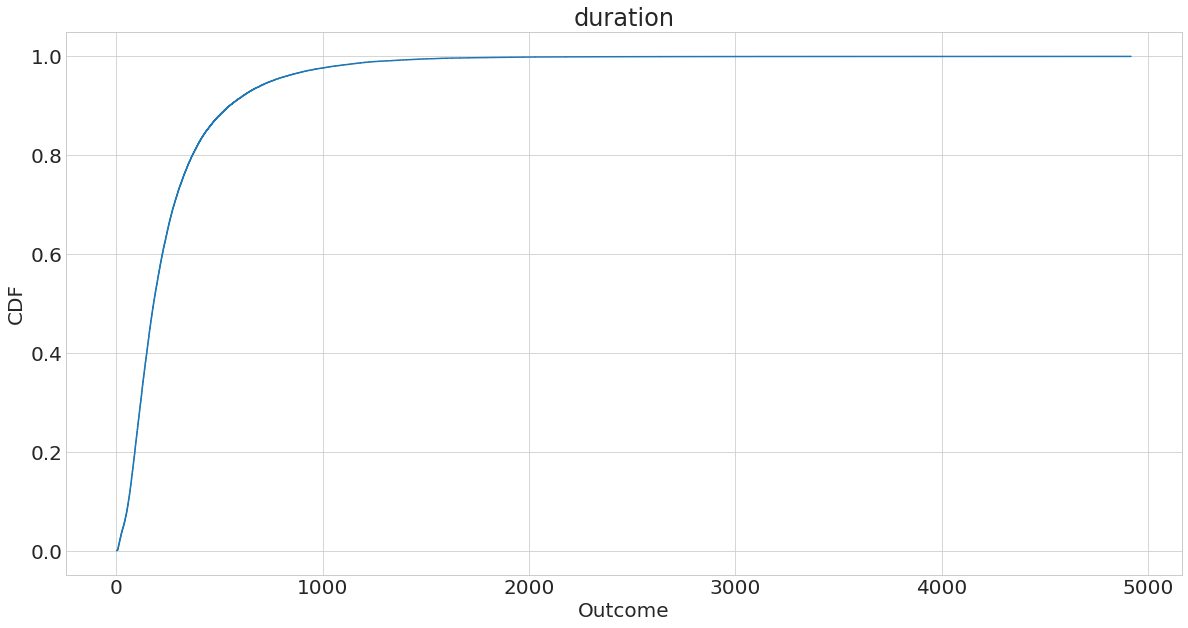

_______________________________________________________________________________________________________________________________


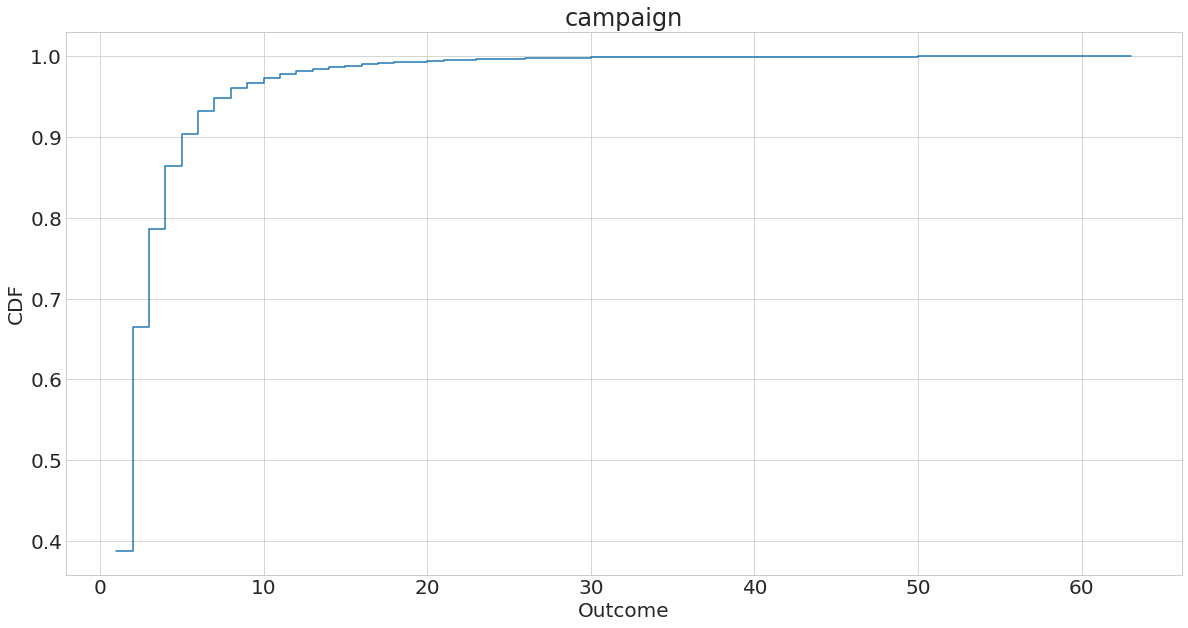

_______________________________________________________________________________________________________________________________


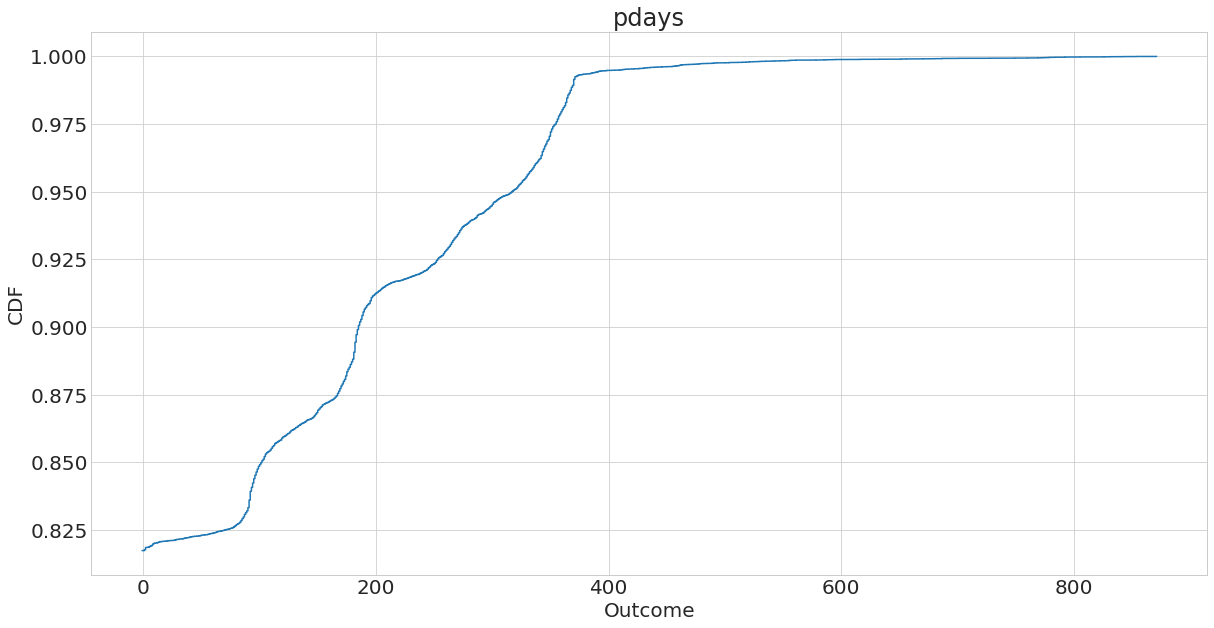

_______________________________________________________________________________________________________________________________


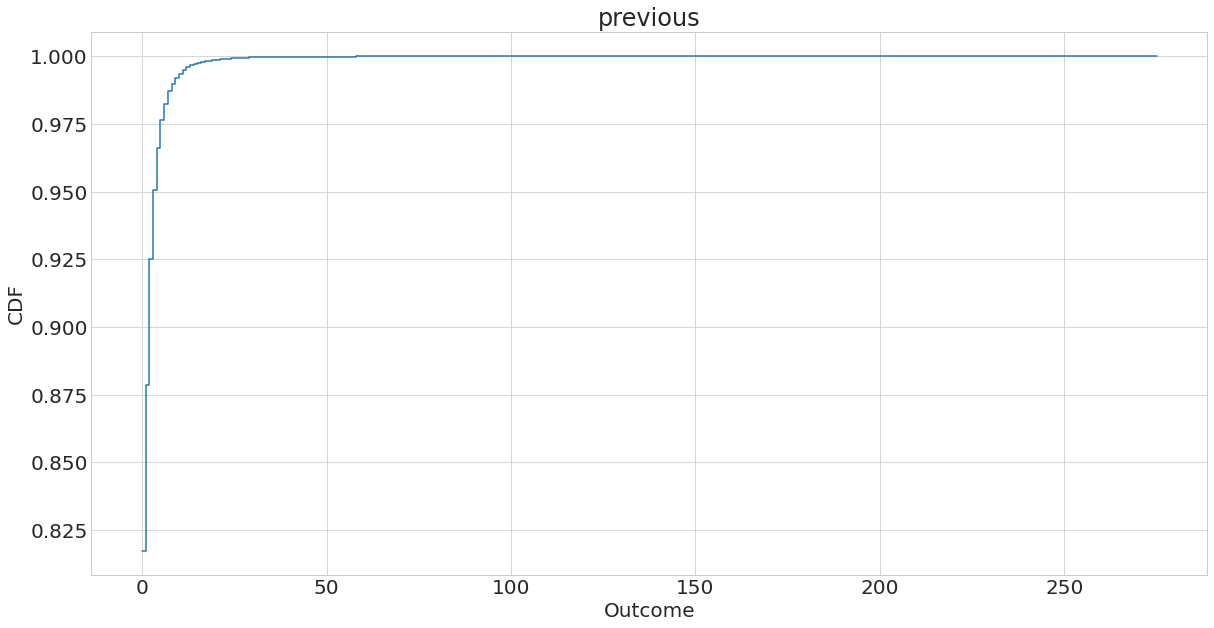

_______________________________________________________________________________________________________________________________


In [28]:
# plot displays the CDF as a step function.
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    feature_cdf = Cdf.from_seq(df[feature])
    feature_cdf.step()
    applay_cdf(feature)
    print("_______________________________________________________________________________________________________________________________")

#### The Comparison Between PMFs Of The Numerical Features According To The Target Variable

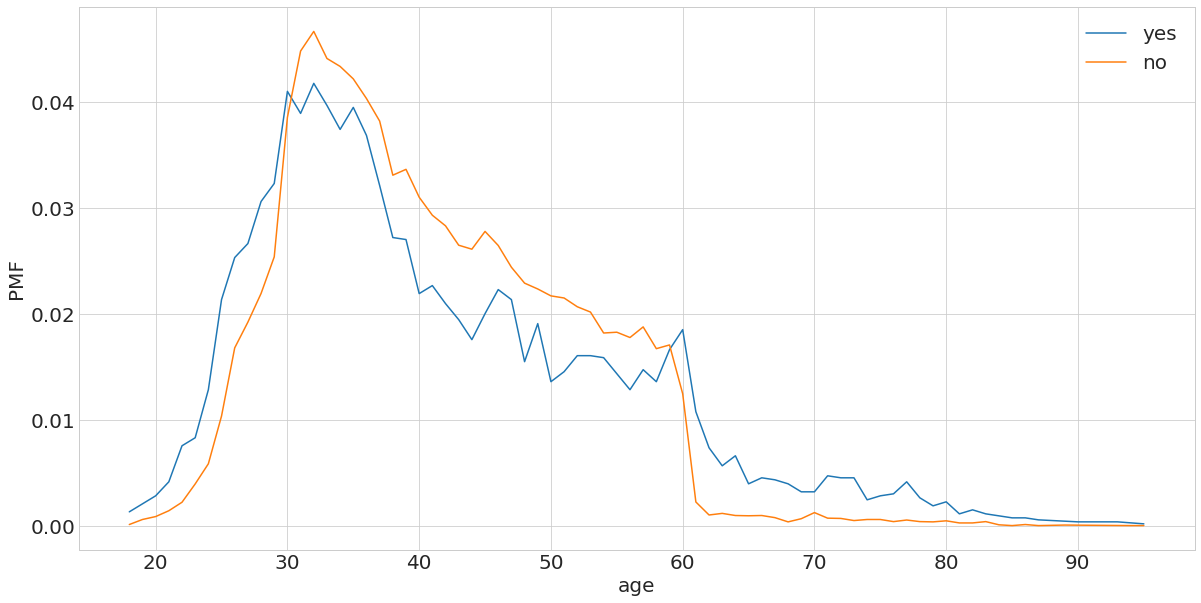

_______________________________________________________________________________________________________________________________


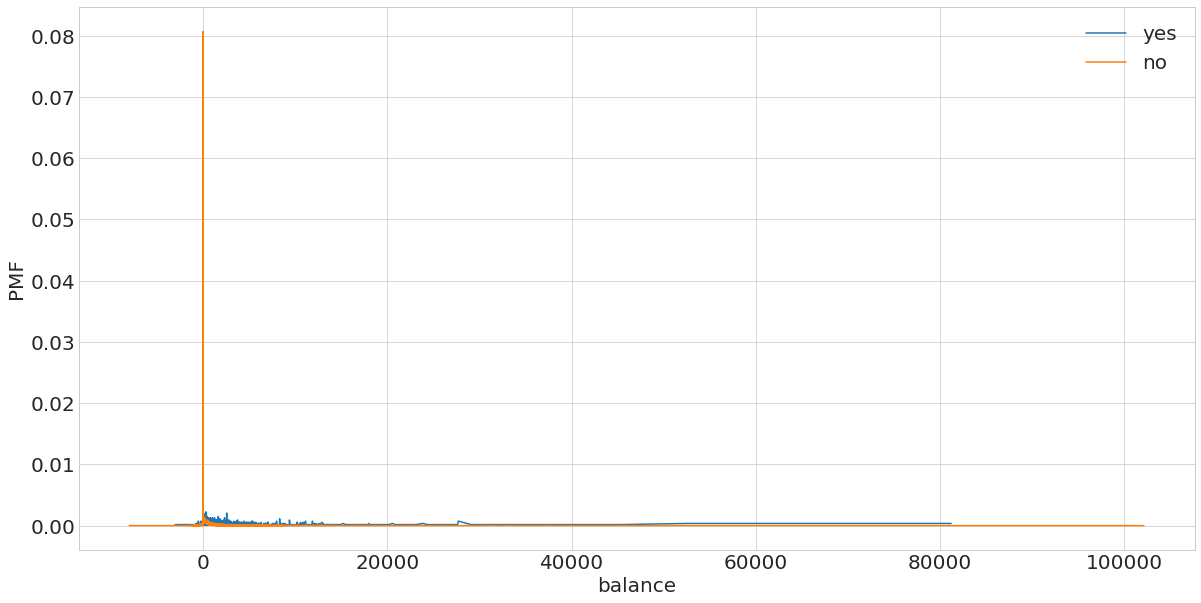

_______________________________________________________________________________________________________________________________


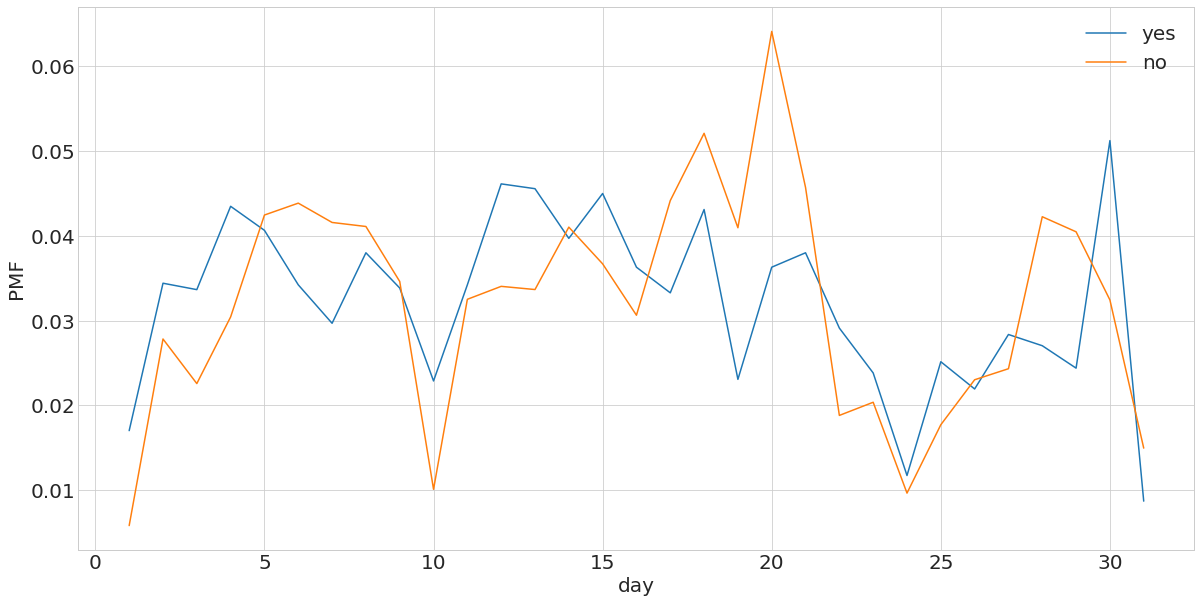

_______________________________________________________________________________________________________________________________


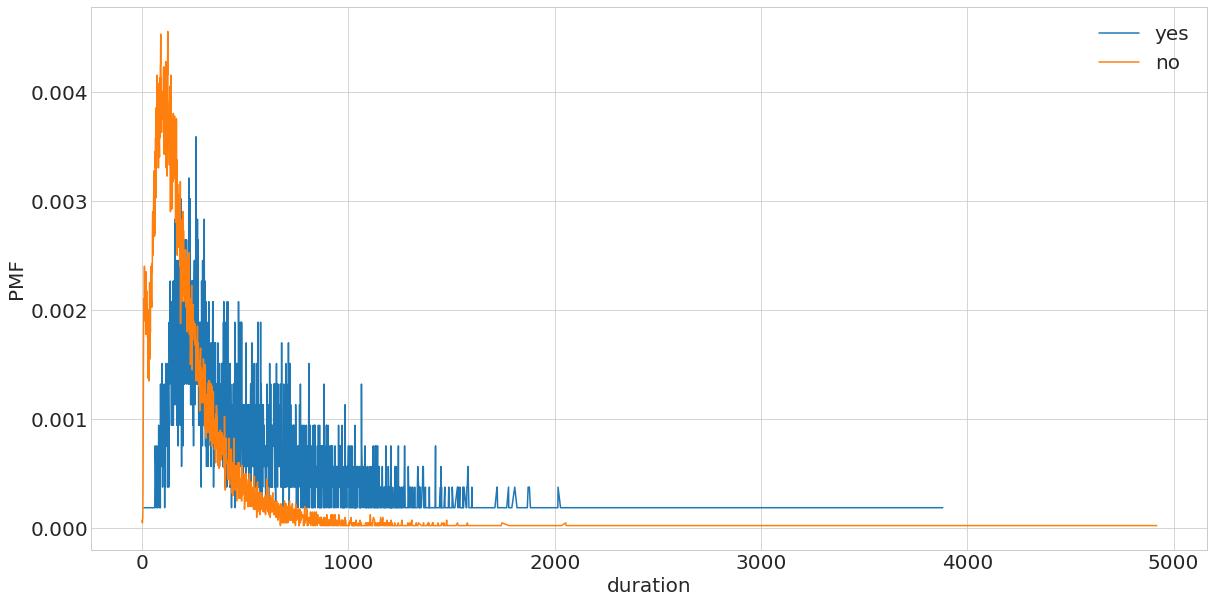

_______________________________________________________________________________________________________________________________


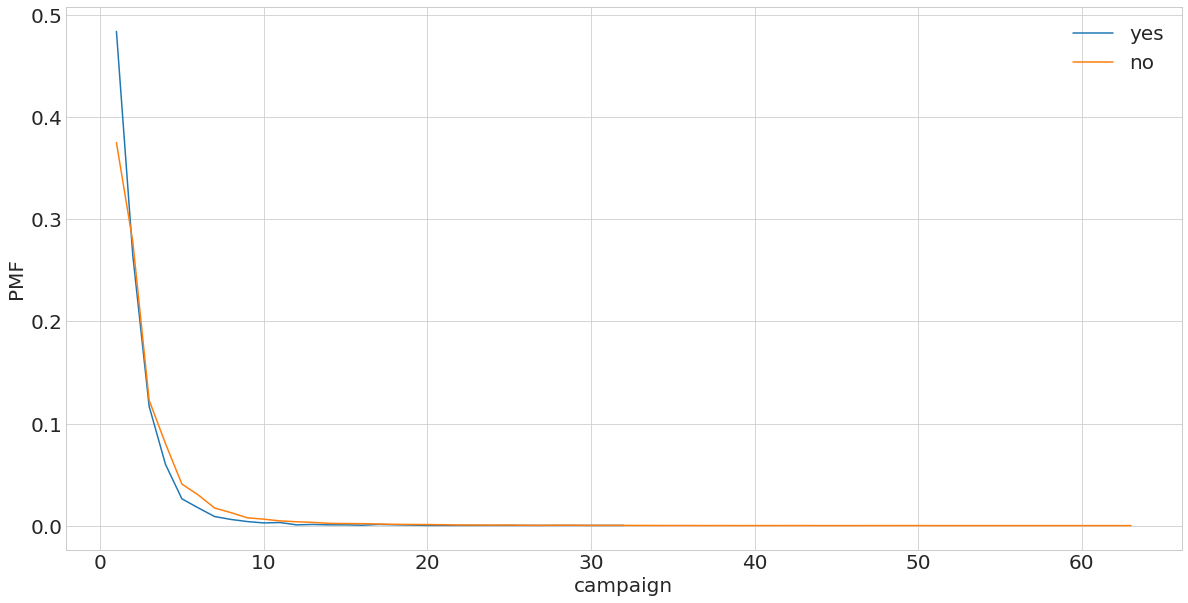

_______________________________________________________________________________________________________________________________


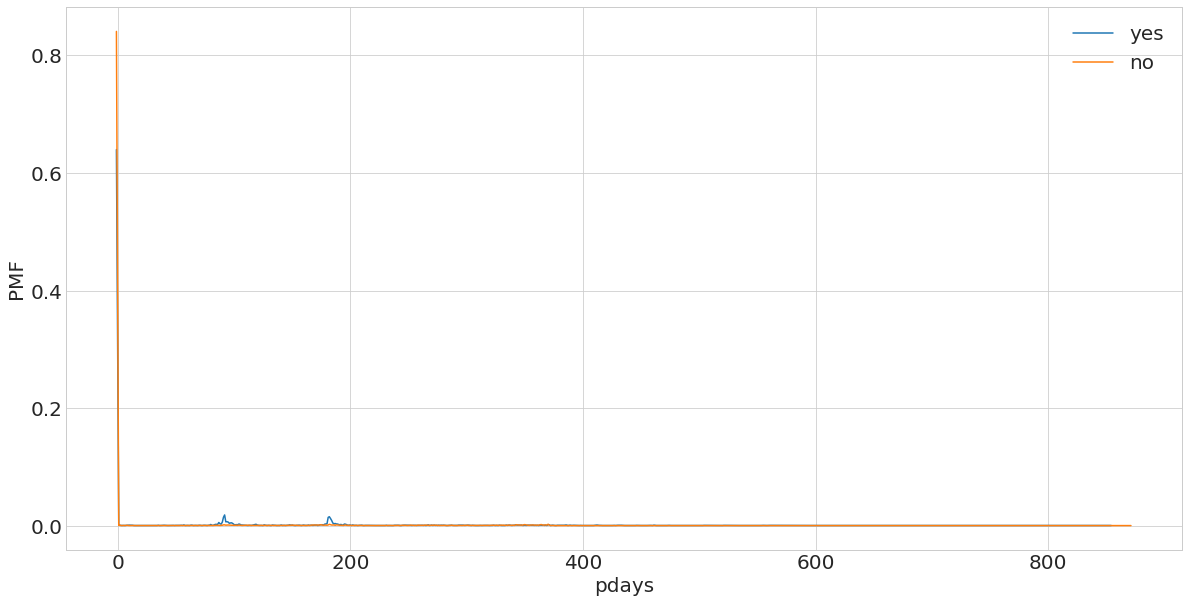

_______________________________________________________________________________________________________________________________


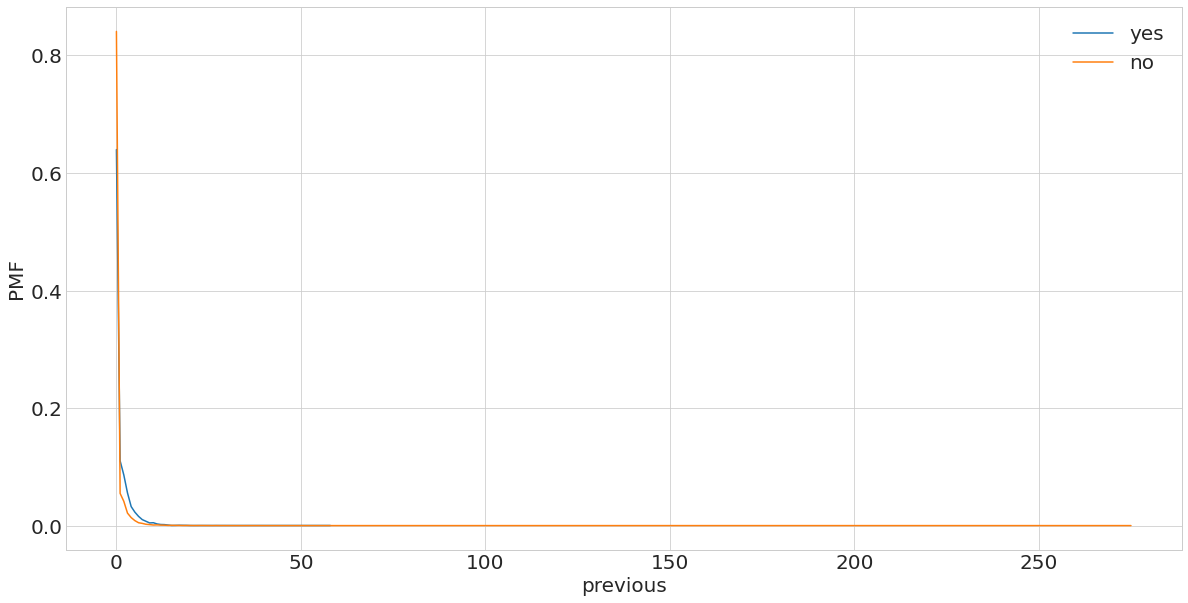

_______________________________________________________________________________________________________________________________


In [29]:
for feature in numeric_features:
    compare_pmfs(feature)
    print("_______________________________________________________________________________________________________________________________")

#### The Comparison Between CDFs Of The Numerical Features According To The Target Variable

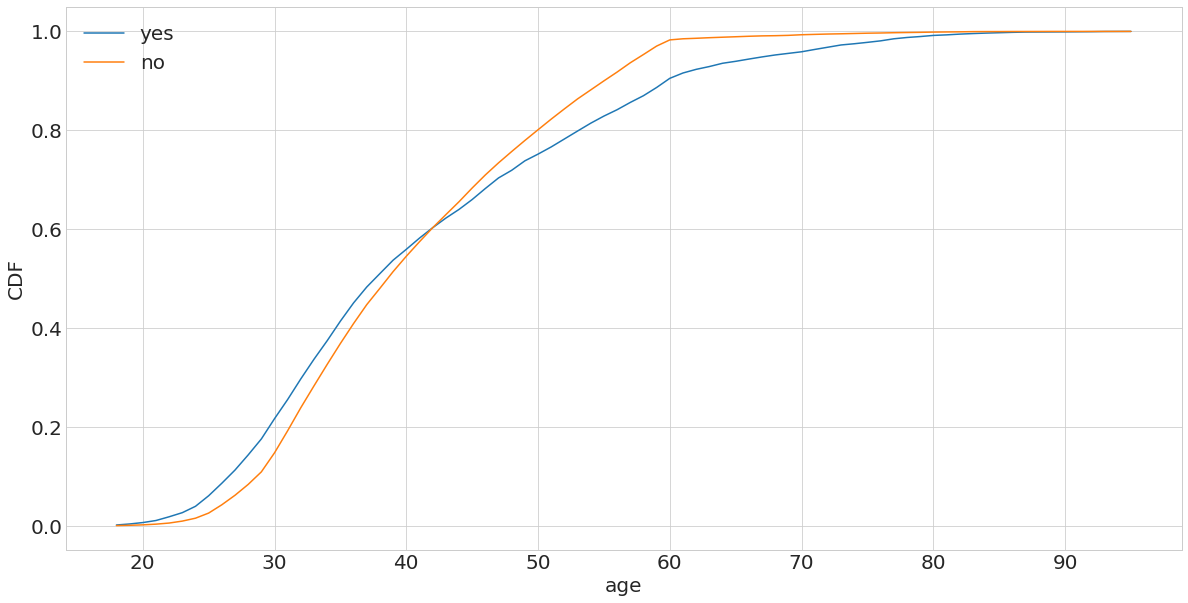

_______________________________________________________________________________________________________________________________


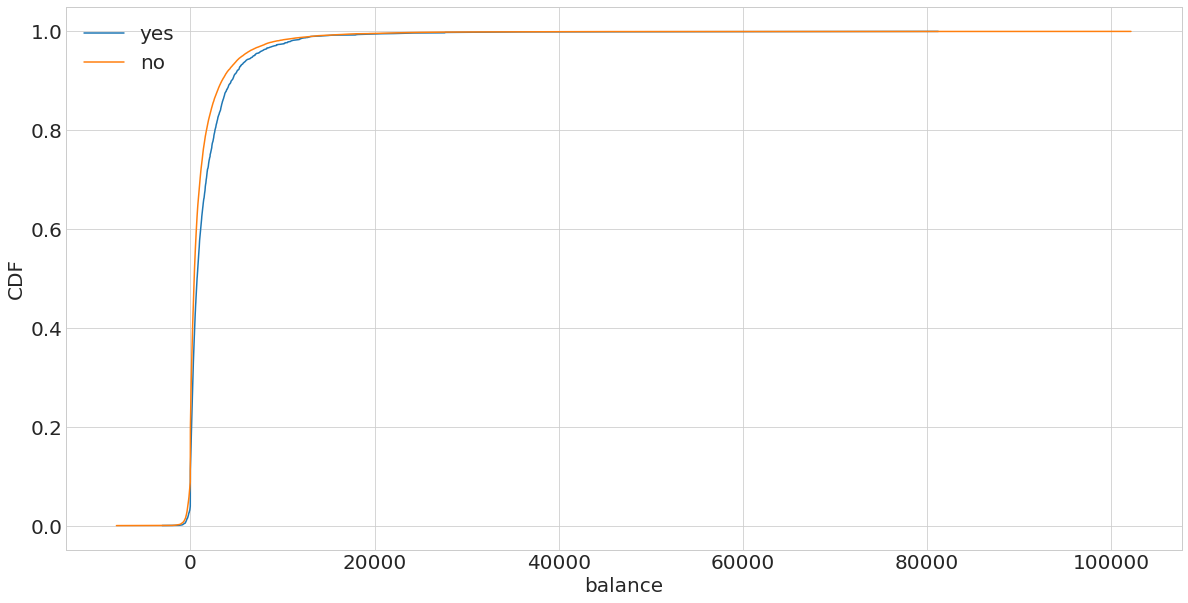

_______________________________________________________________________________________________________________________________


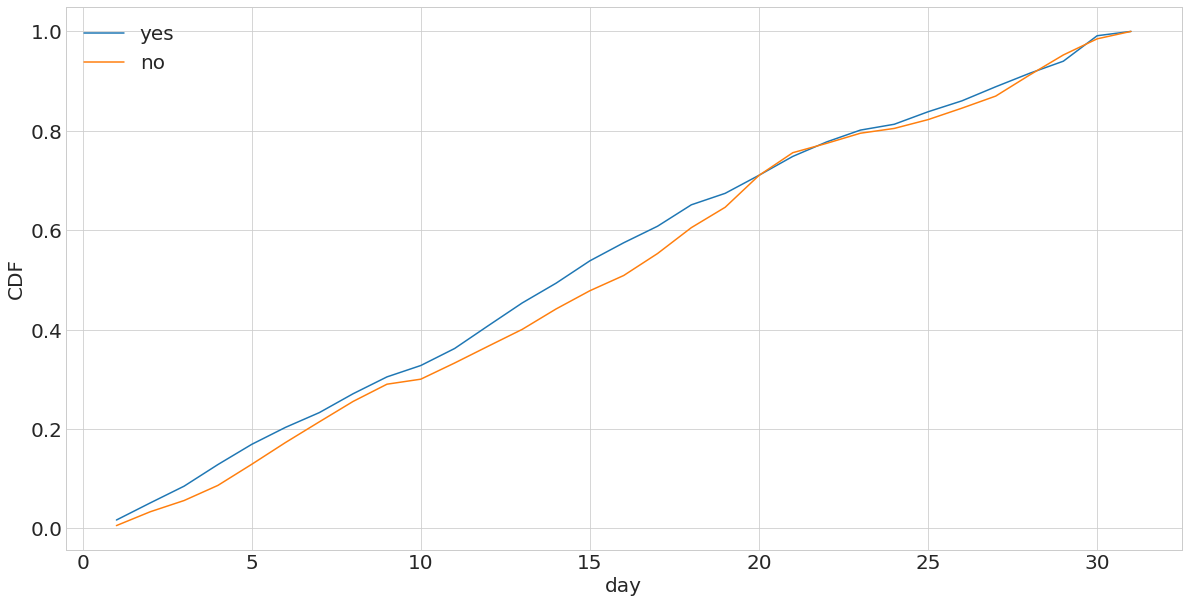

_______________________________________________________________________________________________________________________________


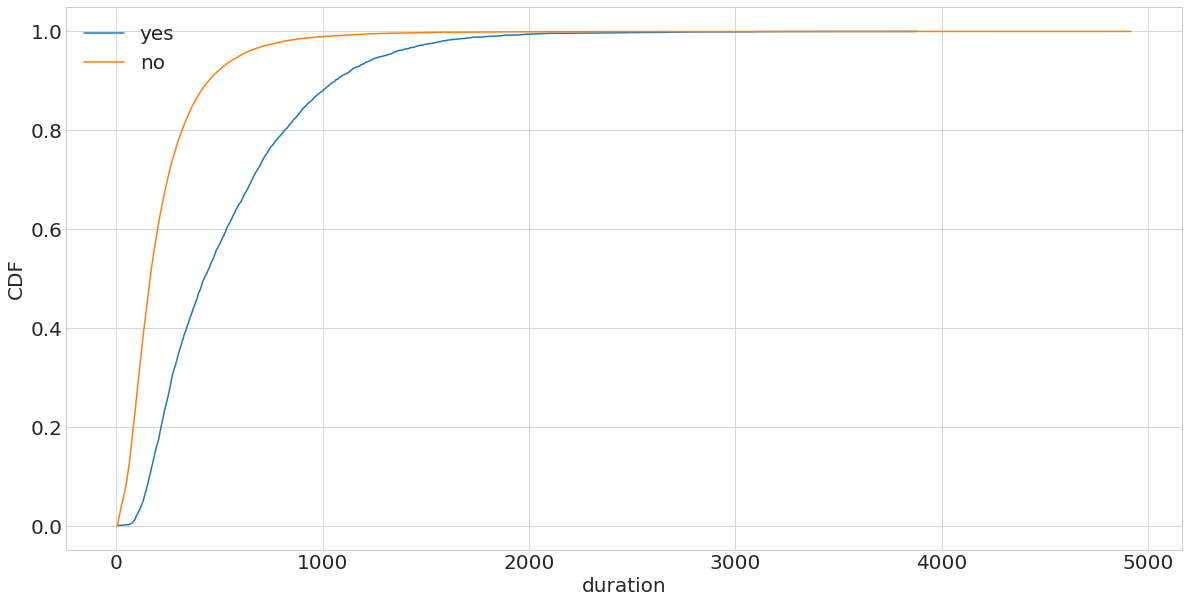

_______________________________________________________________________________________________________________________________


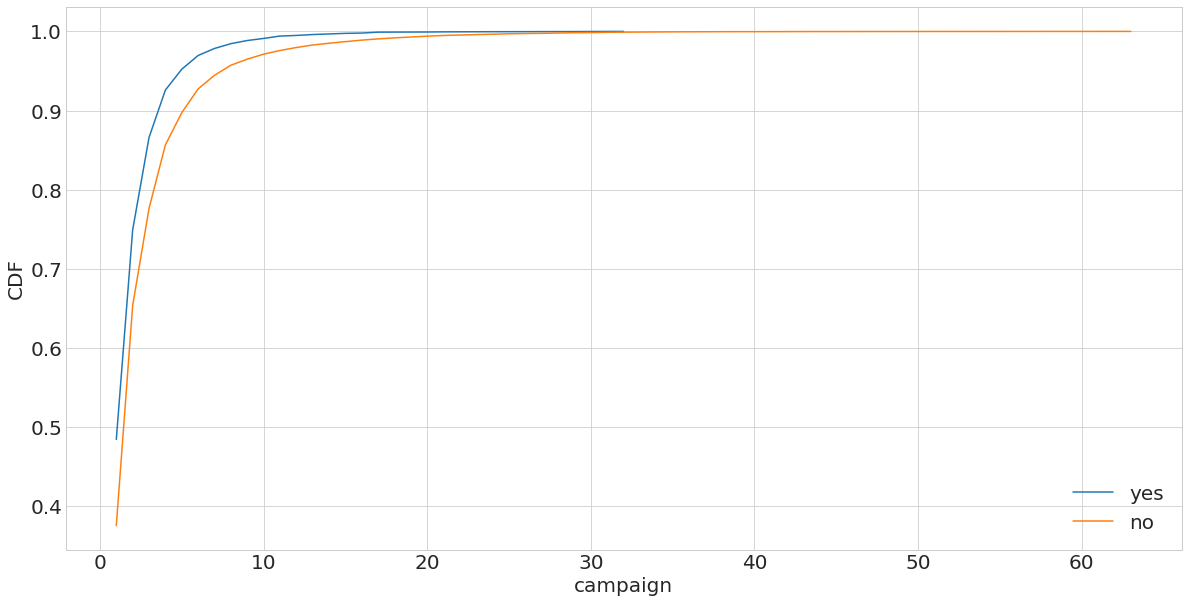

_______________________________________________________________________________________________________________________________


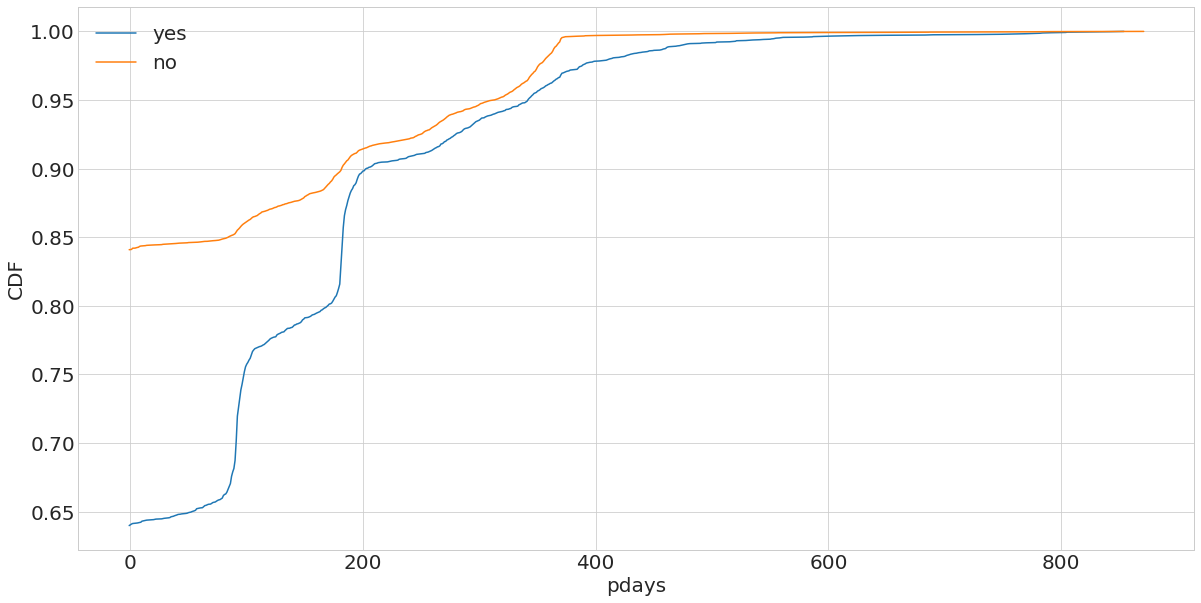

_______________________________________________________________________________________________________________________________


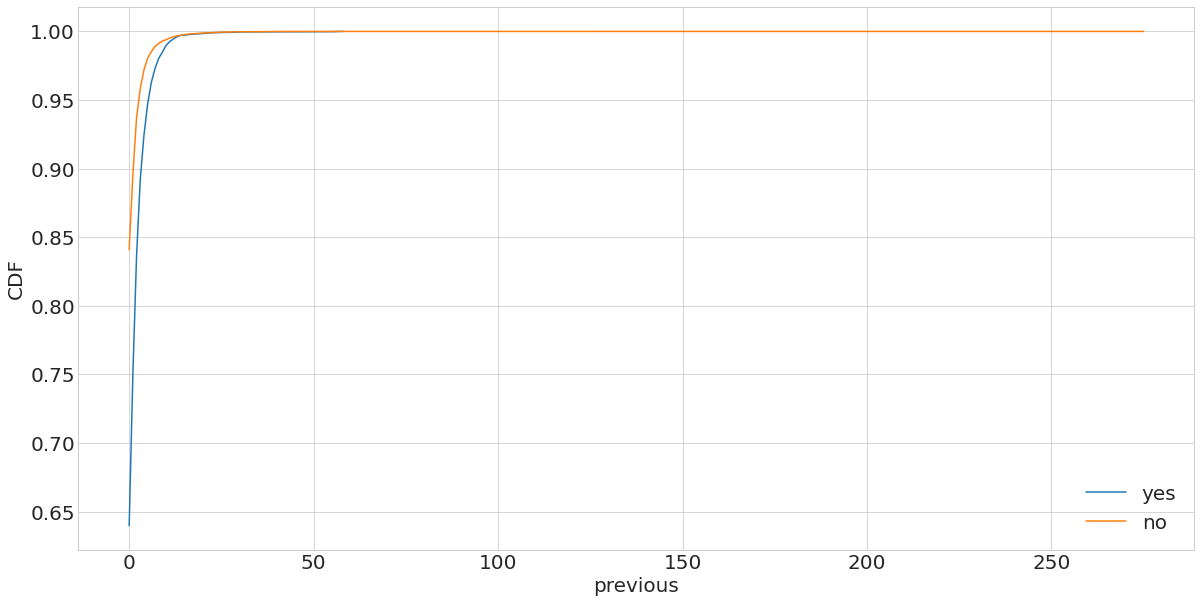

_______________________________________________________________________________________________________________________________


In [30]:
for feature in numeric_features:
    compare_cdfs(feature)
    print("_______________________________________________________________________________________________________________________________")

#### The Boxplot of Each Numerical Feature

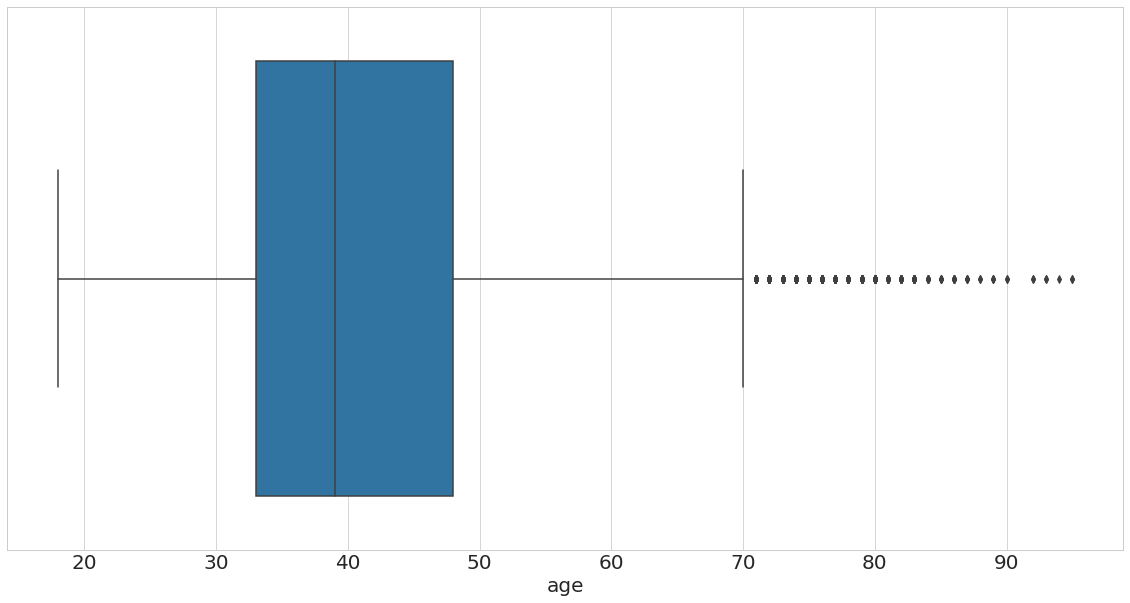

The Lower Quartile outlier is: 10.5
The 25th Percentile is: 33.0
The 50th Percentile is: 39.0
The 75th Percentile is: 48.0
The Upper Quartile outlier is: 70.5
_______________________________________________________________________________________________________________________________


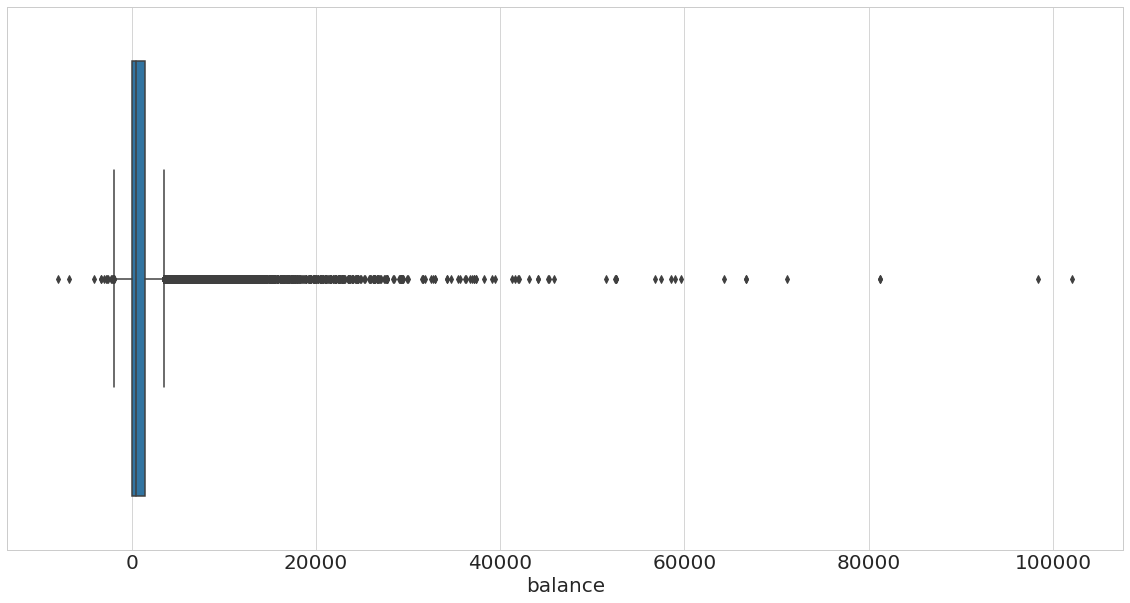

The Lower Quartile outlier is: -1962.0
The 25th Percentile is: 72.0
The 50th Percentile is: 448.0
The 75th Percentile is: 1428.0
The Upper Quartile outlier is: 3462.0
_______________________________________________________________________________________________________________________________


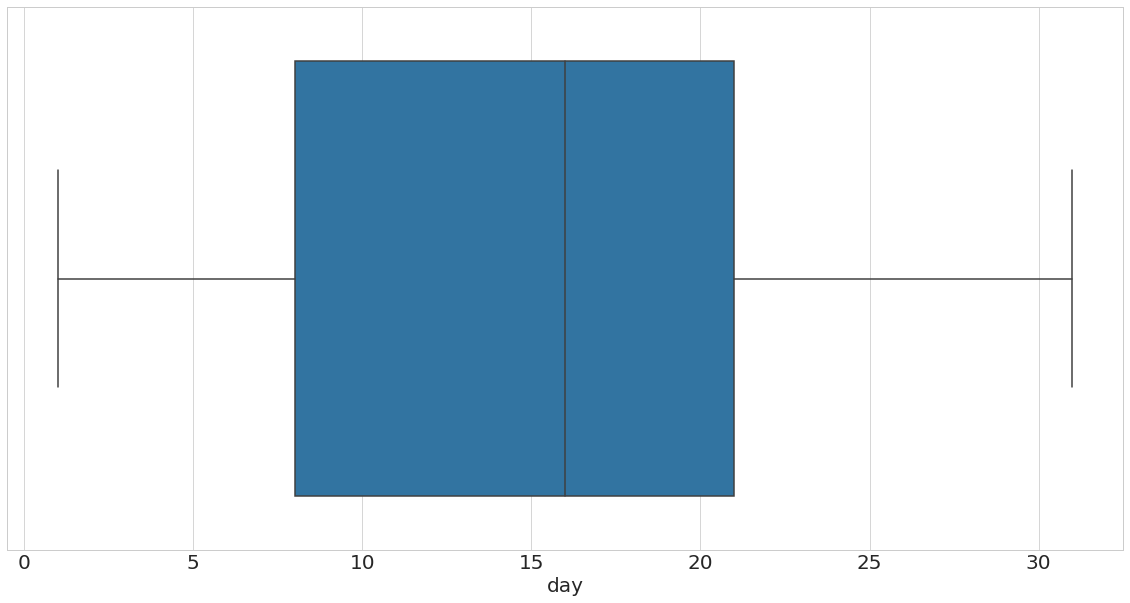

The Lower Quartile outlier is: -11.5
The 25th Percentile is: 8.0
The 50th Percentile is: 16.0
The 75th Percentile is: 21.0
The Upper Quartile outlier is: 40.5
_______________________________________________________________________________________________________________________________


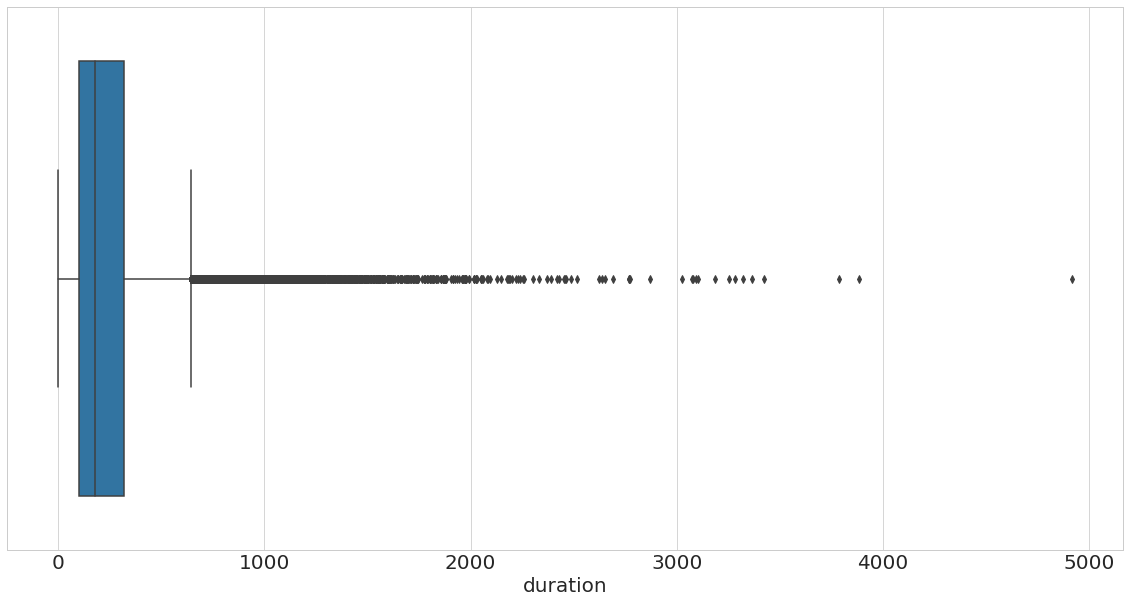

The Lower Quartile outlier is: -221.0
The 25th Percentile is: 103.0
The 50th Percentile is: 180.0
The 75th Percentile is: 319.0
The Upper Quartile outlier is: 643.0
_______________________________________________________________________________________________________________________________


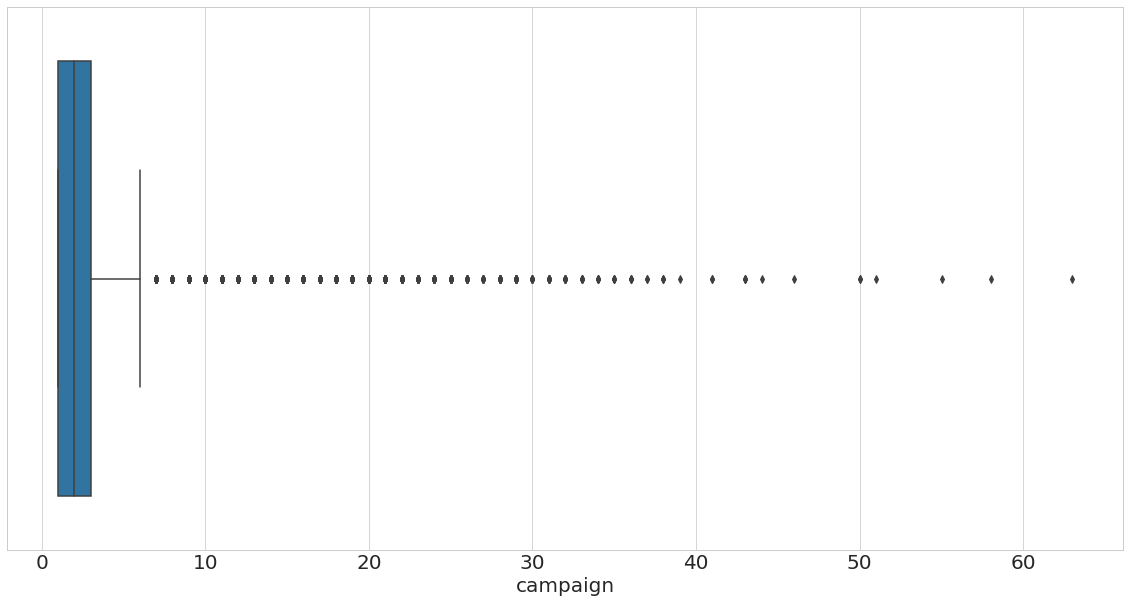

The Lower Quartile outlier is: -2.0
The 25th Percentile is: 1.0
The 50th Percentile is: 2.0
The 75th Percentile is: 3.0
The Upper Quartile outlier is: 6.0
_______________________________________________________________________________________________________________________________


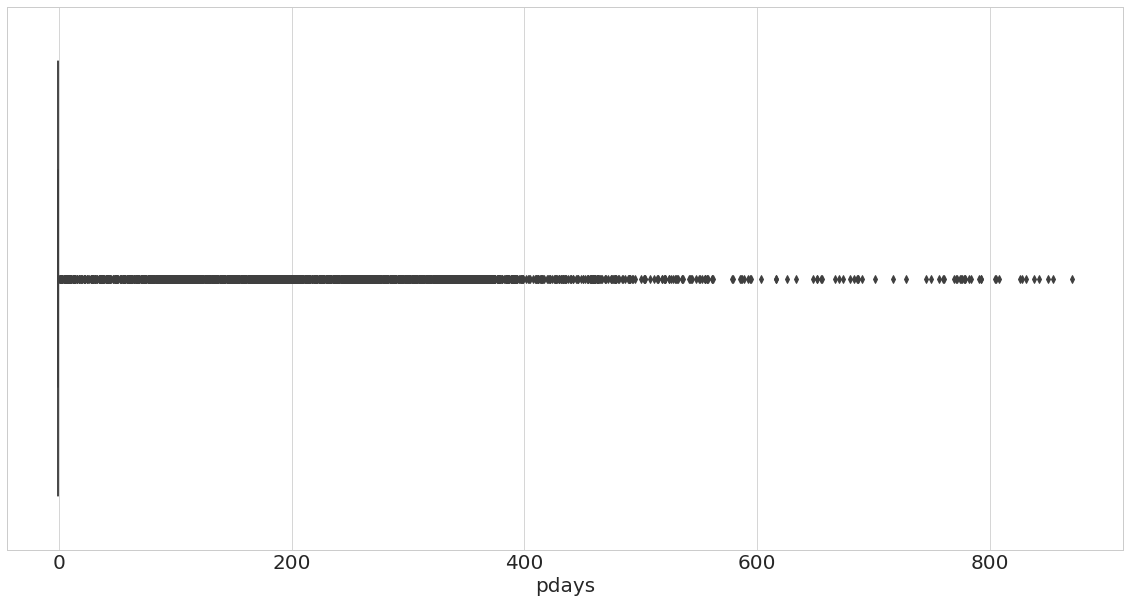

The Lower Quartile outlier is: -1.0
The 25th Percentile is: -1.0
The 50th Percentile is: -1.0
The 75th Percentile is: -1.0
The Upper Quartile outlier is: -1.0
_______________________________________________________________________________________________________________________________


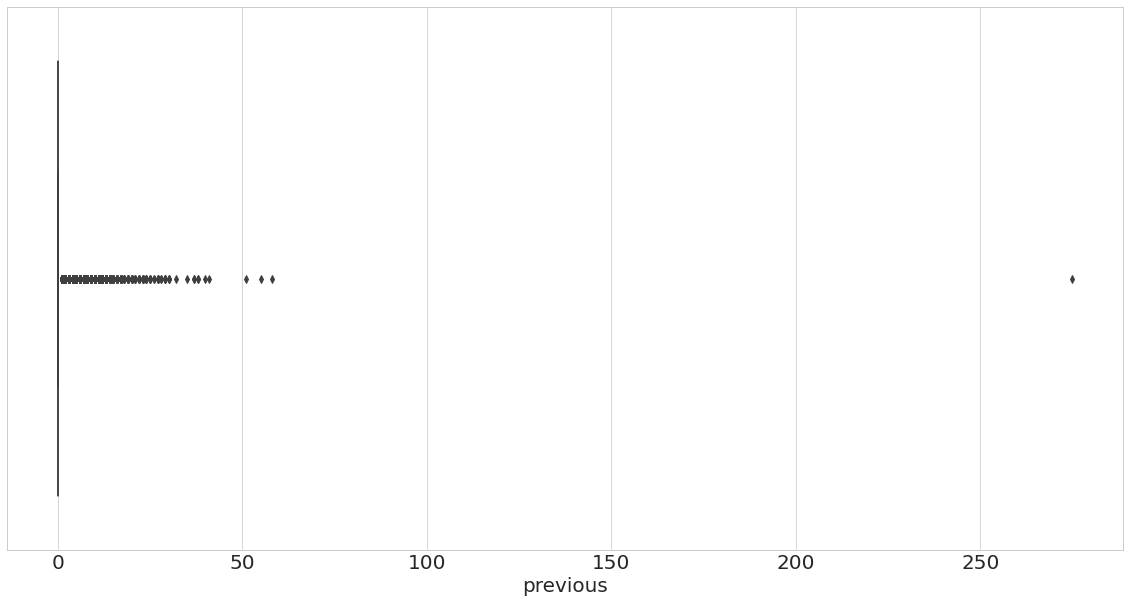

The Lower Quartile outlier is: 0.0
The 25th Percentile is: 0.0
The 50th Percentile is: 0.0
The 75th Percentile is: 0.0
The Upper Quartile outlier is: 0.0
_______________________________________________________________________________________________________________________________


In [31]:
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.show()
    show_percentiles_and_quartiles(feature)
    print("_______________________________________________________________________________________________________________________________")

- There are outliers in all the numerical attributes except the day feature.
- The outliers will not be replaced with another vales as they represen most of the numerical data in the attributes.

#### The Boxplots To Show Target Distribution With Respect To The Numerical Features

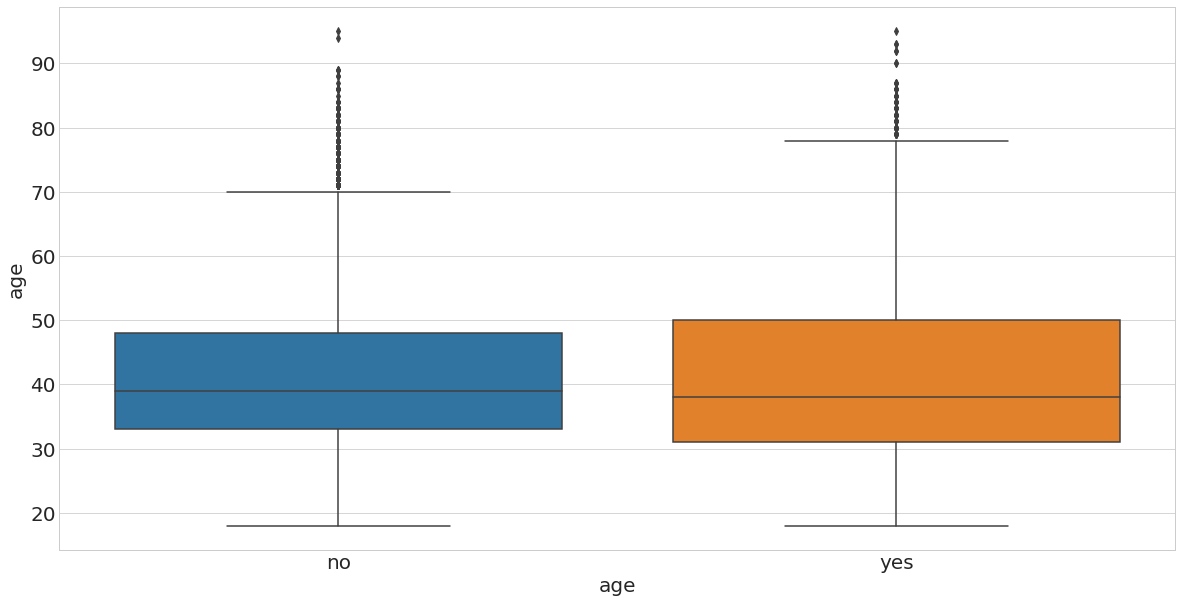

_______________________________________________________________________________________________________________________________


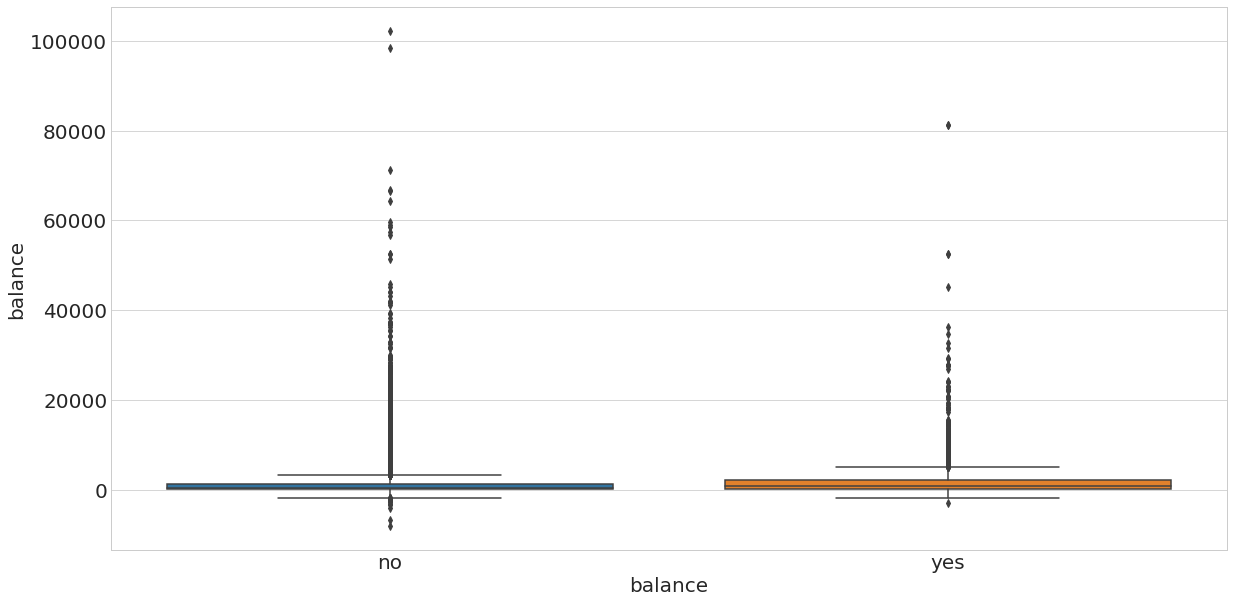

_______________________________________________________________________________________________________________________________


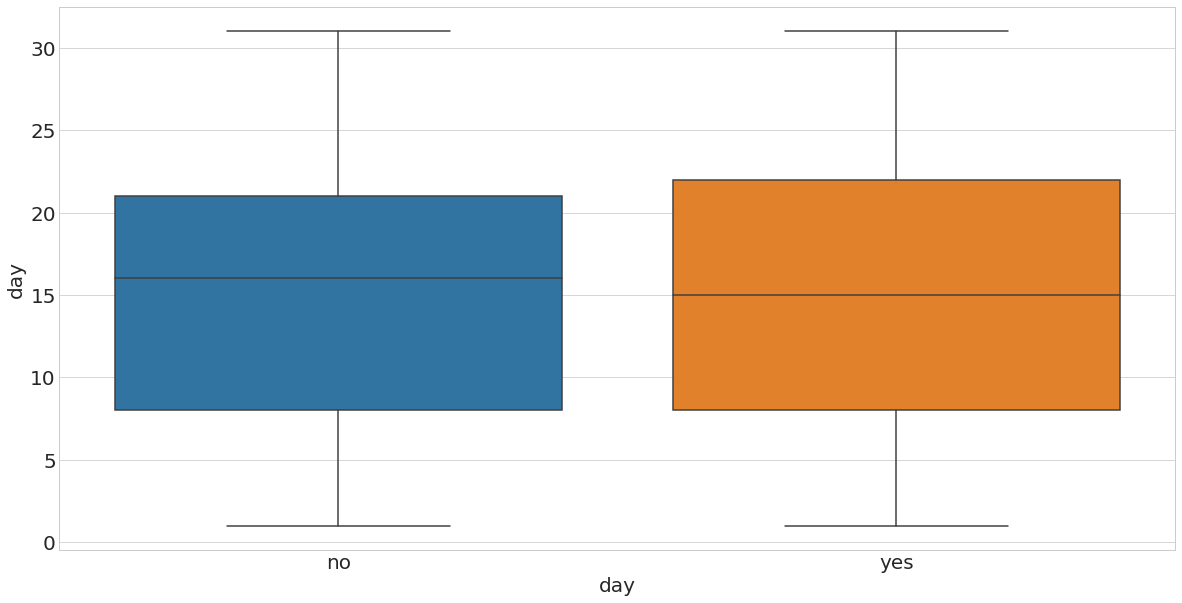

_______________________________________________________________________________________________________________________________


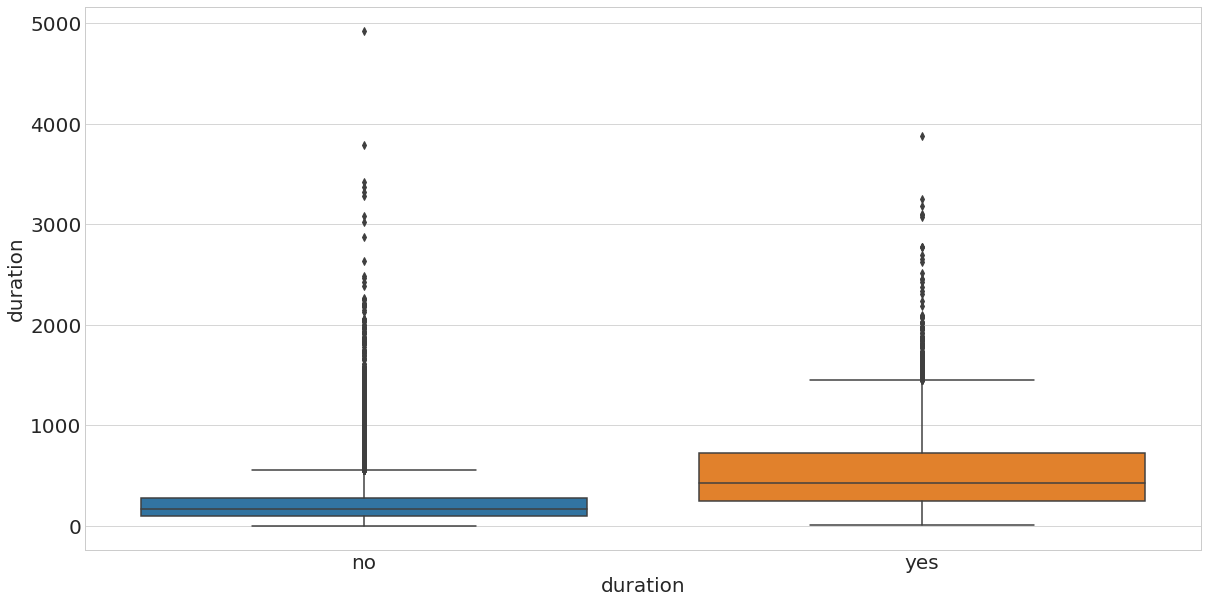

_______________________________________________________________________________________________________________________________


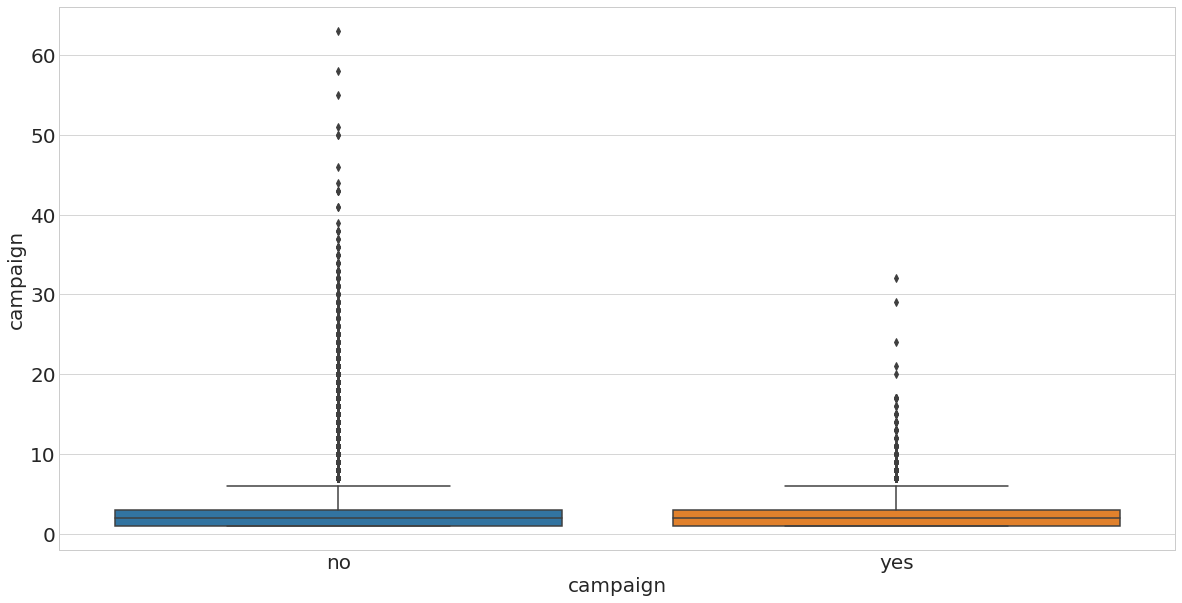

_______________________________________________________________________________________________________________________________


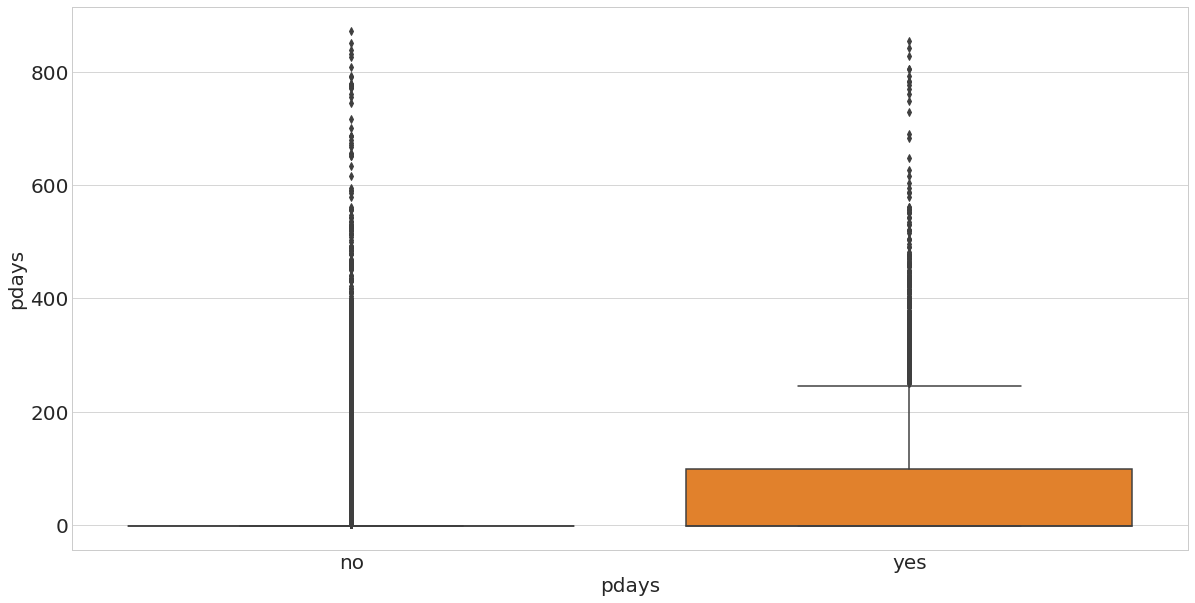

_______________________________________________________________________________________________________________________________


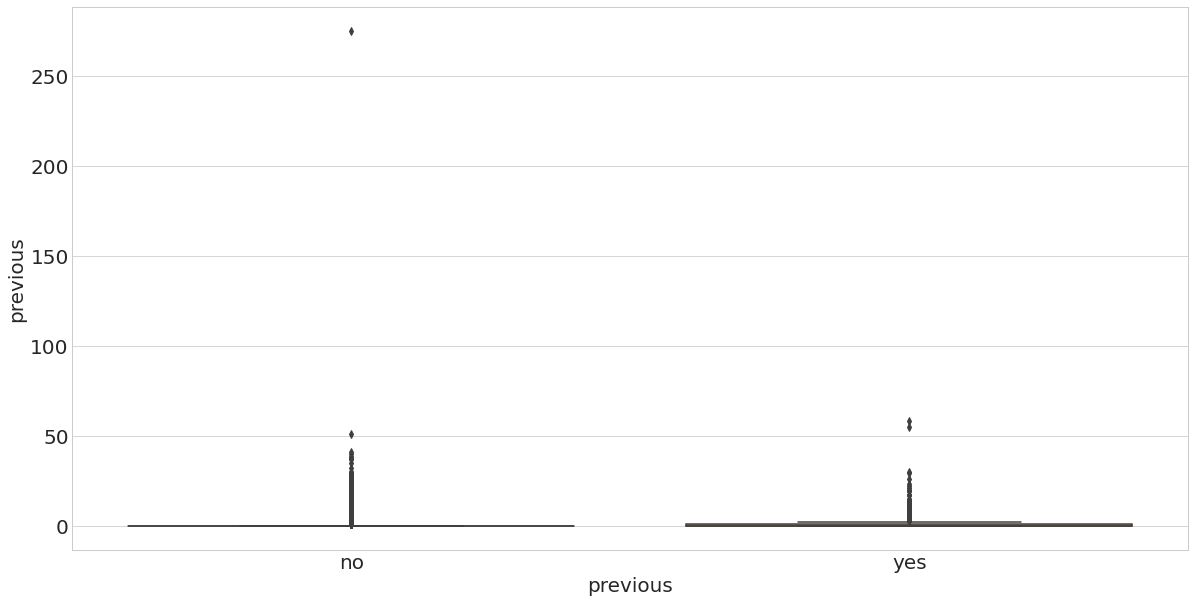

_______________________________________________________________________________________________________________________________


In [32]:
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

#### The Pairplot For Scatterness And Correlation

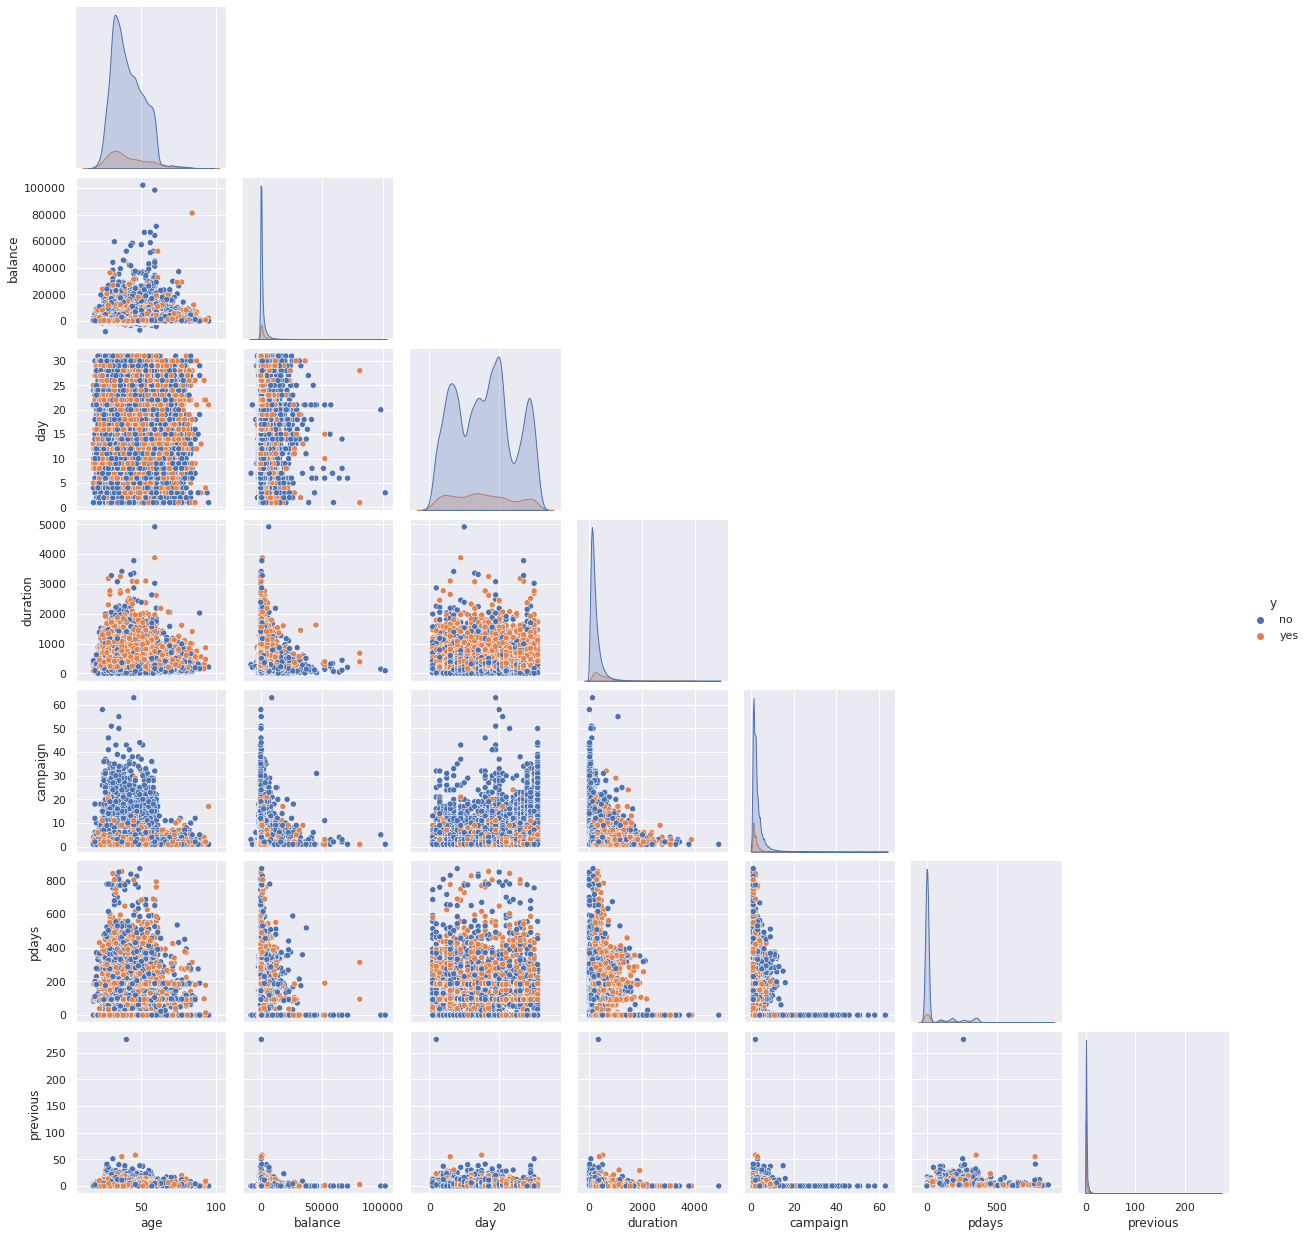

In [33]:
# PAIRPLOT for scatterness and correlation
sns.set(rc={'figure.figsize':(12,9)})
sns.pairplot(df,hue='y',corner=True)
plt.show()

# Data Pre-processing

## Remove null values and duplicates

In [34]:
# displays unique values in each columns
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


> __No feature with only one value.__

In [35]:
# find missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> __We do not have any missing values.__

In [36]:
# check for duplicate values 
df.duplicated().sum()

0

> __There are no dupicates in the dataset.__

## Correlation Analysis ( Heat Map )

<AxesSubplot:>

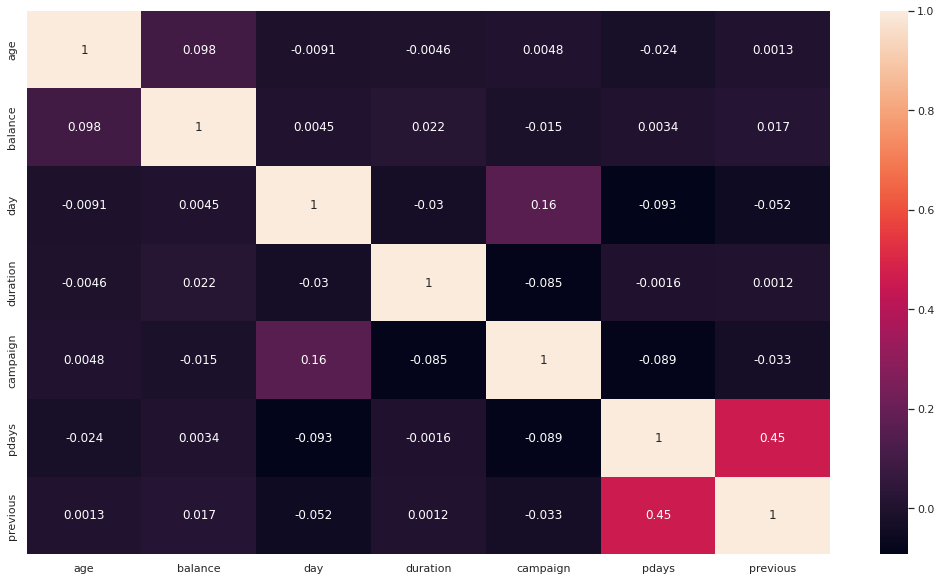

In [37]:
# Checking for correlation (Pearson's)
fig = plt.figure(figsize=(18,10))
corr_matt=df.corr()
sns.heatmap(corr_matt,annot=True)

> __There is no _high_ _correlation_ , hence we don't want to remove any attributes from the data .__

Positive correlation
- age : balance , campaign , previous
- balance : age , day , pdays , duration , previous
- day : balance , campaign 
- duration : previous , balance
- campaign : day , age
- pdays : previous , balance 
- previous : pdays , duration , balance , age

Negative correlation
- age : day , duration , pdays
- balance : campaign
- day :  pdays, previous , duration , age
- duration : pdays , campaign , age , day
- campaign : previous , pdays , duration , balance
- pdays :  campaign , duration , age , day
- previous : campaign , day

## Encoding

__Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.__



> __Ordinal Encoding__ : ```LABEL ENCODING```

> __Nominal Encoding__ : ```ONE HOT ENCODING```

__where , ```  Nominal  ``` : the data can only be categorized. ```  Ordinal  ``` : the data can be categorized and ranked.__

#### Label Encoding For Categorical Attributes

In [38]:
label_encoding = {
    "y":{"no":0,"yes":1},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "contact":{"unknown":0,"cellular":1,"telephone":2},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
    "default":{"no":0,"yes":1},
    "education":{"tertiary":0,"secondary":1,"unknown":2,"primary":3},
    "marital":{"married":0,"single":1,"divorced":2},   
    "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,"housemaid":10,"student":11}
}

In [39]:
df_encoded = df.replace(label_encoding)

In [40]:
df_encoded.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    0        0          0        0     2143        1     0        0   
1   44    1        1          1        0       29        1     0        0   
2   33    2        0          1        0        2        1     1        0   
3   47    3        0          2        0     1506        1     0        0   
4   33    4        1          2        0        1        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      4       261         1     -1         0         0  0  
1    5      4       151         1     -1         0         0  0  
2    5      4        76         1     -1         0         0  0  
3    5      4        92         1     -1         0         0  0  
4    5      4       198         1     -1         0         0  0

In [41]:
# Pearson's Correlation of features w.r.t target label

corr_matt1=df_encoded.corr()['y']
corr_matt1

age          0.025155
job          0.022396
marital      0.043846
education   -0.058675
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact      0.130590
day         -0.028348
month        0.018717
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome     0.259315
y            1.000000
Name: y, dtype: float64

## Normalization

#### MinMax Scaling for Numerical attributes

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [42]:
num_features=['age', 'balance', 'day', 'duration','campaign', 'pdays', 'previous']

scaler = MinMaxScaler(feature_range=(0, 1))

df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features]) 

In [43]:
df_normalized = df_encoded
df_normalized.head()

age  job  marital  education  default   balance  housing  loan  \
0  0.519481    0        0          0        0  0.092259        1     0   
1  0.337662    1        1          1        0  0.073067        1     0   
2  0.194805    2        0          1        0  0.072822        1     1   
3  0.376623    3        0          2        0  0.086476        1     0   
4  0.194805    4        1          2        0  0.072812        0     0   

   contact       day  month  duration  campaign  pdays  previous  poutcome  y  
0        0  0.133333      4  0.053070       0.0    0.0       0.0         0  0  
1        0  0.133333      4  0.030704       0.0    0.0       0.0         0  0  
2        0  0.133333      4  0.015453       0.0    0.0       0.0         0  0  
3        0  0.133333      4  0.018707       0.0    0.0       0.0         0  0  
4        0  0.133333      4  0.040260       0.0    0.0       0.0         0  0

## Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

#### Feature Selection For Numeric Features

In [44]:
num_features = np.array(df.select_dtypes(include='int64').columns)
num_k = 'all'

# ANOVA feature selection for numeric features
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
num_fs = SelectKBest(score_func=f_classif, k=num_k)

# apply feature selection
filtered_data = num_fs.fit_transform(df[num_features] , df['y'])
print(filtered_data.shape)

(45211, 7)


age : 28.625233
balance : 126.572276
day : 36.359010
duration : 8333.761148
campaign : 243.358404
pdays : 490.696563
previous : 396.443989


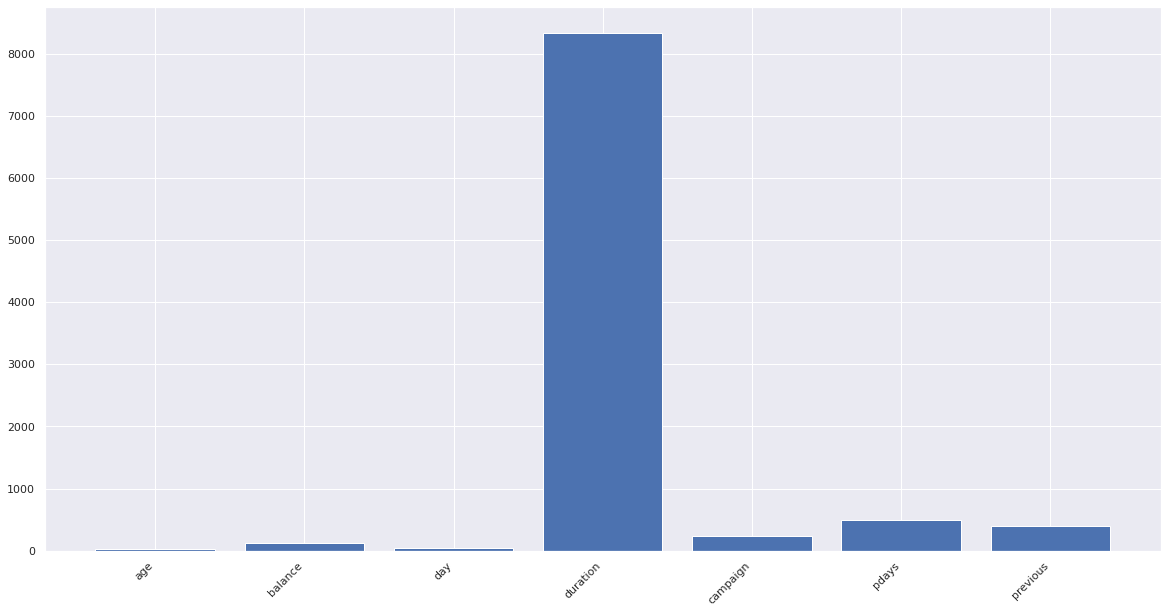

In [45]:
for i in range(len(num_fs.scores_)):
    print(num_features[i] + ' : %f' % ( num_fs.scores_[i]))
    
# plot the scores
fig = plt.subplots(figsize=(20, 10))
plt.rcParams.update({'font.size': 20})
plt.bar(num_features, num_fs.scores_)
plt.xticks(rotation=45, ha='right')
plt.show()

> __The "duration" attribute highly affects the output target.__

**Important note:** the "duration" attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Feature Selection For Categorical Features

In [46]:
cat_features = np.array(df.select_dtypes(include='object').columns)

# Chi-Squared Test feature selection for categorical 
from sklearn import feature_selection

cat_k = 'all'
if cat_features[-1] == 'y':
  cat_features = cat_features[0:-1]

cat_fs = SelectKBest(score_func=feature_selection.chi2, k=cat_k)
cat_fs.fit(df_encoded[cat_features], df_encoded['y'])
df_cat_fs = cat_fs.transform(df_encoded[cat_features])

job : 61.733938
marital : 81.314991
education : 139.191231
default : 22.313875
housing : 388.949715
loan : 176.516137
contact : 300.161142
month : 17.851622
poutcome : 5113.204667


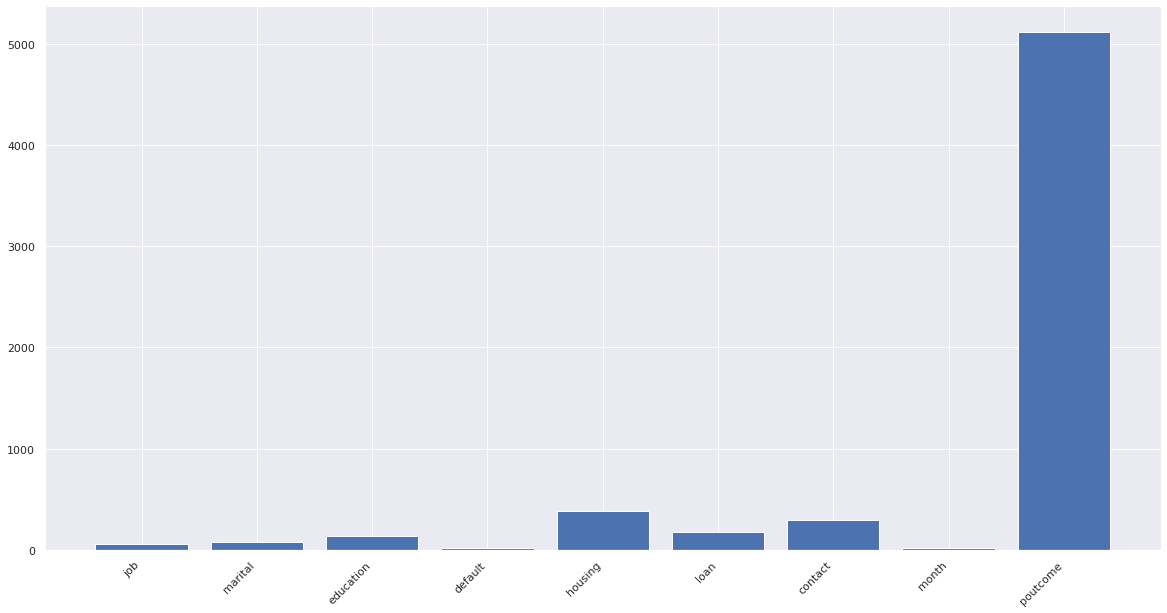

In [47]:
for i in range(len(cat_fs.scores_)):
    print(cat_features[i] + ' : %f' % ( cat_fs.scores_[i]))
    
# plot the scores
fig = plt.subplots(figsize=(20, 10))
plt.rcParams.update({'font.size': 20})
plt.bar(cat_features, cat_fs.scores_)
plt.xticks(rotation=45, ha='right')
plt.show()

> __The "poutcome" attribute highly affects the output target.__

## Preparing And Splitting The Data

In [48]:
df = df_normalized
df.head()

age  job  marital  education  default   balance  housing  loan  \
0  0.519481    0        0          0        0  0.092259        1     0   
1  0.337662    1        1          1        0  0.073067        1     0   
2  0.194805    2        0          1        0  0.072822        1     1   
3  0.376623    3        0          2        0  0.086476        1     0   
4  0.194805    4        1          2        0  0.072812        0     0   

   contact       day  month  duration  campaign  pdays  previous  poutcome  y  
0        0  0.133333      4  0.053070       0.0    0.0       0.0         0  0  
1        0  0.133333      4  0.030704       0.0    0.0       0.0         0  0  
2        0  0.133333      4  0.015453       0.0    0.0       0.0         0  0  
3        0  0.133333      4  0.018707       0.0    0.0       0.0         0  0  
4        0  0.133333      4  0.040260       0.0    0.0       0.0         0  0

In [49]:
# df.drop(["duration"], axis = 1, inplace = True) 
# df.head()

In [50]:
# df.info()

In [51]:
# feature_set = ['age', 'balance', 'day', 'duration',
#        'campaign', 'pdays', 'previous']
feature_set = ['age',	'job',	'marital',	'education',	'default',	'balance',	
               'housing',	'loan',	'contact',	'day',	'month',	'duration',	'campaign',	'pdays',	'previous',	'poutcome']

In [52]:
#SPLITTING THE DATA

# get all the features
features = [feat for feat in df.columns if feat !='y']

x = df[feature_set] # feature set
y = df['y'] # target

# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# train and test datasets dimensions
x_train.shape, x_test.shape

((36168, 16), (9043, 16))

## Oversampling

Over sampling is used when the amount of data collected is insufficient.
When one class of data is the underrepresented minority class in the data sample, over sampling techniques maybe used to duplicate these results for a more balanced amount of positive results in training.






In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7,random_state=42)
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({0: 27956, 1: 3691})
The number of Classes after fit Counter({0: 27956, 1: 27956})


# Model Building

In [54]:
Classifiers_list = []
Classifiers_var_list = []
Accuracy_list = []
Precision_list = []
Recall_list = []
Auc_list = []

#### Hyper parameter tuning

In [55]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn import svm,datasets
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier

# model_params = {
#     'GaussianNB': {
#         'model': GaussianNB(priors= None, var_smoothing = 1e-09), 
#         'params': {
            
#             } 
#     },
#     'random_forest' : {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10],
#             'penalty': ['l2' or 'none' or 'l1']
#         }
#     },
#     'KNeighbors_Classifier' : {
#         'model' : KNeighborsClassifier(),
#         'params' : {
#             'n_neighbors': np.arange(1, 25)
#         }
#     }
# }

# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(x_train_os, y_train_os)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# dff = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# dff

## Normal Models

### DescisionTree Classifier (RandomizedSearchCV)

In [56]:
# # Setup the parameters and distributions to sample from: param_dist
# # param_dist = {"max_depth": [None, 1,2,3,4,5,6,7,8,9,10],
# #               "max_features": randint(1, 10),
# #               "min_samples_leaf": randint(1, 10),
# #               "criterion": ["gini", "entropy"]}
# param_dist = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
#              "min_samples_leaf": [0.04, 0.06, 0.08],
#              "max_features": [0.2, 0.4,0.6, 0.8],
#              "criterion": ["gini", "entropy"]}
# # param_dist = {"max_depth": [10]}

# # Instantiate a Decision Tree classifier: dt
# dt = DecisionTreeClassifier(random_state = 40)

# # Instantiate the RandomizedSearchCV object: Randomized_dt
# Randomized_dt = RandomizedSearchCV(estimator = dt, param_distributions = param_dist, scoring = 'roc_auc' , n_iter = 140, cv = 20 , n_jobs = -1, random_state = 7)

# # Fit it to the data
# Randomized_dt.fit(x_train_os,y_train_os)

# # Print the tuned parameters and score
# print("Tuned Decision Tree Parameters: {}".format(Randomized_dt.best_params_))
# print("Best score is {}".format(Randomized_dt.best_score_))

# # # Report the test accuracy using these best parameters
# # print("Test accuracy of best grid search hypers:", Randomized_dt.score(x_val_fold,y_val_fold))

In [57]:
# # Create scorer
# mae_scorer = make_scorer(mean_absolute_error)

# # Compute cross-validated scores: cv_results 
# cv_results  = cross_val_score(estimator = Randomized_dt ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

# print(cv_results)

# # Print the mean and standard deviation
# print("The mean of the errors is: %s." % np.mean(cv_results ))
# print("The standard deviation of the errors is: %s." % np.std(cv_results ))

In [58]:
# # Extract the best model from Grid_dt
# Randomized_dt_best_model = Randomized_dt.best_estimator_

# # The final model could be fit on the aggregate of the training and validation datasets
# Randomized_dt_best_model.fit(x_train_os , y_train_os)

# # Predict the labels of the test set: y_pred
# y_pred_Randomized_dt = Randomized_dt_best_model.predict(x_test)

In [59]:
# # Generate the confusion matrix and classification report
# cm_Randomized_dt = confusion_matrix(y_test, y_pred_Randomized_dt)
# cr_Randomized_dt = classification_report(y_test, y_pred_Randomized_dt)

# print(cm_Randomized_dt)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Randomized_dt[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Randomized_dt[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Randomized_dt[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Randomized_dt[1, 1]))

# print(cr_Randomized_dt)

# # Print out count of binary predictions
# print(pd.Series(y_pred_Randomized_dt).value_counts())

In [60]:
# # Randomized_dt_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_Randomized_dt))
# print("Precision:",metrics.precision_score(y_test,y_pred_Randomized_dt))
# print("Recall:",metrics.recall_score(y_test, y_pred_Randomized_dt))

# Classifiers_var_list.append("Randomized_dt_best_model")
# Classifiers_list.append("Decision Trees(RandomizedSearchCV)")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_Randomized_dt))
# Precision_list.append(metrics.precision_score(y_test,y_pred_Randomized_dt))
# Recall_list.append(metrics.recall_score(y_test, y_pred_Randomized_dt))

In [61]:
# # Compute predicted probabilities: y_pred_prob
# y_pred_prob_Randomized_dt = Randomized_dt_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Randomized_dt)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_Randomized_dt[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Randomized_dt[0:10]))

In [62]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_Randomized_dt)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_Randomized_dt))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = Randomized_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

In [63]:
# features_array_df = pd.DataFrame(data = features_array)
# feature_cols = features_array_df.columns.to_list()

# dot_data = StringIO()
# export_graphviz(Randomized_dt_best_model, out_file = dot_data, rounded = True, filled = True, special_characters = True, feature_names = feature_cols, class_names = ["0","1"])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png("coronavirus_dataframe DT.png")
# Image(graph.create_png())

### DescisionTree Classifier (GridSearchCV)

In [64]:
# # Instantiate a Decision Tree classifier: dt
# dt = DecisionTreeClassifier(random_state = 40)

# # Print Decision Trees hyperparameters
# print(dt.get_params())

In [65]:
# # Setup the parameters and distributions to sample from: params_dt
# # params_dt = {"max_depth": [None, 1,2,3,4,5,6,7,8,9,10],
# #               "max_features": [1,2,3,4,5,6,7,8,9,10],
# #               "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
# #               "criterion": ["gini", "entropy"]}
# params_dt = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
#              "min_samples_leaf": [0.04, 0.06, 0.08],
#              "max_features": [0.2, 0.4,0.6, 0.8],
#              "criterion": ["gini", "entropy"]}
# # params_dt = {"max_depth": [10]}

# # Instantiate the GridSearchCV object: Grid_dt
# Grid_dt = GridSearchCV(estimator = dt , param_grid = params_dt , scoring = 'roc_auc' , cv = 20 , n_jobs = -1)

# # Fit it to the training data
# Grid_dt.fit(x_train_os,y_train_os)

# # Print the optimal parameters and best score
# print("Tuned Decision Tree Parameter: {}".format(Grid_dt.best_params_))
# print("Tuned Decision Tree Accuracy: {}".format(Grid_dt.best_score_))

# # # Report the test accuracy using these best parameters
# # print("Test accuracy of best grid search hypers:", Grid_dt.score(x_val_fold,y_val_fold))

In [66]:
# # Create scorer
# mae_scorer = make_scorer(mean_absolute_error)

# # Compute cross-validated scores: cv_results 
# cv_results  = cross_val_score(estimator = Grid_dt ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

# print(cv_results)

# # Print the mean and standard deviation
# print("The mean of the errors is: %s." % np.mean(cv_results ))
# print("The standard deviation of the errors is: %s." % np.std(cv_results ))

In [67]:
# # Extract the best model from Grid_dt
# Grid_dt_best_model = Grid_dt.best_estimator_

# # The final model could be fit on the aggregate of the training and validation datasets
# Grid_dt_best_model.fit(x_train_os , y_train_os)

# # Predict the labels of the test data: y_pred_Grid_knn
# y_pred_Grid_dt = Grid_dt_best_model.predict(x_test)

In [68]:
# # Generate the confusion matrix and classification report
# cm_Grid_dt = confusion_matrix(y_test, y_pred_Grid_dt)
# cr_Grid_dt = classification_report(y_test, y_pred_Grid_dt)

# print(cm_Grid_dt)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_dt[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_dt[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_dt[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_dt[1, 1]))

# print(cr_Grid_dt)

# # Print out count of binary predictions
# print(pd.Series(y_pred_Grid_dt).value_counts())

In [69]:
# # Grid_dt_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_Grid_dt))
# print("Precision:",metrics.precision_score(y_test,y_pred_Grid_dt))
# print("Recall:",metrics.recall_score(y_test, y_pred_Grid_dt))

# Classifiers_var_list.append("Grid_dt_best_model")
# Classifiers_list.append("Decision Trees(GridSearchCV)")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_Grid_dt))
# Precision_list.append(metrics.precision_score(y_test,y_pred_Grid_dt))
# Recall_list.append(metrics.recall_score(y_test, y_pred_Grid_dt))

In [70]:
# # Compute predicted probabilities: y_pred_prob_Grid_dt
# y_pred_prob_Grid_dt = Grid_dt_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Grid_dt)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_Grid_dt[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_dt[0:10]))

In [71]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_Grid_dt)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_Grid_dt))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = Grid_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

In [72]:
# features_array_df = pd.DataFrame(data = features_array)
# feature_cols = features_array_df.columns.to_list()

# dot_data = StringIO()
# export_graphviz(Grid_dt_best_model, out_file = dot_data, rounded = True, filled = True, special_characters = True, feature_names = feature_cols, class_names = ["0","1"])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png("coronavirus_dataframe DT.png")
# Image(graph.create_png())

### Logistic Regression

In [73]:
# # Instantiate the logistic regression classifier: logreg
# logreg = LogisticRegression(max_iter = 3000)

# # Print logistic regression hyperparameters
# print(logreg.get_params())

In [74]:
# # Create the hyperparameter grid
# c_space = np.logspace(-5, 8, 15)
# param_logreg = {'C': c_space, 'penalty': ['l2' or 'none' or 'l1'], 'solver': ['liblinear','lbfgs']}
# # param_logreg = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2' or 'none' or 'l1'],'solver': ['liblinear','lbfgs']}

# # Instantiate the GridSearchCV object: Grid_logreg
# Grid_logreg = GridSearchCV(estimator = logreg , param_grid = param_logreg, scoring='roc_auc', cv = 10, n_jobs = -1)

# # Fit it to the training data
# Grid_logreg.fit(x_train_os,y_train_os)

# # Print the optimal parameters and best score
# print("Tuned Logistic Regression Parameter: {}".format(Grid_logreg.best_params_))
# print("Tuned Logistic Regression Accuracy: {}".format(Grid_logreg.best_score_))

# # # Report the test accuracy using these best parameters
# # print("Test accuracy of best grid search hypers:", Grid_logreg.score(x_val_fold,y_val_fold))

In [75]:
# # Create scorer
# mae_scorer = make_scorer(mean_absolute_error)

# # Compute cross-validated scores: cv_results 
# cv_results  = cross_val_score(estimator = Grid_logreg ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

# print(cv_results)

# # Print the mean and standard deviation
# print("The mean of the errors is: %s." % np.mean(cv_results ))
# print("The standard deviation of the errors is: %s." % np.std(cv_results ))

In [76]:
# # Extract the best model from Grid_knn
# Grid_logreg_best_model = Grid_logreg.best_estimator_

# # The final model could be fit on the aggregate of the training and validation datasets
# Grid_logreg_best_model.fit(x_train_os , y_train_os)

# # Predict the labels of the test set: y_pred_Grid_logreg
# y_pred_Grid_logreg = Grid_logreg_best_model.predict(x_test)

In [77]:
# # Generate the confusion matrix and classification report
# cm_Grid_logreg = confusion_matrix(y_test, y_pred_Grid_logreg)
# cr_Grid_logreg = classification_report(y_test, y_pred_Grid_logreg)

# print(cm_Grid_logreg)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_logreg[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_logreg[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_logreg[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_logreg[1, 1]))

# print(cr_Grid_logreg)

# # Print out count of binary predictions
# print(pd.Series(y_pred_Grid_logreg).value_counts())

In [78]:
# # Grid_logreg_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_Grid_logreg))
# print("Precision:",metrics.precision_score(y_test,y_pred_Grid_logreg))
# print("Recall:",metrics.recall_score(y_test, y_pred_Grid_logreg))

# Classifiers_var_list.append("Grid_logreg_best_model")
# Classifiers_list.append("Logistic Regression(GridSearchCV)")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_Grid_logreg))
# Precision_list.append(metrics.precision_score(y_test,y_pred_Grid_logreg))
# Recall_list.append(metrics.recall_score(y_test, y_pred_Grid_logreg))

In [79]:
# # Compute predicted probabilities: y_pred_prob
# y_pred_prob_Grid_logreg = Grid_logreg_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Grid_logreg)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_Grid_logreg[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_logreg[0:10]))

In [80]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_Grid_logreg)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_Grid_logreg))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = Grid_logreg_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### KNeighborsClassifier

In [81]:
# # Setup arrays to store train and test accuracies
# neighbors = np.arange(1, 10)
# train_accuracy = np.empty(len(neighbors))
# testing_accuracy = np.empty(len(neighbors))   
    
# # Loop over different values of k
# for i, k in enumerate(neighbors):
#     # Setup a k-NN Classifier with k neighbors: knn
#     knn_test = KNeighborsClassifier(n_neighbors = k)

#     # Fit the classifier to the training data
#     knn_test.fit(x_train_os,y_train_os)
    
#     #Compute accuracy on the training set
#     train_accuracy[i] = knn_test.score(x_train_os, y_train_os)

#     #Compute accuracy on the testing set
#     testing_accuracy[i] = knn_test.score(x_test,y_test)

# # Generate plot
# plt.title('k-NN: Varying Number of Neighbors')
# plt.plot(neighbors, testing_accuracy, label = 'Testing Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
# plt.legend()
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Accuracy')
# plt.show()

In [82]:
# # Instantiate a k-NN classifier: knn
# knn = KNeighborsClassifier()

# # Print KNeighborsClassifier hyperparameters
# print(knn.get_params())

In [83]:
# # Create the hyperparameter grid
# param_Knn = {'n_neighbors': np.arange(1, 15)}

# # Instantiate the GridSearchCV object: Grid_knn
# Grid_knn = GridSearchCV(estimator = knn, param_grid = param_Knn, scoring='roc_auc', cv = 20, n_jobs = -1)

# # Fit it to the training data
# Grid_knn.fit(x_train_os, y_train_os)

# # Print the optimal parameters and best score
# print("Tuned K-Nearest Neighbors Parameter: {}".format(Grid_knn.best_params_))
# print("Tuned K-Nearest Neighbors Accuracy: {}".format(Grid_knn.best_score_))

# # # Report the test accuracy using these best parameters
# # print("Test accuracy of best grid search hypers:", Grid_knn.score(x_val_fold,y_val_fold))

In [84]:
# # Create scorer
# mae_scorer = make_scorer(mean_absolute_error)

# # Compute cross-validated scores: cv_results 
# cv_results  = cross_val_score(estimator = Grid_knn ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

# print(cv_results)

# # Print the mean and standard deviation
# print("The mean of the errors is: %s." % np.mean(cv_results ))
# print("The standard deviation of the errors is: %s." % np.std(cv_results ))

In [85]:
# # Extract the best model from Grid_knn
# Grid_knn_best_model = Grid_knn.best_estimator_

# # The final model could be fit on the aggregate of the training and validation datasets
# Grid_knn_best_model.fit(x_train_os , y_train_os)

# # Predict the labels of the test data: y_pred_Grid_knn
# y_pred_Grid_knn = Grid_knn_best_model.predict(x_test)

In [86]:
# # Generate the confusion matrix and classification report
# cm_Grid_knn = confusion_matrix(y_test, y_pred_Grid_knn)
# cr_Grid_knn = classification_report(y_test, y_pred_Grid_knn)

# print(cm_Grid_knn)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_knn[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_knn[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_knn[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_knn[1, 1]))

# print(cr_Grid_knn)

# # Print out count of binary predictions
# print(pd.Series(y_pred_Grid_knn).value_counts())

In [87]:
# # Grid_knn_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_Grid_knn))
# print("Precision:",metrics.precision_score(y_test,y_pred_Grid_knn))
# print("Recall:",metrics.recall_score(y_test, y_pred_Grid_knn))

# Classifiers_var_list.append("Grid_knn_best_model")
# Classifiers_list.append("K-Nearest Neighbors(GridSearchCV)")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_Grid_knn))
# Precision_list.append(metrics.precision_score(y_test,y_pred_Grid_knn))
# Recall_list.append(metrics.recall_score(y_test, y_pred_Grid_knn))

In [88]:
# # Compute predicted probabilities: y_pred_prob_Grid_knn
# y_pred_prob_Grid_knn = Grid_knn_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Grid_knn)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_Grid_knn[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_knn[0:10]))

In [89]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_Grid_knn)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_Grid_knn))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = Grid_knn_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Naive Bayes

In [90]:
# # Create the classifier: gnb
# gnb = GaussianNB()

# # Print Gaussian Naive Bayes hyperparameters
# print(gnb.get_params())

In [91]:
# # Create the hyperparameter grid
# params_gnb = {'var_smoothing': np.logspace(-12,-1, num=100)}

# # Instantiate the GridSearchCV object: Grid_logreg
# Grid_gnb = GridSearchCV(estimator = gnb , param_grid = params_gnb, scoring='roc_auc', cv = 20, n_jobs = -1)

# # Fit it to the training data
# Grid_gnb.fit(x_train_os,y_train_os)

# # Print the optimal parameters and best score
# print("Tuned Gaussian Naive Bayes Parameter: {}".format(Grid_gnb.best_params_))
# print("Tuned Gaussian Naive Bayes Accuracy: {}".format(Grid_gnb.best_score_))

# # # Report the test accuracy using these best parameters
# # print("Test accuracy of best grid search hypers:", Grid_gnb.score(x_val_fold_v2,y_val_fold_v2))

In [92]:
# # Create scorer
# mae_scorer = make_scorer(mean_absolute_error)

# # Compute cross-validated scores: cv_results 
# cv_results  = cross_val_score(estimator = Grid_gnb ,X = x_val_fold_v2, y = y_val_fold_v2, cv = 21, scoring = mae_scorer)

# print(cv_results)

# # Print the mean and standard deviation
# print("The mean of the errors is: %s." % np.mean(cv_results))
# print("The standard deviation of the errors is: %s." % np.std(cv_results))

In [93]:
# # Extract the best model from Grid_knn
# Grid_gnb_best_model = Grid_gnb.best_estimator_

# # The final model could be fit on the aggregate of the training and validation datasets
# Grid_gnb_best_model.fit(x_train_os , y_train_os)

# # Predict the labels of the test set: y_pred_Grid_logreg
# y_pred_Grid_gnb = Grid_gnb_best_model.predict(x_test)

In [94]:
# # Generate the confusion matrix and classification report
# cm_Grid_gnb = confusion_matrix(y_test, y_pred_Grid_gnb)

# # Decide that you are not interested in the scores of labels that were not predicted, and then explicitly specify the labels you are interested in (which are labels that were predicted at least once)
# cr_Grid_gnb = classification_report(y_test, y_pred_Grid_gnb, labels = np.unique(y_pred_Grid_gnb))

# print(cm_Grid_gnb)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_gnb[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_gnb[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_gnb[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_gnb[1, 1]))

# print(cr_Grid_gnb)

# # some labels in y_test_fold don't appear in y_pred_Grid_gnb. Specifically in this case, label '1' is never predicted
# # This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0. Since you requested an average of the score, you must take into account that a score of 0 was included in the calculation
# print(set(y_test) - set(y_pred_Grid_gnb))

# # Print out count of binary predictions
# print(pd.Series(y_pred_Grid_gnb).value_counts())

In [95]:
# # Grid_gnb_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_Grid_gnb))
# print("Precision:",metrics.precision_score(y_test,y_pred_Grid_gnb))
# print("Recall:",metrics.recall_score(y_test, y_pred_Grid_gnb))

# Classifiers_var_list.append("Grid_gnb_best_model")
# Classifiers_list.append("Gaussian Naïve Bayes(GridSearchCV)")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_Grid_gnb))
# Precision_list.append(metrics.precision_score(y_test,y_pred_Grid_gnb))
# Recall_list.append(metrics.recall_score(y_test, y_pred_Grid_gnb))

In [96]:
# # Compute predicted probabilities: y_pred_prob
# y_pred_prob_Grid_gnb = Grid_gnb_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Grid_gnb)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_Grid_gnb[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_gnb[0:10]))

In [97]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_Grid_gnb)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_Grid_gnb))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = Grid_gnb_best_model ,X = features_array_v2, y = target_array_v2, cv = 108, scoring = 'roc_auc')

# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Non-Linear SVC (Support Vector Machines)

In [98]:
# # Instantiate an RBF SVM
# NonLinear_svm = SVC(probability=True)

# # Print NonLinear SVC hyperparameters
# print(NonLinear_svm.get_params())

In [99]:
# # Create the hyperparameter grid
# # param_NonLinear_svm = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
# # param_NonLinear_svm = {'C':[0.1, 1, 10], 'gamma':[0.001, 0.01, 0.1]}
# param_NonLinear_svm = {'C':[10], 'gamma':[0.1]}

# # # Instantiate the GridSearchCV object: Grid_NonLinear_svm
# # Grid_NonLinear_svm = GridSearchCV(estimator = NonLinear_svm , param_grid = param_NonLinear_svm, scoring='roc_auc', cv = 20, n_jobs = -1)

# Grid_NonLinear_svm = SVC(kernel ='rbf',probability=True)

# # Fit it to the training data
# Grid_NonLinear_svm.fit(x_train_os,y_train_os)

# # # Print the optimal parameters and best score
# # print("Tuned Non-Linear SVC Parameter: {}".format(Grid_NonLinear_svm.best_params_))
# # print("Tuned Non-Linear SVC Accuracy: {}".format(Grid_NonLinear_svm.best_score_))

# # # Report the test accuracy using these best parameters
# # print("Test accuracy of best grid search hypers:", Grid_NonLinear_svm.score(x_val_fold,y_val_fold))

In [100]:
# # Create scorer
# mae_scorer = make_scorer(mean_absolute_error)

# # Compute cross-validated scores: cv_results 
# cv_results  = cross_val_score(estimator = Grid_NonLinear_svm ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

# print(cv_results)

# # Print the mean and standard deviation
# print("The mean of the errors is: %s." % np.mean(cv_results ))
# print("The standard deviation of the errors is: %s." % np.std(cv_results ))

In [101]:
# # # Extract the best model from Grid_NonLinear_svm
# # Grid_NonLinear_svm_best_model = Grid_NonLinear_svm.best_estimator_

# Grid_NonLinear_svm_best_model = Grid_NonLinear_svm

# # # The final model could be fit on the aggregate of the training and validation datasets
# # Grid_NonLinear_svm_best_model.fit(x_train_os , y_train_os)

# # Predict the labels of the test set: y_pred_Grid_NonLinear_svm
# y_pred_Grid_NonLinear_svm = Grid_NonLinear_svm_best_model.predict(x_test)

In [102]:
# # Generate the confusion matrix and classification report
# cm_Grid_NonLinear_svm = confusion_matrix(y_test, y_pred_Grid_NonLinear_svm)
# cr_Grid_NonLinear_svm = classification_report(y_test, y_pred_Grid_NonLinear_svm)

# print(cm_Grid_NonLinear_svm)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_NonLinear_svm[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_NonLinear_svm[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_NonLinear_svm[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_NonLinear_svm[1, 1]))

# print(cr_Grid_NonLinear_svm)

# # Print out count of binary predictions
# print(pd.Series(y_pred_Grid_NonLinear_svm).value_counts())

In [103]:
# Grid_NonLinear_svm_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_Grid_NonLinear_svm))
# print("Precision:",metrics.precision_score(y_test,y_pred_Grid_NonLinear_svm))
# print("Recall:",metrics.recall_score(y_test, y_pred_Grid_NonLinear_svm))

In [104]:
# # Compute predicted probabilities: y_pred_prob
# y_pred_prob_Grid_NonLinear_svm = Grid_NonLinear_svm_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Grid_NonLinear_svm)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_Grid_NonLinear_svm[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_NonLinear_svm[0:10]))

In [105]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_Grid_NonLinear_svm)))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = Grid_NonLinear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Linear SVC (Support Vector Machines)

In [106]:
# # Instantiate an RBF SVM
# Linear_svm = SVC(kernel="linear",probability=True)

# # Print Linear SVC hyperparameters
# print(Linear_svm.get_params())

In [107]:
# # Create the hyperparameter grid
# param_Linear_svm = {'C':[0.1, 1, 10]}

# # # Instantiate the GridSearchCV object: Grid_Linear_svm
# # Grid_Linear_svm = GridSearchCV(estimator = Linear_svm , param_grid = param_Linear_svm, scoring='roc_auc', cv = 10, n_jobs = -1)

# Grid_Linear_svm =  SVC(kernel ='linear', C = 1,probability=True)

# # Fit it to the training data
# Grid_Linear_svm.fit(x_train_os,y_train_os)

# # # Print the optimal parameters and best score
# # print("Tuned Linear SVC Parameter: {}".format(Grid_Linear_svm.best_params_))
# # print("Tuned Linear SVC Accuracy: {}".format(Grid_Linear_svm.best_score_))

# # # Report the test accuracy using these best parameters
# # print("Test accuracy of best grid search hypers:", Grid_Linear_svm.score(x_val_fold,y_val_fold))

In [108]:
# # Create scorer
# mae_scorer = make_scorer(mean_absolute_error)

# # Compute cross-validated scores: cv_results 
# cv_results  = cross_val_score(estimator = Grid_Linear_svm ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

# print(cv_results)

# # Print the mean and standard deviation
# print("The mean of the errors is: %s." % np.mean(cv_results ))
# print("The standard deviation of the errors is: %s." % np.std(cv_results ))

In [109]:
# # # Extract the best model from Grid_Linear_svm
# # Grid_Linear_svm_best_model = Grid_Linear_svm.best_estimator_

# Grid_Linear_svm_best_model = Grid_Linear_svm

# # The final model could be fit on the aggregate of the training and validation datasets
# Grid_Linear_svm_best_model.fit(x_train_os , y_train_os)

# # Predict the labels of the test set: y_pred_Grid_NonLinear_svm
# y_pred_Grid_Linear_svm = Grid_Linear_svm_best_model.predict(x_test)

In [110]:
# # Generate the confusion matrix and classification report
# cm_Grid_Linear_svm = confusion_matrix(y_test, y_pred_Grid_Linear_svm)
# cr_Grid_Linear_svm = classification_report(y_test, y_pred_Grid_Linear_svm)

# print(cm_Grid_Linear_svm)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_Linear_svm[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_Linear_svm[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_Linear_svm[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_Linear_svm[1, 1]))

# print(cr_Grid_Linear_svm)

# # Print out count of binary predictions
# print(pd.Series(y_pred_Grid_Linear_svm).value_counts())

In [111]:
# Grid_Linear_svm_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_Grid_Linear_svm))
# print("Precision:",metrics.precision_score(y_test,y_pred_Grid_Linear_svm))
# print("Recall:",metrics.recall_score(y_test, y_pred_Grid_Linear_svm))

In [112]:
# # Compute predicted probabilities: y_pred_prob
# y_pred_prob_Grid_Linear_svm = Grid_Linear_svm_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Grid_Linear_svm)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_Grid_Linear_svm[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_Linear_svm[0:10]))

In [113]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_Grid_Linear_svm)))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = Grid_Linear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

## Bootstrap aggregation or Bagging using out of bag evaluation

### K-Nearest Neighbors(GridSearchCV)

In [114]:
# # Instantiate bag_Grid_knn_best_model
# bag_Grid_knn_best_model = BaggingClassifier(base_estimator = Grid_knn_best_model, n_estimators = 50,oob_score=True,random_state=17, max_samples=1.0, max_features=1.0)

# # Fit bag_Grid_knn_best_model to the training set 
# bag_Grid_knn_best_model.fit(x_train_os, y_train_os)

# # Predict test set labels
# y_pred_bag_Grid_knn_best_model = bag_Grid_knn_best_model.predict(x_test)

# # Evaluate test set accuracy
# acc_test = accuracy_score(y_test, y_pred_bag_Grid_knn_best_model)

# # Evaluate OOB accuracy
# acc_oob = bag_Grid_knn_best_model.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [115]:
# # Generate the confusion matrix and classification report
# cm_bag_Grid_knn_best_model = confusion_matrix(y_test, y_pred_bag_Grid_knn_best_model)
# cr_bag_Grid_knn_best_model = classification_report(y_test, y_pred_bag_Grid_knn_best_model)

# print(cm_bag_Grid_knn_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_knn_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_knn_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_knn_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_knn_best_model[1, 1]))

# print(cr_bag_Grid_knn_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_bag_Grid_knn_best_model).value_counts())

In [116]:
# # bag_Grid_knn_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_bag_Grid_knn_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_bag_Grid_knn_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_bag_Grid_knn_best_model))

# Classifiers_var_list.append("bag_Grid_knn_best_model")
# Classifiers_list.append("K-Nearest Neighbors(GridSearchCV)_bagging")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_bag_Grid_knn_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_bag_Grid_knn_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_bag_Grid_knn_best_model))

In [117]:
# # Compute predicted probabilities: y_pred_prob_Grid_knn
# y_pred_prob_bag_Grid_knn_best_model = bag_Grid_knn_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_bag_Grid_knn_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_knn_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_knn_best_model[0:10]))

In [118]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_bag_Grid_knn_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_bag_Grid_knn_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_knn_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Logistic Regression(GridSearchCV)

In [119]:
# # Instantiate bc_Grid_logreg_best_model
# bag_Grid_logreg_best_model = BaggingClassifier(base_estimator = Grid_logreg_best_model, n_estimators = 150,oob_score=True,random_state=17, max_samples=1.0, max_features=0.90)

# # Fit bc to the training set 
# bag_Grid_logreg_best_model.fit(x_train_os, y_train_os)

# # Predict test set labels
# y_pred_bag_Grid_logreg_best_model = bag_Grid_logreg_best_model.predict(x_test)

# # Evaluate test set accuracy
# acc_test = accuracy_score(y_test, y_pred_bag_Grid_logreg_best_model)

# # Evaluate OOB accuracy
# acc_oob = bag_Grid_logreg_best_model.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [120]:
# # Generate the confusion matrix and classification report
# cm_bag_Grid_logreg_best_model = confusion_matrix(y_test, y_pred_bag_Grid_logreg_best_model)
# cr_bag_Grid_logreg_best_model = classification_report(y_test, y_pred_bag_Grid_logreg_best_model)

# print(cm_bag_Grid_logreg_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_logreg_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_logreg_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_logreg_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_logreg_best_model[1, 1]))

# print(cr_bag_Grid_logreg_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_bag_Grid_logreg_best_model).value_counts())

In [121]:
# # bag_Grid_logreg_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_bag_Grid_logreg_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_bag_Grid_logreg_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_bag_Grid_logreg_best_model))

# Classifiers_var_list.append("bag_Grid_logreg_best_model")
# Classifiers_list.append("Logistic Regression(GridSearchCV)_bagging")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_bag_Grid_logreg_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_bag_Grid_logreg_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_bag_Grid_logreg_best_model))

In [122]:
# # Compute predicted probabilities: y_pred_prob_bag_Grid_logreg_best_model
# y_pred_prob_bag_Grid_logreg_best_model = bag_Grid_logreg_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_bag_Grid_logreg_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_logreg_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_logreg_best_model[0:10]))

In [123]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_bag_Grid_logreg_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_bag_Grid_logreg_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_logreg_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Decision Trees(RandomizedSearchCV)

In [124]:
# # Instantiate bc_Randomized_dt_best_model
# bag_Randomized_dt_best_model = BaggingClassifier(base_estimator = Randomized_dt_best_model, n_estimators = 500,oob_score=True,random_state=69, max_samples=1.0, max_features=1.0)

# # Fit bc to the training set 
# bag_Randomized_dt_best_model.fit(x_train_os, y_train_os)

# # Predict test set labels
# y_pred_bag_Randomized_dt_best_model = bag_Randomized_dt_best_model.predict(x_test)

# # Evaluate test set accuracy
# acc_test = accuracy_score(y_test, y_pred_bag_Randomized_dt_best_model)

# # Evaluate OOB accuracy
# acc_oob = bag_Randomized_dt_best_model.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [125]:
# # Generate the confusion matrix and classification report
# cm_bag_Randomized_dt_best_model = confusion_matrix(y_test, y_pred_bag_Randomized_dt_best_model)
# cr_bag_Randomized_dt_best_model = classification_report(y_test, y_pred_bag_Randomized_dt_best_model)

# print(cm_bag_Randomized_dt_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Randomized_dt_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Randomized_dt_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Randomized_dt_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Randomized_dt_best_model[1, 1]))

# print(cr_bag_Randomized_dt_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_bag_Randomized_dt_best_model).value_counts())

In [126]:
# # bag_Randomized_dt_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_bag_Randomized_dt_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_bag_Randomized_dt_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_bag_Randomized_dt_best_model))

# Classifiers_var_list.append("bag_Randomized_dt_best_model")
# Classifiers_list.append("Decision Trees(RandomizedSearchCV)_bagging")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_bag_Randomized_dt_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_bag_Randomized_dt_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_bag_Randomized_dt_best_model))

In [127]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_bag_Randomized_dt_best_model = bag_Randomized_dt_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_bag_Randomized_dt_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # Print the first 10 values from predictions
# print('The first 10 predicted values are: {}'.format(y_pred_bag_Randomized_dt_best_model[0:10]))

# # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Randomized_dt_best_model[0:10]))

In [128]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_bag_Randomized_dt_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_bag_Randomized_dt_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Randomized_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Decision Trees(GridSearchCV)

In [129]:
# # Instantiate bc_Grid_dt_best_model
# bag_Grid_dt_best_model = BaggingClassifier(base_estimator = Grid_dt_best_model, n_estimators = 500,oob_score=True,random_state=69,max_samples=1.0, max_features=1.0)

# # Fit bc to the training set 
# bag_Grid_dt_best_model.fit(x_train_os, y_train_os)

# # Predict test set labels
# y_pred_bag_Grid_dt_best_model = bag_Grid_dt_best_model.predict(x_test)

# # Evaluate test set accuracy
# acc_test = accuracy_score(y_test, y_pred_bag_Grid_dt_best_model)

# # Evaluate OOB accuracy
# acc_oob = bag_Grid_dt_best_model.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [130]:
# # Generate the confusion matrix and classification report
# cm_bag_Grid_dt_best_model = confusion_matrix(y_test, y_pred_bag_Grid_dt_best_model)
# cr_bag_Grid_dt_best_model = classification_report(y_test, y_pred_bag_Grid_dt_best_model)

# print(cm_bag_Grid_dt_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_dt_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_dt_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_dt_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_dt_best_model[1, 1]))

# print(cr_bag_Grid_dt_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_bag_Grid_dt_best_model).value_counts())

In [131]:
# # bag_Grid_dt_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_bag_Grid_dt_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_bag_Grid_dt_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_bag_Grid_dt_best_model))

# Classifiers_var_list.append("bag_Grid_dt_best_model")
# Classifiers_list.append("Decision Trees(GridSearchCV)_bagging")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_bag_Grid_dt_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_bag_Grid_dt_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_bag_Grid_dt_best_model))

In [132]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_bag_Grid_dt_best_model = bag_Grid_dt_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_bag_Grid_dt_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # Print the first 10 values from predictions
# print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_dt_best_model[0:10]))

# # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_dt_best_model[0:10]))

In [133]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_bag_Grid_dt_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_bag_Grid_dt_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Non-linear Support Vector Machines(GridSearchCV)

In [134]:
# # Instantiate bc_Grid_NonLinear_svm_best_model
# bag_Grid_NonLinear_svm_best_model = BaggingClassifier(base_estimator = Grid_NonLinear_svm_best_model, n_estimators = 100,oob_score=True,random_state=69,max_samples=1.0, max_features=0.90)

# # Fit bc to the training set 
# bag_Grid_NonLinear_svm_best_model.fit(x_train_os, y_train_os)

# # Predict test set labels
# y_pred_bag_Grid_NonLinear_svm_best_model = bag_Grid_NonLinear_svm_best_model.predict(x_test)

# # Evaluate test set accuracy
# acc_test = accuracy_score(y_test, y_pred_bag_Grid_NonLinear_svm_best_model)

# # Evaluate OOB accuracy
# acc_oob = bag_Grid_NonLinear_svm_best_model.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [135]:
# # Generate the confusion matrix and classification report
# cm_bag_Grid_NonLinear_svm_best_model = confusion_matrix(y_test, y_pred_bag_Grid_NonLinear_svm_best_model)
# cr_bag_Grid_NonLinear_svm_best_model = classification_report(y_test, y_pred_bag_Grid_NonLinear_svm_best_model)

# print(cm_bag_Grid_NonLinear_svm_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_NonLinear_svm_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_NonLinear_svm_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_NonLinear_svm_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_NonLinear_svm_best_model[1, 1]))

# print(cr_bag_Grid_NonLinear_svm_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_bag_Grid_NonLinear_svm_best_model).value_counts())

In [136]:
# bag_Grid_NonLinear_svm_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_bag_Grid_NonLinear_svm_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_bag_Grid_NonLinear_svm_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_bag_Grid_NonLinear_svm_best_model))

In [137]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_bag_Grid_NonLinear_svm_best_model = bag_Grid_NonLinear_svm_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_bag_Grid_NonLinear_svm_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_NonLinear_svm_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_NonLinear_svm_best_model[0:10]))

In [138]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_bag_Grid_NonLinear_svm_best_model)))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_NonLinear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Linear Support Vector Machines(GridSearchCV)

In [139]:
# # Instantiate bc_Grid_Linear_svm_best_model
# bag_Grid_Linear_svm_best_model = BaggingClassifier(base_estimator = Grid_Linear_svm_best_model, n_estimators = 100,oob_score=True,random_state=17,max_samples=1.0, max_features=1.0)

# # Fit bc to the training set 
# bag_Grid_Linear_svm_best_model.fit(x_train_os, y_train_os)

# # Predict test set labels
# y_pred_bag_Grid_Linear_svm_best_model = bag_Grid_Linear_svm_best_model.predict(x_test)

# # Evaluate test set accuracy
# acc_test = accuracy_score(y_test, y_pred_bag_Grid_Linear_svm_best_model)

# # Evaluate OOB accuracy
# acc_oob = bag_Grid_Linear_svm_best_model.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [140]:
# # Generate the confusion matrix and classification report
# cm_bag_Grid_Linear_svm_best_model = confusion_matrix(y_test, y_pred_bag_Grid_Linear_svm_best_model)
# cr_bag_Grid_Linear_svm_best_model = classification_report(y_test, y_pred_bag_Grid_Linear_svm_best_model)

# print(cm_bag_Grid_NonLinear_svm_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_Linear_svm_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_Linear_svm_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_Linear_svm_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_Linear_svm_best_model[1, 1]))

# print(cr_bag_Grid_Linear_svm_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_bag_Grid_Linear_svm_best_model).value_counts())

In [141]:
# bag_Grid_Linear_svm_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_bag_Grid_Linear_svm_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_bag_Grid_Linear_svm_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_bag_Grid_Linear_svm_best_model))

In [142]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_bag_Grid_Linear_svm_best_model = bag_Grid_Linear_svm_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_bag_Grid_Linear_svm_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_Linear_svm_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_Linear_svm_best_model[0:10]))

In [143]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_bag_Grid_Linear_svm_best_model)))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_Linear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Gaussian Naïve Bayes(GridSearchCV)

In [144]:
# # Instantiate bc_Grid_gnb_best_model
# bag_Grid_gnb_best_model = BaggingClassifier(base_estimator = Grid_gnb_best_model, n_estimators = 500,oob_score=True,random_state=7,max_samples=0.90, max_features=0.60)

# # Fit bc to the training set 
# bag_Grid_gnb_best_model.fit(x_train_os, y_train_os)

# # Predict test set labels
# y_pred_bag_Grid_gnb_best_model = bag_Grid_gnb_best_model.predict(x_test)

# # Evaluate test set accuracy
# acc_test = accuracy_score(y_test, y_pred_bag_Grid_gnb_best_model)

# # Evaluate OOB accuracy
# acc_oob = bag_Grid_gnb_best_model.oob_score_

# # Print acc_test and acc_oob
# print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [145]:
# # Generate the confusion matrix and classification report
# cm_bag_Grid_gnb_best_model = confusion_matrix(y_test, y_pred_bag_Grid_gnb_best_model)
# cr_bag_Grid_gnb_best_model = classification_report(y_test, y_pred_bag_Grid_gnb_best_model)

# print(cm_bag_Grid_gnb_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_gnb_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_gnb_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_gnb_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_gnb_best_model[1, 1]))

# print(cr_bag_Grid_gnb_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_bag_Grid_gnb_best_model).value_counts())

In [146]:
# bag_Grid_gnb_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_bag_Grid_gnb_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_bag_Grid_gnb_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_bag_Grid_gnb_best_model))

# Classifiers_var_list.append("bag_Grid_gnb_best_model")
# Classifiers_list.append("Gaussian Naïve Bayes(GridSearchCV)_bagging")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_bag_Grid_gnb_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_bag_Grid_gnb_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_bag_Grid_gnb_best_model))

In [147]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_bag_Grid_gnb_best_model = bag_Grid_gnb_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_bag_Grid_gnb_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_gnb_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_gnb_best_model[0:10]))

In [148]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_bag_Grid_gnb_best_model)))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

## Boosting

### Random Forests

In [149]:
# # Instantiate ada
# ada_rf = AdaBoostClassifier(base_estimator = rf, learning_rate = 0.1, n_estimators = 500, random_state=1)

# # Fit ada to the training set
# ada_rf.fit(x_train_os,y_train_os)

# # Predict the test set labels
# y_pred_ada_rf = ada_rf.predict(x_test)

In [150]:
# # Generate the confusion matrix and classification report
# cm_ada_rf = confusion_matrix(y_test, y_pred_ada_rf)
# cr_ada_rf = classification_report(y_test, y_pred_ada_rf)

# print(cm_ada_rf)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_rf[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_rf[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_rf[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_rf[1, 1]))

# print(cr_ada_rf)

# # Print out count of binary predictions
# print(pd.Series(y_pred_ada_rf).value_counts())

In [151]:
# # ada_rf.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada_rf))
# print("Precision:",metrics.precision_score(y_test,y_pred_ada_rf))
# print("Recall:",metrics.recall_score(y_test, y_pred_ada_rf))

# Classifiers_var_list.append("ada_rf")
# Classifiers_list.append("Random Forests_Adaboost")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_ada_rf))
# Precision_list.append(metrics.precision_score(y_test,y_pred_ada_rf))
# Recall_list.append(metrics.recall_score(y_test, y_pred_ada_rf))

In [152]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_ada_rf = ada_rf.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada_rf)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_ada_rf[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_rf[0:10]))

In [153]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_ada_rf)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_ada_rf))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = ada_rf ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Decision Trees(RandomizedSearchCV)

In [154]:
# # Instantiate ada
# ada_Randomized_dt_best_model = AdaBoostClassifier(base_estimator = Randomized_dt_best_model, learning_rate = 0.0001, n_estimators = 600, random_state=7)

# # Fit ada to the training set
# ada_Randomized_dt_best_model.fit(x_train_os,y_train_os)

# # Predict the test set labels
# y_pred_ada_Randomized_dt_best_model = ada_Randomized_dt_best_model.predict(x_test)

In [155]:
# # Generate the confusion matrix and classification report
# cm_ada_Randomized_dt_best_model = confusion_matrix(y_test, y_pred_ada_Randomized_dt_best_model)
# cr_ada_Randomized_dt_best_model = classification_report(y_test, y_pred_ada_Randomized_dt_best_model)

# print(cm_ada_Randomized_dt_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Randomized_dt_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Randomized_dt_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Randomized_dt_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Randomized_dt_best_model[1, 1]))

# print(cr_ada_Randomized_dt_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_ada_Randomized_dt_best_model).value_counts())

In [156]:
# # ada_Randomized_dt_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada_Randomized_dt_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_ada_Randomized_dt_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_ada_Randomized_dt_best_model))

# Classifiers_var_list.append("ada_Randomized_dt_best_model")
# Classifiers_list.append("Decision Trees(RandomizedSearchCV)_Adaboost")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_ada_Randomized_dt_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_ada_Randomized_dt_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_ada_Randomized_dt_best_model))

In [157]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_ada_Randomized_dt_best_model = ada_Randomized_dt_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada_Randomized_dt_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_ada_Randomized_dt_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Randomized_dt_best_model[0:10]))

In [158]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_ada_Randomized_dt_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_ada_Randomized_dt_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = ada_Randomized_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Decision Trees(GridSearchCV)

In [159]:
# # Instantiate ada
# ada_Grid_dt_best_model = AdaBoostClassifier(base_estimator = Grid_dt_best_model, learning_rate = 0.0001, n_estimators = 600, random_state=7)

# # Fit ada to the training set
# ada_Grid_dt_best_model.fit(x_train_os,y_train_os)

# # Predict the test set labels
# y_pred_ada_Grid_dt_best_model = ada_Grid_dt_best_model.predict(x_test)

In [160]:
# # Generate the confusion matrix and classification report
# cm_ada_Grid_dt_best_model = confusion_matrix(y_test, y_pred_ada_Grid_dt_best_model)
# cr_ada_Grid_dt_best_model = classification_report(y_test, y_pred_ada_Grid_dt_best_model)

# print(cm_ada_Grid_dt_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_dt_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_dt_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_dt_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_dt_best_model[1, 1]))

# print(cr_ada_Grid_dt_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_ada_Grid_dt_best_model).value_counts())

In [161]:
# # ada_Grid_dt_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada_Grid_dt_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_ada_Grid_dt_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_ada_Grid_dt_best_model))

# Classifiers_var_list.append("ada_Grid_dt_best_model")
# Classifiers_list.append("Decision Trees(GridSearchCV)_Adaboost")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_ada_Grid_dt_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_ada_Grid_dt_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_ada_Grid_dt_best_model))

In [162]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_ada_Grid_dt_best_model = ada_Grid_dt_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada_Grid_dt_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_dt_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_dt_best_model[0:10]))

In [163]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_ada_Grid_dt_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_ada_Grid_dt_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = ada_Grid_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

### Gaussian Naïve Bayes(GridSearchCV)

In [164]:
# # Instantiate ada
# ada_Grid_gnb_best_model = AdaBoostClassifier(base_estimator = Grid_gnb_best_model, learning_rate = 0.01, n_estimators = 500, random_state=7)

# # Fit ada to the training set
# ada_Grid_gnb_best_model.fit(x_train_os,y_train_os)

# # Predict the test set labels
# y_pred_ada_Grid_gnb_best_model = ada_Grid_gnb_best_model.predict(x_test)

In [165]:
# # Generate the confusion matrix and classification report
# cm_ada = confusion_matrix(y_test, y_pred_ada_Grid_gnb_best_model)
# cr_ada = classification_report(y_test, y_pred_ada_Grid_gnb_best_model)

# print(cm_ada)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada[1, 1]))

# print(cr_ada)

# # Print out count of binary predictions
# print(pd.Series(y_pred_ada_Grid_gnb_best_model).value_counts())

In [166]:
# from sklearn.metrics import plot_confusion_matrix
# plot_3 = plot_confusion_matrix(ada_Grid_gnb_best_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f',show_normed = True)
# plot_3.figure_.suptitle("Confusion Matrix")
# plt.show()

In [167]:
# # ada_Grid_gnb_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada_Grid_gnb_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_ada_Grid_gnb_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_ada_Grid_gnb_best_model))

# Classifiers_var_list.append("ada_Grid_gnb_best_model")
# Classifiers_list.append("Gaussian Naïve Bayes(GridSearchCV)_Adaboost")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_ada_Grid_gnb_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_ada_Grid_gnb_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_ada_Grid_gnb_best_model))

In [168]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_ada_Grid_gnb_best_model = ada_Grid_gnb_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada_Grid_gnb_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_gnb_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_gnb_best_model[0:10]))

In [169]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_ada_Grid_gnb_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_ada_Grid_gnb_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = ada_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))]

### Logistic Regression(GridSearchCV)

In [170]:
# # Instantiate ada
# ada_Grid_logreg_best_model = AdaBoostClassifier(base_estimator = Grid_logreg_best_model, learning_rate = 0.0001, n_estimators = 100, random_state = 17)

# # Fit ada to the training set
# ada_Grid_logreg_best_model.fit(x_train_os,y_train_os)

# # Predict the test set labels
# y_pred_ada_Grid_logreg_best_model = ada_Grid_logreg_best_model.predict(x_test)

In [171]:
# # Generate the confusion matrix and classification report
# cm_ada_Grid_logreg_best_model = confusion_matrix(y_test, y_pred_ada_Grid_logreg_best_model)
# cr_ada_Grid_logreg_best_model = classification_report(y_test, y_pred_ada_Grid_logreg_best_model)

# print(cm_ada_Grid_logreg_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_logreg_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_logreg_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_logreg_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_logreg_best_model[1, 1]))

# print(cr_ada_Grid_logreg_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_ada_Grid_logreg_best_model).value_counts())

In [172]:
# # ada_Grid_logreg_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada_Grid_logreg_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_ada_Grid_logreg_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_ada_Grid_logreg_best_model))

# Classifiers_var_list.append("ada_Grid_logreg_best_model")
# Classifiers_list.append("Logistic Regression(GridSearchCV)_Adaboost")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_ada_Grid_logreg_best_model))
# Precision_list.append(metrics.precision_score(y_test,y_pred_ada_Grid_logreg_best_model))
# Recall_list.append(metrics.recall_score(y_test, y_pred_ada_Grid_logreg_best_model))

In [173]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_ada_Grid_logreg_best_model = ada_Grid_logreg_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada_Grid_logreg_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_logreg_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_logreg_best_model[0:10]))

In [174]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_ada_Grid_logreg_best_model)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_ada_Grid_logreg_best_model))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))]

### Non-linear Support Vector Machines(GridSearchCV)

In [175]:
# # Instantiate ada
# ada_Grid_NonLinear_svm_best_model = AdaBoostClassifier(base_estimator = Grid_NonLinear_svm_best_model, learning_rate = 0.001, n_estimators = 800, random_state=7)

# # Fit ada to the training set
# ada_Grid_NonLinear_svm_best_model.fit(x_train_os,y_train_os)

# # Predict the test set labels
# y_pred_ada_Grid_NonLinear_svm_best_model = ada_Grid_NonLinear_svm_best_model.predict(x_test)

In [176]:
# # Generate the confusion matrix and classification report
# cm_ada_Grid_NonLinear_svm_best_model = confusion_matrix(y_test, y_pred_ada_Grid_NonLinear_svm_best_model)
# cr_ada_Grid_NonLinear_svm_best_model = classification_report(y_test, y_pred_ada_Grid_NonLinear_svm_best_model)

# print(cm_ada_Grid_NonLinear_svm_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_NonLinear_svm_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_NonLinear_svm_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_NonLinear_svm_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_NonLinear_svm_best_model[1, 1]))

# print(cr_ada_Grid_NonLinear_svm_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_ada_Grid_NonLinear_svm_best_model).value_counts())

In [177]:
# ada_Grid_NonLinear_svm_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada_Grid_NonLinear_svm_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_ada_Grid_NonLinear_svm_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_ada_Grid_NonLinear_svm_best_model))

In [178]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_ada_Grid_NonLinear_svm_best_model = ada_Grid_NonLinear_svm_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada_Grid_NonLinear_svm_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_NonLinear_svm_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_NonLinear_svm_best_model[0:10]))

In [179]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_ada_Grid_NonLinear_svm_best_model)))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))]

### Linear Support Vector Machines(GridSearchCV)

In [180]:
# # Instantiate ada
# ada_Grid_Linear_svm_best_model = AdaBoostClassifier(base_estimator = Grid_Linear_svm_best_model, learning_rate = 0.001, n_estimators = 100, random_state=7)

# # Fit ada to the training set
# ada_Grid_Linear_svm_best_model.fit(x_train_os,y_train_os)

# # Predict the test set labels
# y_pred_ada_Grid_Linear_svm_best_model = ada_Grid_Linear_svm_best_model.predict(x_test)

In [181]:
# # Generate the confusion matrix and classification report
# cm_ada_Grid_Linear_svm_best_model = confusion_matrix(y_test, y_pred_ada_Grid_Linear_svm_best_model)
# cr_ada_Grid_Linear_svm_best_model = classification_report(y_test, y_pred_ada_Grid_Linear_svm_best_model)

# print(cm_ada_Grid_Linear_svm_best_model)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_Linear_svm_best_model[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_Linear_svm_best_model[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_Linear_svm_best_model[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_Linear_svm_best_model[1, 1]))

# print(cr_ada_Grid_Linear_svm_best_model)

# # Print out count of binary predictions
# print(pd.Series(y_pred_ada_Grid_Linear_svm_best_model).value_counts())

In [182]:
# ada_Grid_Linear_svm_best_model.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada_Grid_Linear_svm_best_model))
# print("Precision:",metrics.precision_score(y_test,y_pred_ada_Grid_Linear_svm_best_model))
# print("Recall:",metrics.recall_score(y_test, y_pred_ada_Grid_Linear_svm_best_model))

In [183]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_ada_Grid_Linear_svm_best_model = ada_Grid_Linear_svm_best_model.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ada_Grid_Linear_svm_best_model)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_Linear_svm_best_model[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_Linear_svm_best_model[0:10]))

In [184]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_ada_Grid_Linear_svm_best_model)))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))]

### Gradient Boosting

In [185]:
# # Instantiate gb
# gb = GradientBoostingClassifier(max_depth=6, learning_rate = 0.01, n_estimators=100,random_state=7)
# # gb = GradientBoostingClassifier(max_depth=2, learning_rate = 0.001, n_estimators=100,random_state=7)
# # Fit gb to the training set
# gb.fit(x_train_os,y_train_os)

# # Predict test set labels
# y_pred_gb = gb.predict(x_test)

# # Compute MSE
# mse_test = MSE(y_test,y_pred_gb) 

# # Compute RMSE
# rmse_test = mse_test**(1/2)

# # Print RMSE
# print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

In [186]:
# # Generate the confusion matrix and classification report
# cm_gb = confusion_matrix(y_test, y_pred_gb)
# cr_gb = classification_report(y_test, y_pred_gb)

# print(cm_gb)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_gb[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_gb[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_gb[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_gb[1, 1]))

# print(cr_gb)

# # Print out count of binary predictions
# print(pd.Series(y_pred_gb).value_counts())

In [187]:
# # gb.score(x_test,y_test)
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred_gb))
# print("Precision:",metrics.precision_score(y_test,y_pred_gb))
# print("Recall:",metrics.recall_score(y_test, y_pred_gb))

# Classifiers_var_list.append("gb")
# Classifiers_list.append("Gradient Boosting")
# Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_gb))
# Precision_list.append(metrics.precision_score(y_test,y_pred_gb))
# Recall_list.append(metrics.recall_score(y_test, y_pred_gb))

In [188]:
# # Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
# y_pred_prob_gb = gb.predict_proba(x_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_gb[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_gb[0:10]))

In [189]:
# # Compute and print AUC score
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_gb)))

# Auc_list.append(roc_auc_score(y_test, y_pred_prob_gb))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

## Choosen Models

### Stochastic Gradient Boosting

In [190]:
# Instantiate sgbr
# sgbr = GradientBoostingClassifier(max_depth=1, subsample=1,max_features=0.75,n_estimators=100,random_state=7,learning_rate = 0.001)
sgbr = GradientBoostingClassifier(max_depth=10, subsample=0.1,max_features=0.75,n_estimators=100,random_state=7,learning_rate = 0.001)

# Fit sgbr to the training set
sgbr.fit(x_train_os.values,y_train_os.values)

# Predict test set labels
y_pred_sgbr = sgbr.predict(x_test.values)

# # Compute test set MSE
# mse_test = MSE(y_test,y_pred_sgbr)

# # Compute test set RMSE
# rmse_test = mse_test**(1/2)

# # Print rmse_test
# print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

In [191]:
# Generate the confusion matrix and classification report
cm_sgbr = confusion_matrix(y_test, y_pred_sgbr)
cr_sgbr = classification_report(y_test, y_pred_sgbr)

print(cm_sgbr)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_sgbr[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_sgbr[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_sgbr[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_sgbr[1, 1]))

print(cr_sgbr)

# Print out count of binary predictions
print(pd.Series(y_pred_sgbr).value_counts())

[[10291  1675]
 [  309  1289]]
The number of true negative is (Predict/Actual are both 0): 10291
The number of false negative is (Predict 0,Actual 1): 309
The number of false positive is (Predict 1,Actual 0): 1675
The number of true positives is (Predict/Actual are both 1): 1289
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11966
           1       0.43      0.81      0.57      1598

    accuracy                           0.85     13564
   macro avg       0.70      0.83      0.74     13564
weighted avg       0.91      0.85      0.87     13564

0    10600
1     2964
dtype: int64


In [192]:
# sgbr.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_sgbr))
print("Precision:",metrics.precision_score(y_test,y_pred_sgbr))
print("Recall:",metrics.recall_score(y_test, y_pred_sgbr))

Classifiers_var_list.append("sgbr")
Classifiers_list.append("Stochastic Gradient Boosting")
Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_sgbr))
Precision_list.append(metrics.precision_score(y_test,y_pred_sgbr))
Recall_list.append(metrics.recall_score(y_test, y_pred_sgbr))

Accuracy: 0.8537304629902683
Precision: 0.43488529014844807
Recall: 0.8066332916145181


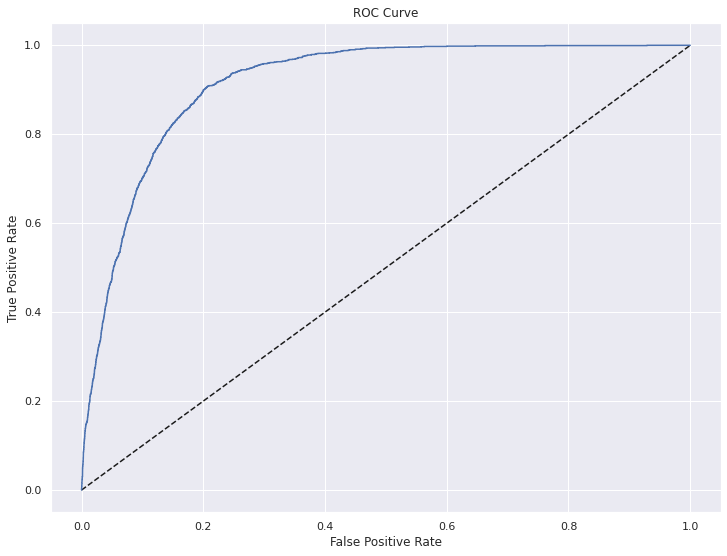

In [193]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_sgbr = sgbr.predict_proba(x_test.values)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_sgbr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_sgbr[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_sgbr[0:10]))

In [194]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_sgbr)))

Auc_list.append(roc_auc_score(y_test, y_pred_prob_sgbr))

# # # Compute cross-validated AUC scores: cv_auc
# # cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # # Print list of AUC scores
# # print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # # Report the mean and standard deviation
# # print('The mean: {}'.format(cv_auc.mean()))
# # print('The std: {}'.format(cv_auc.std()))

AUC: 0.9143075279834374


### Extreme Gradient Boosting with XGBoost

In [195]:
gbm = XGBClassifier(
 learning_rate =0.001,
 n_estimators=500,
 max_depth=5,
 min_child_weight=5,
 gamma=0,
 subsample=0.4,
 colsample_bytree=0.80,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=5.5,
 seed=27)

# Fit the estimator
gbm.fit(x_train_os.values, y_train_os.values)


# Predict the labels of the test set: preds
preds = gbm.predict(x_test.values)

In [196]:
# # Generate the confusion matrix and classification report
# cm_gbm = confusion_matrix(y_test, preds)
# cr_gbm = classification_report(y_test, preds)

# print(cm_gbm)

# # Print the true negative (actual 0s that were predicted 0s)
# print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_gbm[0, 0]))

# # Print the false negative (actual 1s that were predicted 0s)
# print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_gbm[1, 0]))

# # Print the false positive (actual 0s that were predicted 1s)
# print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_gbm[0, 1]))

# # Print the true positives (actual 1s that were predicted 1s)
# print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_gbm[1, 1]))

# print(cr_gbm)

# # Print out count of binary predictions
# print(pd.Series(preds).value_counts())

In [197]:
print("Accuracy:",metrics.accuracy_score(y_test,preds))
print("Precision:",metrics.precision_score(y_test,preds))
print("Recall:",metrics.recall_score(y_test, preds))

Classifiers_var_list.append("gbm")
Classifiers_list.append("Extreme Gradient Boosting with XGBoost")
Accuracy_list.append(metrics.accuracy_score(y_test,preds))
Precision_list.append(metrics.precision_score(y_test,preds))
Recall_list.append(metrics.recall_score(y_test, preds))

Accuracy: 0.6046888823355943
Precision: 0.22637394591451004
Recall: 0.9743429286608261


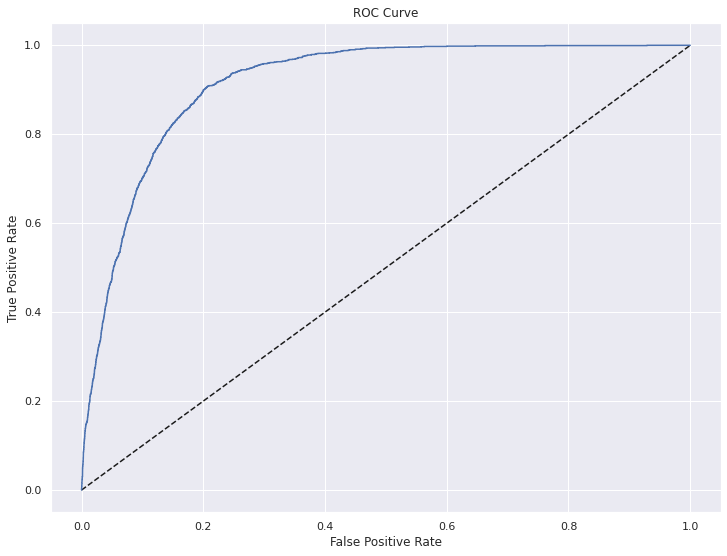

In [198]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_preds = sgbr.predict_proba(x_test.values)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_preds)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# # # Print the first 10 values from predictions
# # print('The first 10 predicted values are: {}'.format(y_pred_sgbr[0:10]))

# # # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# # print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_sgbr[0:10]))

In [199]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

Auc_list.append(roc_auc_score(y_test, preds))

AUC: 0.7648331725035703


### Random Forests

In [200]:
# # Setup the parameters and distributions to sample from: params_dt
# params_dt = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
#              "min_samples_leaf": [0.04, 0.06, 0.08],
#              "max_features": [0.2, 0.4,0.6, 0.8],
#              "criterion": ["gini", "entropy"],
#             "n_estimators":[100,200,300,400,500,600,700,800]}


# Instantiate rf
rf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=25, criterion='gini',n_jobs= -1, max_samples= 0.2)

# # Instantiate the GridSearchCV object: Grid_dt
# Grid_rf = GridSearchCV(estimator = rf , param_grid = params_dt , scoring = 'roc_auc' , cv = 20 , n_jobs = -1)      
            
# Fit rf to the training set    
rf.fit(x_train_os.values, y_train_os.values)

# # Print the optimal parameters and best score
# print("Tuned Decision Tree Parameter: {}".format(Grid_rf.best_params_))
# print("Tuned Decision Tree Accuracy: {}".format(Grid_rf.best_score_))

# # Report the test accuracy using these best parameters
# print("Test accuracy of best grid search hypers:", Grid_rf.score(x_val_fold,y_val_fold))

# Predict the test set labels
y_pred_rf = rf.predict(x_test.values)

# # Evaluate the test set RMSE
# rmse_rf_test = MSE(y_test,y_pred_rf)**(1/2)

# # Evaluate the test set RMSE
# rmse_Randomized_dt_test = MSE(y_test,y_pred_Randomized_dt)**(1/2)

# # Evaluate the test set RMSE
# rmse_Grid_dt_test = MSE(y_test,y_pred_Grid_dt)**(1/2)

# # Print rmse_rf_test
# print('Test set RMSE of rf: {:.2f}'.format(rmse_rf_test))

# # Print rmse_Randomized_dt_test
# print('Test set RMSE of Randomized_dt: {:.2f}'.format(rmse_Randomized_dt_test))

# # Print rmse_Grid_dt_test
# print('Test set RMSE of Grid_dt: {:.2f}'.format(rmse_Grid_dt_test))

In [201]:
# Generate the confusion matrix and classification report
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

print(cm_rf)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_rf[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_rf[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_rf[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_rf[1, 1]))

print(cr_rf)

# Print out count of binary predictions
print(pd.Series(y_pred_rf).value_counts())

[[10642  1324]
 [  394  1204]]
The number of true negative is (Predict/Actual are both 0): 10642
The number of false negative is (Predict 0,Actual 1): 394
The number of false positive is (Predict 1,Actual 0): 1324
The number of true positives is (Predict/Actual are both 1): 1204
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     11966
           1       0.48      0.75      0.58      1598

    accuracy                           0.87     13564
   macro avg       0.72      0.82      0.75     13564
weighted avg       0.91      0.87      0.89     13564

0    11036
1     2528
dtype: int64


In [202]:
# rf.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rf))
print("Precision:",metrics.precision_score(y_test,y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

Classifiers_var_list.append("rf")
Classifiers_list.append("Random Forests")
Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_rf))
Precision_list.append(metrics.precision_score(y_test,y_pred_rf))
Recall_list.append(metrics.recall_score(y_test, y_pred_rf))

Accuracy: 0.873341197286936
Precision: 0.4762658227848101
Recall: 0.753441802252816


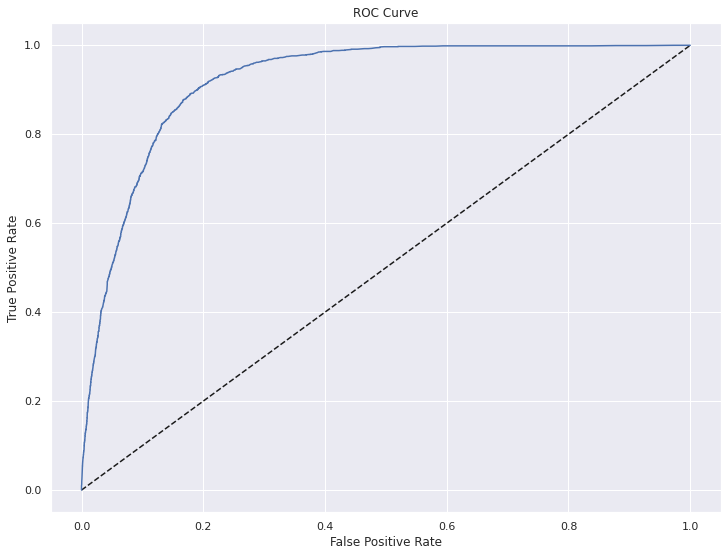

In [203]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_rf = rf.predict_proba(x_test.values)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# # Print the first 10 values from predictions
# print('The first 10 predicted values are: {}'.format(y_pred_rf[0:10]))

# # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_rf[0:10]))

In [204]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_rf)))

Auc_list.append(roc_auc_score(y_test, y_pred_prob_rf))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9207227110103575


In [205]:
# features_array_df = pd.DataFrame(data = features_array)

# # Create a pd.Series of features importances
# importances = pd.Series(data=rf.feature_importances_,
#                         index= features_array_df.columns)

# # Sort importances
# importances_sorted = importances.sort_values()

# # Draw a horizontal barplot of importances_sorted
# importances_sorted.plot(kind='barh', color='lightgreen',figsize=(25,25))
# plt.title('Features Importances')
# plt.show()

## Summary For Model Building


### Choosen Models Summary

In [206]:
summary_dict = {}
summary_dict["Classifiers"] = Classifiers_list
summary_dict["Classifiers_var"] = Classifiers_var_list
summary_dict["Accuracy"] = Accuracy_list
summary_dict["Precision of postive class (1)"] = Precision_list
summary_dict["Recall of postive class (1)"] = Recall_list
summary_dict["AUC"] = Auc_list
summary_df = pd.DataFrame(summary_dict)

summary_df

Classifiers Classifiers_var  Accuracy  \
0            Stochastic Gradient Boosting            sgbr  0.853730   
1  Extreme Gradient Boosting with XGBoost             gbm  0.604689   
2                          Random Forests              rf  0.873341   

   Precision of postive class (1)  Recall of postive class (1)       AUC  
0                        0.434885                     0.806633  0.914308  
1                        0.226374                     0.974343  0.764833  
2                        0.476266                     0.753442  0.920723

### All Models Summary

In [207]:
Classifiers_list = ["Decision Trees(RandomizedSearchCV)","Decision Trees(RandomizedSearchCV)_bagging","Decision Trees(RandomizedSearchCV)_Adaboost","Logistic Regression(GridSearchCV)","Logistic Regression(GridSearchCV)_bagging","Logistic Regression(GridSearchCV)_Adaboost","K-Nearest Neighbors(GridSearchCV)","K-Nearest Neighbors(GridSearchCV)_bagging","Gaussian Naïve Bayes(GridSearchCV)","Gaussian Naïve Bayes(GridSearchCV)_Adaboost","Random Forests","Gradient Boosting","Stochastic Gradient Boosting","Extreme Gradient Boosting with XGBoost"]
Classifiers_var_list = ["Randomized_dt_best_model","bag_Randomized_dt_best_model","ada_Randomized_dt_best_model","Grid_logreg_best_model","bag_Grid_logreg_best_model","ada_Grid_logreg_best_model","Grid_knn_best_model","bag_Grid_knn_best_model","Grid_gnb_best_model","ada_Grid_gnb_best_model","rf","gb","sgbr","gbm"]
Accuracy_list = [0.818859,0.786567,0.809201,0.826821,0.826600,0.827337,0.842082,0.821070,0.611324,0.839575,0.873784,0.828738,0.854247,0.6004128575641404]
Precision_list = [0.367724,0.331951,0.361345,0.383131,0.383209,0.384112,0.380702,0.351380,0.214219,0.402431,0.477291,0.389245,0.435478,0.2247191011235955]
Recall_list = [0.747184,0.801627,0.807259,0.770338,0.774093,0.771589,0.543179,0.613267,0.861702,0.745932,0.749687,0.797247,0.800375,0.9762202753441802]
Auc_list = [0.860228,0.868231,0.876973,0.881793,0.881993,0.881707,0.781762,0.805487,0.812351,0.886042,0.920096,0.899253,0.913243,0.7632229573277812]

In [208]:
summary_dict = {}
summary_dict["Classifiers"] = Classifiers_list
summary_dict["Classifiers_var"] = Classifiers_var_list
summary_dict["Accuracy"] = Accuracy_list
summary_dict["Precision of postive class (1)"] = Precision_list
summary_dict["Recall of postive class (1)"] = Recall_list
summary_dict["AUC"] = Auc_list
summary_df = pd.DataFrame(summary_dict)

In [209]:
# Sort by AUC
summary_df.sort_values(by='AUC', ascending=False)

Classifiers               Classifiers_var  \
10                               Random Forests                            rf   
12                 Stochastic Gradient Boosting                          sgbr   
11                            Gradient Boosting                            gb   
9   Gaussian Naïve Bayes(GridSearchCV)_Adaboost       ada_Grid_gnb_best_model   
4     Logistic Regression(GridSearchCV)_bagging    bag_Grid_logreg_best_model   
3             Logistic Regression(GridSearchCV)        Grid_logreg_best_model   
5    Logistic Regression(GridSearchCV)_Adaboost    ada_Grid_logreg_best_model   
2   Decision Trees(RandomizedSearchCV)_Adaboost  ada_Randomized_dt_best_model   
1    Decision Trees(RandomizedSearchCV)_bagging  bag_Randomized_dt_best_model   
0            Decision Trees(RandomizedSearchCV)      Randomized_dt_best_model   
8            Gaussian Naïve Bayes(GridSearchCV)           Grid_gnb_best_model   
7     K-Nearest Neighbors(GridSearchCV)_bagging       bag_Grid_knn_best_model   
6             K-Nearest Neighbors(GridSearchCV)           Grid_knn_best_model   
13       Extreme Gradient Boosting with XGBoost                           gbm   

    Accuracy  Precision of postive class (1)  Recall of postive class (1)  \
10  0.873784                        0.477291                     0.749687   
12  0.854247                        0.435478                     0.800375   
11  0.828738                        0.389245                     0.797247   
9   0.839575                        0.402431                     0.745932   
4   0.826600                        0.383209                     0.774093   
3   0.826821                        0.383131                     0.770338   
5   0.827337                        0.384112                     0.771589   
2   0.809201                        0.361345                     0.807259   
1   0.786567                        0.331951                     0.801627   
0   0.818859                        0.367724                     0.747184   
8   0.611324                        0.214219                     0.861702   
7   0.821070                        0.351380                     0.613267   
6   0.842082                        0.380702                     0.543179   
13  0.600413                        0.224719                     0.976220   

         AUC  
10  0.920096  
12  0.913243  
11  0.899253  
9   0.886042  
4   0.881993  
3   0.881793  
5   0.881707  
2   0.876973  
1   0.868231  
0   0.860228  
8   0.812351  
7   0.805487  
6   0.781762  
13  0.763223

In [210]:
# Sort by Accuracy
summary_df.sort_values(by='Accuracy', ascending=False)

Classifiers               Classifiers_var  \
10                               Random Forests                            rf   
12                 Stochastic Gradient Boosting                          sgbr   
6             K-Nearest Neighbors(GridSearchCV)           Grid_knn_best_model   
9   Gaussian Naïve Bayes(GridSearchCV)_Adaboost       ada_Grid_gnb_best_model   
11                            Gradient Boosting                            gb   
5    Logistic Regression(GridSearchCV)_Adaboost    ada_Grid_logreg_best_model   
3             Logistic Regression(GridSearchCV)        Grid_logreg_best_model   
4     Logistic Regression(GridSearchCV)_bagging    bag_Grid_logreg_best_model   
7     K-Nearest Neighbors(GridSearchCV)_bagging       bag_Grid_knn_best_model   
0            Decision Trees(RandomizedSearchCV)      Randomized_dt_best_model   
2   Decision Trees(RandomizedSearchCV)_Adaboost  ada_Randomized_dt_best_model   
1    Decision Trees(RandomizedSearchCV)_bagging  bag_Randomized_dt_best_model   
8            Gaussian Naïve Bayes(GridSearchCV)           Grid_gnb_best_model   
13       Extreme Gradient Boosting with XGBoost                           gbm   

    Accuracy  Precision of postive class (1)  Recall of postive class (1)  \
10  0.873784                        0.477291                     0.749687   
12  0.854247                        0.435478                     0.800375   
6   0.842082                        0.380702                     0.543179   
9   0.839575                        0.402431                     0.745932   
11  0.828738                        0.389245                     0.797247   
5   0.827337                        0.384112                     0.771589   
3   0.826821                        0.383131                     0.770338   
4   0.826600                        0.383209                     0.774093   
7   0.821070                        0.351380                     0.613267   
0   0.818859                        0.367724                     0.747184   
2   0.809201                        0.361345                     0.807259   
1   0.786567                        0.331951                     0.801627   
8   0.611324                        0.214219                     0.861702   
13  0.600413                        0.224719                     0.976220   

         AUC  
10  0.920096  
12  0.913243  
6   0.781762  
9   0.886042  
11  0.899253  
5   0.881707  
3   0.881793  
4   0.881993  
7   0.805487  
0   0.860228  
2   0.876973  
1   0.868231  
8   0.812351  
13  0.763223

In [211]:
# Sort by Recall of postive class (1)
summary_df.sort_values(by='Recall of postive class (1)', ascending=False)

Classifiers               Classifiers_var  \
13       Extreme Gradient Boosting with XGBoost                           gbm   
8            Gaussian Naïve Bayes(GridSearchCV)           Grid_gnb_best_model   
2   Decision Trees(RandomizedSearchCV)_Adaboost  ada_Randomized_dt_best_model   
1    Decision Trees(RandomizedSearchCV)_bagging  bag_Randomized_dt_best_model   
12                 Stochastic Gradient Boosting                          sgbr   
11                            Gradient Boosting                            gb   
4     Logistic Regression(GridSearchCV)_bagging    bag_Grid_logreg_best_model   
5    Logistic Regression(GridSearchCV)_Adaboost    ada_Grid_logreg_best_model   
3             Logistic Regression(GridSearchCV)        Grid_logreg_best_model   
10                               Random Forests                            rf   
0            Decision Trees(RandomizedSearchCV)      Randomized_dt_best_model   
9   Gaussian Naïve Bayes(GridSearchCV)_Adaboost       ada_Grid_gnb_best_model   
7     K-Nearest Neighbors(GridSearchCV)_bagging       bag_Grid_knn_best_model   
6             K-Nearest Neighbors(GridSearchCV)           Grid_knn_best_model   

    Accuracy  Precision of postive class (1)  Recall of postive class (1)  \
13  0.600413                        0.224719                     0.976220   
8   0.611324                        0.214219                     0.861702   
2   0.809201                        0.361345                     0.807259   
1   0.786567                        0.331951                     0.801627   
12  0.854247                        0.435478                     0.800375   
11  0.828738                        0.389245                     0.797247   
4   0.826600                        0.383209                     0.774093   
5   0.827337                        0.384112                     0.771589   
3   0.826821                        0.383131                     0.770338   
10  0.873784                        0.477291                     0.749687   
0   0.818859                        0.367724                     0.747184   
9   0.839575                        0.402431                     0.745932   
7   0.821070                        0.351380                     0.613267   
6   0.842082                        0.380702                     0.543179   

         AUC  
13  0.763223  
8   0.812351  
2   0.876973  
1   0.868231  
12  0.913243  
11  0.899253  
4   0.881993  
5   0.881707  
3   0.881793  
10  0.920096  
0   0.860228  
9   0.886042  
7   0.805487  
6   0.781762

In [212]:
# Sort by Precision of postive class (1)
summary_df.sort_values(by='Precision of postive class (1)', ascending=False)

Classifiers               Classifiers_var  \
10                               Random Forests                            rf   
12                 Stochastic Gradient Boosting                          sgbr   
9   Gaussian Naïve Bayes(GridSearchCV)_Adaboost       ada_Grid_gnb_best_model   
11                            Gradient Boosting                            gb   
5    Logistic Regression(GridSearchCV)_Adaboost    ada_Grid_logreg_best_model   
4     Logistic Regression(GridSearchCV)_bagging    bag_Grid_logreg_best_model   
3             Logistic Regression(GridSearchCV)        Grid_logreg_best_model   
6             K-Nearest Neighbors(GridSearchCV)           Grid_knn_best_model   
0            Decision Trees(RandomizedSearchCV)      Randomized_dt_best_model   
2   Decision Trees(RandomizedSearchCV)_Adaboost  ada_Randomized_dt_best_model   
7     K-Nearest Neighbors(GridSearchCV)_bagging       bag_Grid_knn_best_model   
1    Decision Trees(RandomizedSearchCV)_bagging  bag_Randomized_dt_best_model   
13       Extreme Gradient Boosting with XGBoost                           gbm   
8            Gaussian Naïve Bayes(GridSearchCV)           Grid_gnb_best_model   

    Accuracy  Precision of postive class (1)  Recall of postive class (1)  \
10  0.873784                        0.477291                     0.749687   
12  0.854247                        0.435478                     0.800375   
9   0.839575                        0.402431                     0.745932   
11  0.828738                        0.389245                     0.797247   
5   0.827337                        0.384112                     0.771589   
4   0.826600                        0.383209                     0.774093   
3   0.826821                        0.383131                     0.770338   
6   0.842082                        0.380702                     0.543179   
0   0.818859                        0.367724                     0.747184   
2   0.809201                        0.361345                     0.807259   
7   0.821070                        0.351380                     0.613267   
1   0.786567                        0.331951                     0.801627   
13  0.600413                        0.224719                     0.976220   
8   0.611324                        0.214219                     0.861702   

         AUC  
10  0.920096  
12  0.913243  
9   0.886042  
11  0.899253  
5   0.881707  
4   0.881993  
3   0.881793  
6   0.781762  
0   0.860228  
2   0.876973  
7   0.805487  
1   0.868231  
13  0.763223  
8   0.812351

## Voting Classifier of best of the best models

In [213]:
Classifiers_list = []
Classifiers_var_list = []
Accuracy_list = []
Precision_list = []
Recall_list = []
Auc_list = []

In [214]:
# # Define the list classifiers
# classifiers = [("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),("K-Nearest Neighbors(Iteration)",knn),("Logistic Regression(GridSearchCV)_bagging",bag_Grid_logreg_best_model),("Decision Trees(RandomizedSearchCV)_Adaboost",ada_Randomized_dt_best_model),("Decision Trees(GridSearchCV)_Adaboost",ada_Grid_dt_best_model),("Non-linear Support Vector Machines(GridSearchCV)",Grid_NonLinear_svm_best_model),("Linear Support Vector Machines(GridSearchCV)_bagging",bag_Grid_Linear_svm_best_model),("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model),("Random Forests",rf),("Gradient Boosting",gb),("Stochastic Gradient Boosting",sgbr)]

# # Define the list classifiers
# classifiers = [("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),("Logistic Regression(GridSearchCV)_bagging",bag_Grid_logreg_best_model),("Decision Trees(GridSearchCV)_Adaboost",ada_Grid_dt_best_model),("Non-linear Support Vector Machines(GridSearchCV)",Grid_NonLinear_svm_best_model),("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model)]

# Define the list classifiers
# classifiers = [("Random Forests",rf),
#                ("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),
#                ("Decision Trees(GridSearchCV)_Adaboost",ada_Grid_dt_best_model),
#                ("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model),
#                ("Stochastic Gradient Boosting",sgbr),
#                ("Gradient Boosting",gb),
#                ("Decision Trees(RandomizedSearchCV)_bagging",bag_Randomized_dt_best_model)]

# performed well
# classifiers = [("Random Forests",rf),
#                ("Random Forests_Adaboost",ada_rf),
#                ("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),
#                ("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model),
#                ("Decision Trees(GridSearchCV)_Adaboost",ada_Grid_dt_best_model),
#                ("K-Nearest Neighbors(GridSearchCV)_bagging",bag_Grid_knn_best_model),
#                ("Stochastic Gradient Boosting",sgbr),
#                ("Gradient Boosting",gb),
#                ("Decision Trees(RandomizedSearchCV)_bagging",bag_Randomized_dt_best_model),
#                ("Decision Trees(GridSearchCV)_bagging",bag_Grid_dt_best_model)]


# classifiers = [("Random Forests",rf),
#                ("Stochastic Gradient Boosting",sgbr),
#                ("Gradient Boosting",gb),
#                ("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model),
#                ("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),
#                ("Extreme Gradient Boosting with XGBoost",gbm),
#                ("Gaussian Naïve Bayes(GridSearchCV)",Grid_gnb_best_model),
#                ("Decision Trees(RandomizedSearchCV)_Adaboost",ada_Randomized_dt_best_model),
#                ("Decision Trees(RandomizedSearchCV)_bagging",bag_Randomized_dt_best_model)
#                ]

classifiers = [("Random Forests",rf),
               ("Stochastic Gradient Boosting",sgbr),
               ("Extreme Gradient Boosting with XGBoost",gbm),
               ]




# classifiers = [("Random Forests_Adaboost",ada_rf),
#                ("Random Forests",rf),
#                ("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),
#                ("K-Nearest Neighbors(GridSearchCV)_bagging",bag_Grid_knn_best_model),

#                ("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model),  
#                ("Logistic Regression(GridSearchCV)_Adaboost",ada_Grid_logreg_best_model),
#                ("Logistic Regression(GridSearchCV)",Grid_logreg_best_model),
#                ("Logistic Regression(GridSearchCV)_bagging",bag_Grid_logreg_best_model),
#                ("Gradient Boosting",gb),
#                ("Gaussian Naïve Bayes(GridSearchCV)",Grid_gnb_best_model),
#                ("Decision Trees(RandomizedSearchCV)_Adaboost",ada_Randomized_dt_best_model),
#                ("Decision Trees(GridSearchCV)_Adaboost",ada_Grid_dt_best_model),
#                ("Gaussian Naïve Bayes(GridSearchCV)_bagging",bag_Grid_gnb_best_model),
#                ("Stochastic Gradient Boosting",sgbr),
#                ("Decision Trees(GridSearchCV)_bagging",bag_Grid_dt_best_model	),
#                ("Decision Trees(RandomizedSearchCV)_bagging",bag_Randomized_dt_best_model),
#                ("Decision Trees(GridSearchCV)",Grid_dt_best_model),
#                ("Decision Trees(RandomizedSearchCV)",Randomized_dt_best_model)
#                ]



# # Iterate over the pre-defined list of classifiers
# for clf_name, clf in classifiers:    
 
#     # Fit clf to the training set
#     clf.fit(x_train_os, y_train_os)    
   
#     # Predict y_pred
#     y_pred_clfs = clf.predict(x_test)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred_clfs) 
   
#     # Evaluate clf's accuracy on the test set
#     print('{:s} : {:.3f}'.format(clf_name, accuracy))

In [215]:
# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers,voting='soft', n_jobs = -1)

# params = {'weights':[(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1),
#                      (2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1),
#                      (1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1),
#                      (1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1),
#                      (1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1),
#                      (1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1),
#                      (1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1),
#                      (1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1),
#                      (1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1),
#                      (1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1),
#                      (1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1),
#                      (1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1),
#                      (1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1),
#                      (1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1),
#                      (1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1),
#                      (1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1),
#                      (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1),
#                      (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1),
#                      (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2)]}

# # Find the best set of parameters to search
# vc_grid = GridSearchCV(estimator = vc , param_grid = params, scoring='roc_auc', cv = 20, n_jobs = -1)


# # Fit vc to the training set
# vc_grid.fit(x_train_os, y_train_os)   

# # Evaluate the test set predictions
# y_pred_vc = vc_grid.predict(x_test)

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred_vc)
# print('Voting Classifier accuracy: {:.3f}'.format(accuracy))

# print(vc.get_params())

# Fit vc to the training set
vc.fit(x_train_os.values, y_train_os.values)   

# Evaluate the test set predictions
y_pred_vc = vc.predict(x_test.values)

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred_vc)
# print('Voting Classifier accuracy: {:.3f}'.format(accuracy))

In [216]:
# Generate the confusion matrix and classification report
cm_vc = confusion_matrix(y_test, y_pred_vc)
cr_vc = classification_report(y_test, y_pred_vc)

print(cm_vc)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_vc[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_vc[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_vc[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_vc[1, 1]))

print(cr_vc)

# Print out count of binary predictions
print(pd.Series(y_pred_vc).value_counts())

[[10089  1877]
 [  242  1356]]
The number of true negative is (Predict/Actual are both 0): 10089
The number of false negative is (Predict 0,Actual 1): 242
The number of false positive is (Predict 1,Actual 0): 1877
The number of true positives is (Predict/Actual are both 1): 1356
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     11966
           1       0.42      0.85      0.56      1598

    accuracy                           0.84     13564
   macro avg       0.70      0.85      0.73     13564
weighted avg       0.91      0.84      0.86     13564

0    10331
1     3233
dtype: int64


In [217]:
# vc.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_vc))
print("Precision:",metrics.precision_score(y_test,y_pred_vc))
print("Recall:",metrics.recall_score(y_test, y_pred_vc))

Classifiers_var_list.append("vc")
Classifiers_list.append("Voting Classifier")
Accuracy_list.append(metrics.accuracy_score(y_test,y_pred_vc))
Precision_list.append(metrics.precision_score(y_test,y_pred_vc))
Recall_list.append(metrics.recall_score(y_test, y_pred_vc))

Accuracy: 0.8437776467118844
Precision: 0.41942468295700586
Recall: 0.8485607008760951


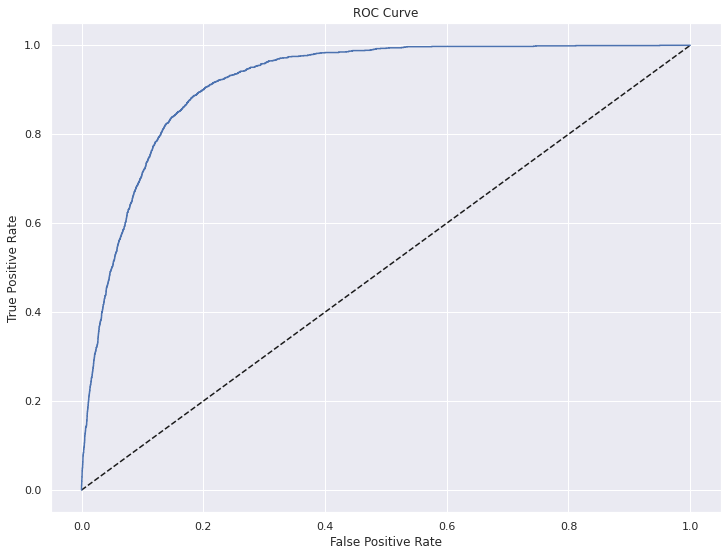

In [218]:
# Compute predicted probabilities: y_pred_prob_Grid_knn
y_pred_prob_vc = vc.predict_proba(x_test.values)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_vc)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# # Print the first 10 values from predictions
# print('The first 10 predicted values are: {}'.format(y_pred_vc[0:10]))

# # Print the first 10 values from probability_predictions (The probability of not recovering from covid)
# print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_vc[0:10]))

In [219]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_vc)))

Auc_list.append(roc_auc_score(y_test, y_pred_prob_vc))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = vc ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9175700048761437


In [220]:
summary_dict = {}
summary_dict["Classifiers"] = Classifiers_list
summary_dict["Classifiers_var"] = Classifiers_var_list
summary_dict["Accuracy"] = Accuracy_list
summary_dict["Precision of postive class (1)"] = Precision_list
summary_dict["Recall of postive class (1)"] = Recall_list
summary_dict["AUC"] = Auc_list
summary_df = pd.DataFrame(summary_dict)

summary_df

Classifiers Classifiers_var  Accuracy  \
0  Voting Classifier              vc  0.843778   

   Precision of postive class (1)  Recall of postive class (1)      AUC  
0                        0.419425                     0.848561  0.91757

# Deployment

In [221]:
# # pickling the model
# import pickle
# pickle_out = open("classifier.pkl", "wb")
# pickle.dump(vc, pickle_out)
# pickle_out.close()

In [222]:
# df_real = pd.read_csv('../input/bank-marketing-dataset-analysis-classification/bank-full.csv')
# df_real.head()

In [223]:
# df_real.tail()

In [224]:
# %%writefile app.py
# import pandas as pd
# import numpy as np
# import pickle
# import streamlit as st
# from PIL import Image

# # loading in the model to predict on the data
# pickle_in = open('classifier.pkl', 'rb')
# classifier = pickle.load(pickle_in)

# def welcome():
# 	return 'welcome all'

# # defining the function which will make the prediction using
# # the data which the user inputs
# def prediction(age,	job,	marital,	education,	default,	balance,	housing,	loan,	contact,	day,	month,	duration,	campaign,	pdays,	previous,	poutcome):

# 	prediction = classifier.predict(
# 		[[age,	job,	marital,	education,	default,	balance,	housing,	loan,	contact,	day,	month,	duration,	campaign,	pdays,	previous,	poutcome]])
# 	print(prediction)
# 	return prediction
	

# # this is the main function in which we define our webpage
# def main():
# 	# giving the webpage a title
# 	st.title("Term Deposit Subscription Prediction")
	
# 	# here we define some of the front end elements of the web page like
# 	# the font and background color, the padding and the text to be displayed
# 	html_temp = """
# 	<div style ="background-color:yellow;padding:13px">
# 	<h1 style ="color:black;text-align:center;">Streamlit Term Deposit Subscription Prediction Classifier ML App </h1>
# 	</div>
# 	"""
	
# 	# this line allows us to display the front end aspects we have
# 	# defined in the above code
# 	st.markdown(html_temp, unsafe_allow_html = True)
	
# 	# the following lines create text boxes in which the user can enter
# 	# the data required to make the prediction

# 	df_real = pd.read_csv('bank-full.csv')

# 	label_encoding = {
#     "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
#     "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
#     "contact":{"unknown":0,"cellular":1,"telephone":2},
#     "loan":{"no":0,"yes":1},
#     "housing":{"no":0,"yes":1},
#     "default":{"no":0,"yes":1},
#     "education":{"tertiary":0,"secondary":1,"unknown":2,"primary":3},
#     "marital":{"married":0,"single":1,"divorced":2},   
#     "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,"housemaid":10,"student":11}
# }

# 	age = st.text_input("Age: (Age of customer)", 0)
# 	age_pred = (int(age) - (df_real["age"].min())) / ((df_real["age"].max()) - (df_real["age"].min())) 

# 	job = st.selectbox("Job: (Job of customer)", ["management","technician","entrepreneur","blue-collar","retired","admin.","services","self-employed","unemployed","housemaid","student","unknown"])
# 	job_pred = label_encoding["job"][job] 

# 	marital = st.radio("Marital: (Martial status of customer)",["single","married","divorced"])
# 	marital_pred = label_encoding["marital"][marital] 

# 	education = st.radio("Education: (Customer education level)",["primary","secondary","tertiary","unknown"])
# 	education_pred = label_encoding["education"][education]

# 	default = st.radio("Default: (Has credit in default?)",["yes","no"])
# 	default_pred = label_encoding["default"][default]

# 	balance = st.text_input("Balance: (Customer's individual balance)", 0)
# 	balance_pred = (int(balance) - (df_real["balance"].min())) / ((df_real["balance"].max()) - (df_real["balance"].min()))

# 	housing = st.radio("Housing: (If costumer has housing loan?)",["yes","no"])
# 	housing_pred = label_encoding["housing"][housing]

# 	loan = st.radio("Loan: ((If costumer has personal loan?)",["yes","no"])
# 	loan_pred = label_encoding["loan"][loan]

# 	contact = st.radio("Contact: (Communication type)", ["cellular","telephone","unknown"])
# 	contact_pred = label_encoding["contact"][contact]

# 	day = st.text_input("Day: (Last contact day of the week)", 0)
# 	day_pred = (int(day) - (df_real["day"].min())) / ((df_real["day"].max()) - (df_real["day"].min()))

# 	month	= st.selectbox("Month: (Last contact month of year)", ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])
# 	month_pred = label_encoding["month"][month]

# 	duration = st.text_input("Duration: (Last contact duration in seconds)", 0)
# 	duration_pred = (int(duration) - (df_real["duration"].min())) / ((df_real["duration"].max()) - (df_real["duration"].min()))

# 	campaign = st.text_input("Campaign: (Number of contacts performed during this campaign and for this client)", 0)
# 	campaign_pred = (int(campaign) - (df_real["campaign"].min())) / ((df_real["campaign"].max()) - (df_real["campaign"].min()))

# 	pdays = st.text_input("Pdays: (Number of days that passed by after the client was last contacted from a previous campaign)", 0)
# 	pdays_pred = (int(pdays) - (df_real["pdays"].min())) / ((df_real["pdays"].max()) - (df_real["pdays"].min()))

# 	previous = st.text_input("Previous: (Number of contacts performed before this campaign and for this client)", 0)
# 	previous_pred = (int(previous) - (df_real["previous"].min())) / ((df_real["previous"].max()) - (df_real["previous"].min()))

# 	poutcome = st.radio("Poutcome: (Outcome of the previous marketing campaign)", ["success","failure","other","unknown"])
# 	poutcome_pred = label_encoding["poutcome"][poutcome]

# 	result =""
# 	result_pred=""
	
# 	# the below line ensures that when the button called 'Predict' is clicked,
# 	# the prediction function defined above is called to make the prediction
# 	# and store it in the variable result
# 	if st.button("Predict"):
# 		result = prediction(age_pred,	job_pred,	marital_pred,	education_pred,	default_pred,	balance_pred,	housing_pred,	loan_pred,	contact_pred,	day_pred,	month_pred,	duration_pred,	campaign_pred,	pdays_pred,	previous_pred,	poutcome_pred)
# 		if result == 0:
# 			result_pred = 'No'
# 		else:
# 			result_pred = 'Yes'

# 	st.success("Will the client subscribe to a term deposit? Prediction: {}".format(result_pred))
	
# if __name__=='__main__':
# 	main()

In [225]:
# !python /content/app.py

In [226]:
# ! pip install pyngrok

In [227]:
# from pyngrok import ngrok

In [228]:
# ngrok.set_auth_token("type your auth token here")

In [229]:
# !nohup streamlit run /content/app.py --server.port 80 &
# url = ngrok.connect(port = '80')
# print(url)

In [230]:
# from pyngrok.process import NgrokProcess
# tunnels = ngrok.get_tunnels()
# tunnels

# try:
#   # Block until CTRL-C or some other terminating event
#   NgrokProcess.proc.wait()
# except KeyboardInterrupt:
#   print("Shutting down server ...")

#   ngrok.kill()


In [231]:
# ngrok.kill()

# Conclusion 

__The dataset contained 16 features and 1 target variable for binary classification which determines if client will subscribe deposit or not.With the given bank data, we implemented Exploratory Data Analysis, Visualized the data, Applied various Machine Learning models and evaluated the models. After pre-processsing the data, then applying various classification algorithms on the data, it was clear that the Voting Classifier Model out performed the other models with accuracy of (84%), precision of (42%) and recall of (85%).__

**Note:**

The precision and recall mentioned above are of the postive class (1).